# Bellabeat Marketing Analysis

# Summary of the business task

| **Title**  | How Can a Wellness Technology Company Play It Smart?  |
|---|---|
|  **Company** | Bellabeat, a high-tech manufacturer of health-focused products for women.  |
| **Industry focus**  | Fitness  |
|  **Problem statement** |  Focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices to help unlock new growth opportunities and guild marketing strategy for the company.|
|**Business use case** (*what are we solving for?*)| Human temporal routine behavioral analysis, Recognize pattern/trend in smart device usage, Support users to take informed health decisions, Recommend marketing strategy |
|**Goals/Metrics**||
|**Deliverables**| A notebook outlining our findings and recommendations for Bellabeat’s marketing strategy|

# Process

## Import libraries

Install & load necessary packages for data cleaning and transformation.

In [1]:
library(tidyverse)
library(dplyr)
library(data.table)
library(skimr)
library(janitor)
library(here)
library(psych)
library(chron)
library(ggpubr)
library(VennDiagram)
library(ggpubr)
library(corrplot)
library(openair)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


here() starts at /kaggle/working


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘VennDiagram’


The following object is masked from ‘package:ggpubr’:

    r

## Load the dataset

This dataset includes the records of 33 users and it is best to find data that has a complete set of data for all of those 33 users across all categories. 

We already know that weight requires users to log their data, but only eight users entered this data. Heartrate log only contains records of 7 users. Sleep was also not recorded consistently, as only one user actively captured all data. 

To answer our business task, we will mainly use these data:
* Daily Activity (including Steps, Distance, Intensities, Active Minutes, and Calories)
* Daily & Hourly Calories
* Daily Sleep
* Daily Intensities
* Daily & Hourly Steps

Although Heart rate and Weight log have missing data, we might still include for reference only.

In [2]:
daily_act <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_cal <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
hourly_cal <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
daily_sleep <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_int <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
hourly_int <- read_csv(file = "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
daily_steps <- read_csv(file = "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
met <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")

## data for reference
heart_rate <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 22099 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to qui

Lets view all the dataset that we just read.

In [3]:
head(daily_act)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(daily_cal)

Id,ActivityDay,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728


In [5]:
head(hourly_cal)

Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


In [6]:
head(daily_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [7]:
head(daily_sleep)

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


In [8]:
head(hourly_int)

Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [9]:
head(daily_steps)

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


In [10]:
head(hourly_steps)

Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


In [11]:
head(met)

Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12


## Clean & Format the data

Before we start, we want to check the structure of each table and the summary for each column.

In [12]:
print("---------------------------------daily activity-----------------------------------")
str(daily_act)
cat("\n---------------------------------daily calories-----------------------------------\n")
str(daily_cal)
cat("\n---------------------------------hourly calories-----------------------------------\n")
str(hourly_cal)
cat("\n---------------------------------daily sleep-----------------------------------\n")
str(daily_sleep)
cat("\n---------------------------------daily intensities-----------------------------------\n")
str(daily_int)
cat("\n---------------------------------hourly intensities-----------------------------------\n")
str(hourly_int)
cat("\n---------------------------------daily steps-----------------------------------\n")
str(daily_steps)
cat("\n---------------------------------hourly steps-----------------------------------\n")
str(hourly_steps)
cat("\n---------------------------------MET-----------------------------------\n")
str(met)


[1] "---------------------------------daily activity-----------------------------------"
spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 

In [13]:
print("---------------------------------daily activity-----------------------------------")
summary(daily_act)
cat("\n---------------------------------daily calories-----------------------------------\n")
summary(daily_cal)
cat("\n---------------------------------hourly calories-----------------------------------\n")
summary(hourly_cal)
cat("\n---------------------------------daily sleep-----------------------------------\n")
summary(daily_sleep)
cat("\n---------------------------------daily intensities-----------------------------------\n")
summary(daily_int)
cat("\n---------------------------------hourly intensities-----------------------------------\n")
summary(hourly_int)
cat("\n---------------------------------daily steps-----------------------------------\n")
summary(daily_steps)
cat("\n---------------------------------hourly steps-----------------------------------\n")
summary(hourly_steps)
cat("\n---------------------------------met-----------------------------------\n")
summary(met)


[1] "---------------------------------daily activity-----------------------------------"


       Id            ActivityDate         TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:940         Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Mode  :character   Median : 7406   Median : 5.245  
 Mean   :4.855e+09                      Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09                      3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Sedentary


---------------------------------daily calories-----------------------------------


       Id            ActivityDay           Calories   
 Min.   :1.504e+09   Length:940         Min.   :   0  
 1st Qu.:2.320e+09   Class :character   1st Qu.:1828  
 Median :4.445e+09   Mode  :character   Median :2134  
 Mean   :4.855e+09                      Mean   :2304  
 3rd Qu.:6.962e+09                      3rd Qu.:2793  
 Max.   :8.878e+09                      Max.   :4900  


---------------------------------hourly calories-----------------------------------


       Id            ActivityHour          Calories     
 Min.   :1.504e+09   Length:22099       Min.   : 42.00  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 63.00  
 Median :4.445e+09   Mode  :character   Median : 83.00  
 Mean   :4.848e+09                      Mean   : 97.39  
 3rd Qu.:6.962e+09                      3rd Qu.:108.00  
 Max.   :8.878e+09                      Max.   :948.00  


---------------------------------daily sleep-----------------------------------


       Id              SleepDay         TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Length:413         Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   Class :character   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Mode  :character   Median :1.000     Median :433.0     
 Mean   :5.001e+09                      Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09                      3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09                      Max.   :3.000     Max.   :796.0     
 TotalTimeInBed 
 Min.   : 61.0  
 1st Qu.:403.0  
 Median :463.0  
 Mean   :458.6  
 3rd Qu.:526.0  
 Max.   :961.0  


---------------------------------daily intensities-----------------------------------


       Id            ActivityDay        SedentaryMinutes LightlyActiveMinutes
 Min.   :1.504e+09   Length:940         Min.   :   0.0   Min.   :  0.0       
 1st Qu.:2.320e+09   Class :character   1st Qu.: 729.8   1st Qu.:127.0       
 Median :4.445e+09   Mode  :character   Median :1057.5   Median :199.0       
 Mean   :4.855e+09                      Mean   : 991.2   Mean   :192.8       
 3rd Qu.:6.962e+09                      3rd Qu.:1229.5   3rd Qu.:264.0       
 Max.   :8.878e+09                      Max.   :1440.0   Max.   :518.0       
 FairlyActiveMinutes VeryActiveMinutes SedentaryActiveDistance
 Min.   :  0.00      Min.   :  0.00    Min.   :0.000000       
 1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.:0.000000       
 Median :  6.00      Median :  4.00    Median :0.000000       
 Mean   : 13.56      Mean   : 21.16    Mean   :0.001606       
 3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:0.000000       
 Max.   :143.00      Max.   :210.00    Max.   :0.110000       
 LightActiveD


---------------------------------hourly intensities-----------------------------------


       Id            ActivityHour       TotalIntensity   AverageIntensity
 Min.   :1.504e+09   Length:22099       Min.   :  0.00   Min.   :0.0000  
 1st Qu.:2.320e+09   Class :character   1st Qu.:  0.00   1st Qu.:0.0000  
 Median :4.445e+09   Mode  :character   Median :  3.00   Median :0.0500  
 Mean   :4.848e+09                      Mean   : 12.04   Mean   :0.2006  
 3rd Qu.:6.962e+09                      3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :8.878e+09                      Max.   :180.00   Max.   :3.0000  


---------------------------------daily steps-----------------------------------


       Id            ActivityDay          StepTotal    
 Min.   :1.504e+09   Length:940         Min.   :    0  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 3790  
 Median :4.445e+09   Mode  :character   Median : 7406  
 Mean   :4.855e+09                      Mean   : 7638  
 3rd Qu.:6.962e+09                      3rd Qu.:10727  
 Max.   :8.878e+09                      Max.   :36019  


---------------------------------hourly steps-----------------------------------


       Id            ActivityHour         StepTotal      
 Min.   :1.504e+09   Length:22099       Min.   :    0.0  
 1st Qu.:2.320e+09   Class :character   1st Qu.:    0.0  
 Median :4.445e+09   Mode  :character   Median :   40.0  
 Mean   :4.848e+09                      Mean   :  320.2  
 3rd Qu.:6.962e+09                      3rd Qu.:  357.0  
 Max.   :8.878e+09                      Max.   :10554.0  


---------------------------------met-----------------------------------


       Id            ActivityMinute          METs       
 Min.   :1.504e+09   Length:1325580     Min.   :  0.00  
 1st Qu.:2.320e+09   Class :character   1st Qu.: 10.00  
 Median :4.445e+09   Mode  :character   Median : 10.00  
 Mean   :4.848e+09                      Mean   : 14.69  
 3rd Qu.:6.962e+09                      3rd Qu.: 11.00  
 Max.   :8.878e+09                      Max.   :157.00  

### Verify number of users in each dataframe

In [14]:
n_unique(daily_act$Id)
n_unique(daily_cal$Id)
n_unique(hourly_cal$Id)
n_unique(daily_sleep$Id)
n_unique(daily_int$Id)
n_unique(hourly_int$Id)
n_unique(daily_steps$Id)
n_unique(hourly_steps$Id)
n_unique(met$Id)
n_unique(met$Id)
n_unique(heart_rate$Id)
n_unique(weight_log$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 14

[1] 8

We see that daily sleep data has only 24 users while the rest has 33 users. We still can use the sleep data for more reference.

There is a question that we want to address to check for the completeness of this dataset. We can see there is a great discrepancy in the number of unique Ids in steps count, sleep tracking, heart rate monitor, and weight management data, let's find out how the intersection of user Ids based on these product features looks like.

In [15]:
# Generate 4 sets of unique Ids for each feature.
step_ids <- unique(daily_act$Id, incomparables = FALSE)
sleep_ids <- unique(daily_sleep$Id, incomparables = FALSE)
heartrate_ids <- unique(heart_rate$Id, incomparables = FALSE)
weight_ids <- unique(weight_log$Id, incomparables = FALSE)

In [16]:

# Plot
# venn.diagram(x = list(step_ids, sleep_ids, heartrate_ids, weight_ids),
#   category.names = c("Steps count", "Sleep monitor", "Heart monitor", "Weight tracking"),
#   filename = "features_venn.png",
#   output=TRUE, imagetype="png",
#   lwd = 2, fill = c("skyblue", "pink1", "mediumorchid", "orange"), 
#   cex = 1, fontface = "bold", fontfamily = "sans",
#   cat.cex = .7, cat.fontface = "bold", cat.default.pos = "outer", cat.fontfamily = "sans")

**Venn Diagram of 4 tracking features used by 33 IDs**
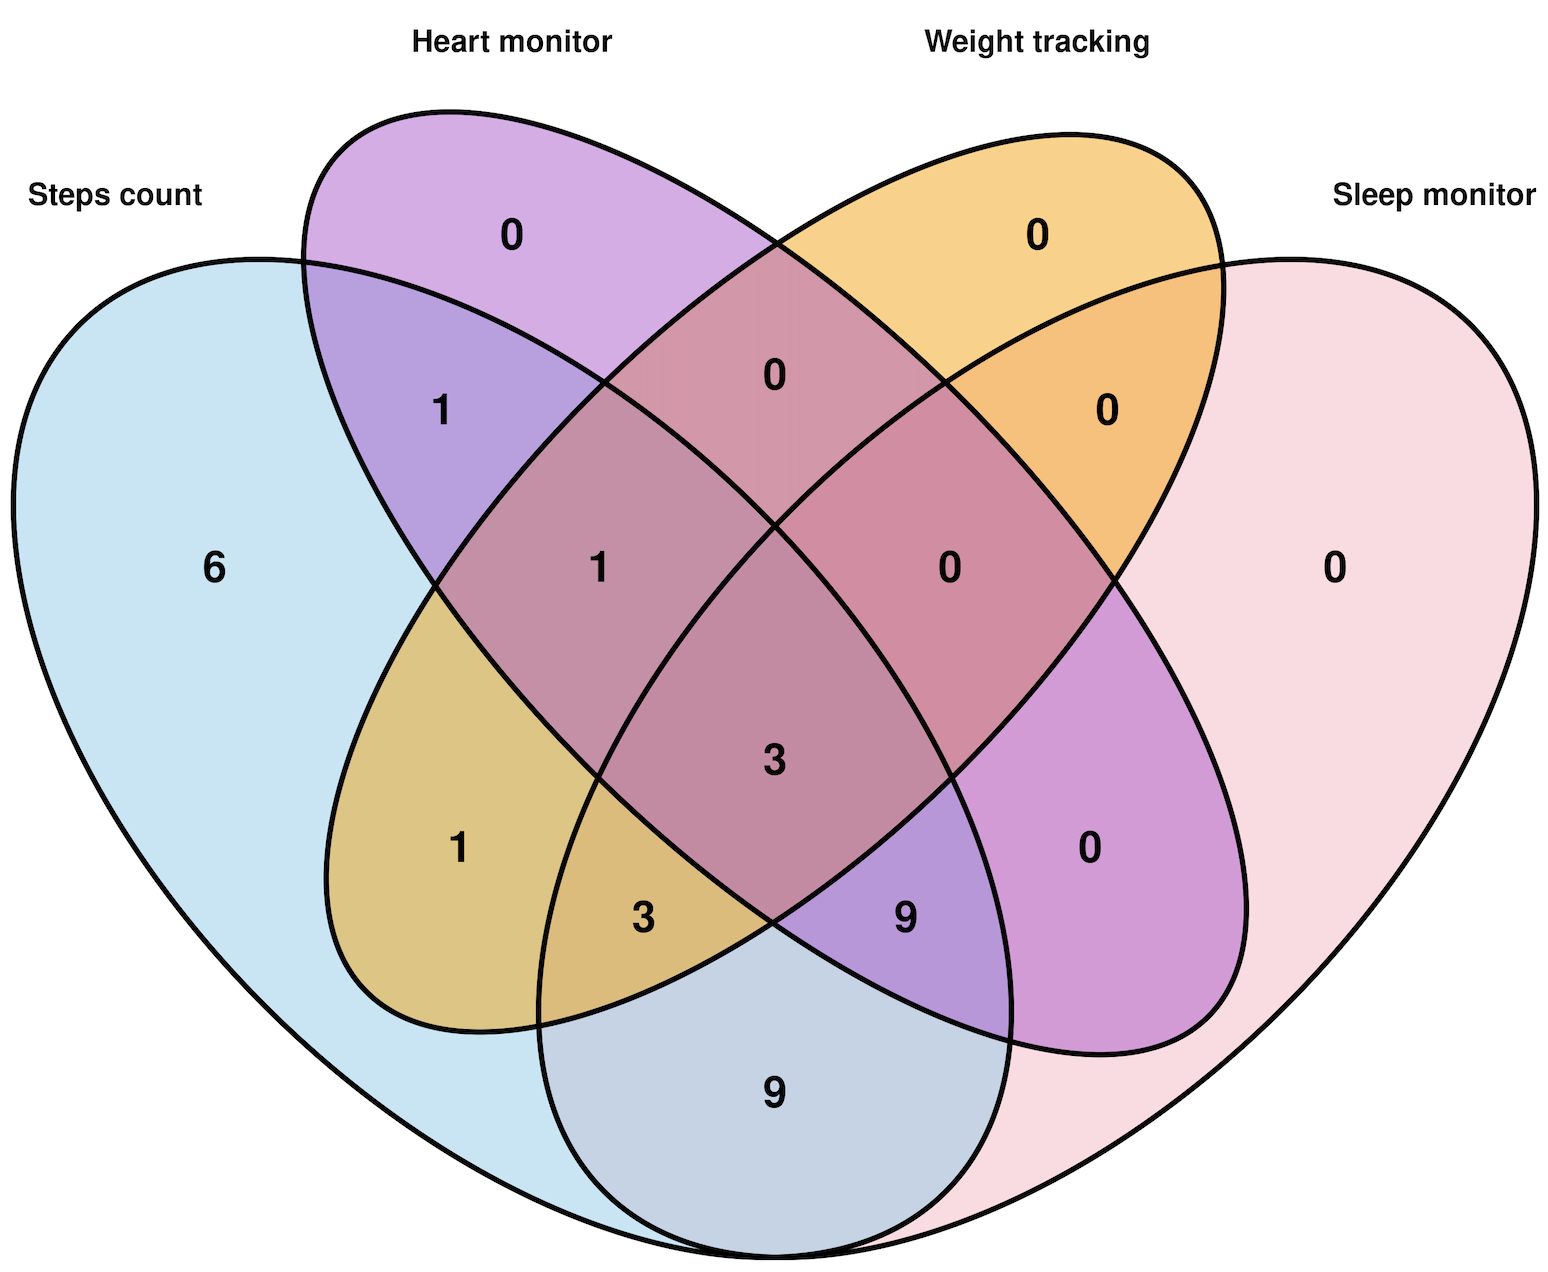


From the venn diagram above:
* 100% (33/33 Ids) have STEPS count records (combine with or without other features)
* 73% (24/33 Ids) have STEPS count and SLEEP tracking records (this subgroup is fairly close to that of Bellabeat's users)
* 42% (14/33 Ids) have STEPS count and HEARTRATE monitoring records
* 24% (8/33 Ids) have STEPS count and WEIGHT tracking records
* 9% (3/33 Ids) have all four featured records of STEPS - SLEEP - HEARTRATE - WEIGHT

### Check for duplicates


In [17]:
sum(duplicated(daily_act))
sum(duplicated(daily_cal))
sum(duplicated(hourly_cal))
sum(duplicated(daily_sleep))
sum(duplicated(daily_int))
sum(duplicated(hourly_int))
sum(duplicated(daily_steps))
sum(duplicated(hourly_steps))
sum(duplicated(met))


[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

### Check N/A

In [18]:
which(is.na(daily_act))
which(is.na(daily_cal))
which(is.na(hourly_cal))
which(is.na(daily_sleep))
which(is.na(daily_int))
which(is.na(hourly_int))
which(is.na(daily_steps))
which(is.na(hourly_steps))
which(is.na(met))


integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

### Remove dubplicates & N/A

In [19]:
daily_act <- daily_act %>%
  distinct() %>%
  drop_na()

daily_cal <- daily_cal %>%
  distinct() %>%
  drop_na()

hourly_cal <- hourly_cal %>%
  distinct() %>%
  drop_na()

daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()

daily_int <- daily_int %>%
  distinct() %>%
  drop_na()

hourly_int <- hourly_int %>%
  distinct() %>%
  drop_na()

daily_steps <- daily_steps %>%
  distinct() %>%
  drop_na()

hourly_steps <- hourly_steps %>%
  distinct() %>%
  drop_na()

met <- met %>%
  distinct() %>%
  drop_na()

Lets check if the duplicated data has been removed.

In [20]:
daily_act <- daily_act %>%
  distinct() %>%
  drop_na()

daily_cal <- daily_cal %>%
  distinct() %>%
  drop_na()

hourly_cal <- hourly_cal %>%
  distinct() %>%
  drop_na()

daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()

daily_int <- daily_int %>%
  distinct() %>%
  drop_na()

hourly_int <- hourly_int %>%
  distinct() %>%
  drop_na()

daily_steps <- daily_steps %>%
  distinct() %>%
  drop_na()

hourly_steps <- hourly_steps %>%
  distinct() %>%
  drop_na()

met <- met %>%
  distinct() %>%
  drop_na()

[1] 0

### Errors and Missing Values

According to the summary, there are 0s entered by many users, we can see this as missing data.

Lets start with **Daily Activity**.

In [21]:
daily_act %>%
    select(Id, ActivityDate) %>%
    group_by(Id) %>%
    summarize(unique_dates = n_distinct(ActivityDate)) %>%
    group_by(unique_dates) %>%
    summarize(nb_users = n_distinct(Id))

unique_dates,nb_users
<int>,<int>
4,1
18,1
19,1
20,1
26,2
28,1
29,2
30,3
31,21


We can see that among 33 users, only 21 users successfully recorded all 31 days. Lets check if there is any missing data (recorded as 0).

In [22]:
head(daily_act)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [23]:
subset_activity_wide <- daily_act %>%
    select(Id, ActivityDate,TotalSteps,TotalDistance,TrackerDistance) %>%
    mutate(sum_stats = TotalSteps+TotalDistance+TrackerDistance) %>%
    select(Id, ActivityDate,sum_stats) %>%
    spread(ActivityDate,sum_stats)
#     select(sort(names(.)))

Replace all 0 values with NA.

In [24]:
is.na(subset_activity_wide) <- !subset_activity_wide

Find the subset of rows containing NA (missing) values:

In [25]:
activity_subset_na <- subset_activity_wide[rowSums(is.na(subset_activity_wide)) > 0,] # or use filter_all(any_vars(is.na(.)))  
head(activity_subset_na)

Id,4/12/2016,4/13/2016,4/14/2016,4/15/2016,4/16/2016,4/17/2016,4/18/2016,4/19/2016,4/20/2016,⋯,5/11/2016,5/12/2016,5/2/2016,5/3/2016,5/4/2016,5/5/2016,5/6/2016,5/7/2016,5/8/2016,5/9/2016
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,13179.00,10748.94,10473.48,9774.56,12685.32,9717.96,13036.18,15525.76,10557.36,⋯,12786.26,NA,14746.42,15122.32,11114.30,14087.80,12175.06,12007.42,10073.16,12037.44
1644430081,10709.54,8012.64,11053.04,5270.66,15322.24,8769.74,7142.38,11272.36,2439.54,⋯,1330.94,NA,3763.46,12868.68,2312.36,4369.38,9801.24,13391.44,6733.78,6652.66
1844505072,6705.86,4935.52,7947.50,3849.08,3418.52,4530.98,4603.08,197.26,8.02,⋯,NA,NA,NA,4064.36,2082.74,2239.96,44.06,NA,NA,NA
1927972279,678.94,356.50,2166.00,981.36,NA,NA,244.34,NA,NA,⋯,NA,NA,3795.24,1327.84,1788.48,NA,2093.90,1512.08,NA,NA
2347167796,10126.66,10366.02,10142.40,10478.84,22274.16,5479.24,8257.90,6719.88,11013.54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3372868164,4753.48,9728.26,8856.06,7461.16,6914.46,8210.76,6807.28,7721.52,4886.66,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [26]:
# -MARGIN=1`: the manipulation is performed on rows
# -MARGIN=2`: the manipulation is performed on columns
# -MARGIN=c(1,2)` the manipulation is performed on rows and columns
Col_with_missing_val <- function(df, Id){ # helper function
        allmisscols <- apply(df[(df$Id == Id),],2, function(x)all(is.na(x)))
        cols_with_miss <-names(allmisscols[allmisscols>0])
        cat(length(cols_with_miss), "columns with missing values for user", Id, "is", cols_with_miss)
}


In [27]:
all_users = unique(activity_subset_na$Id)
nb_users_missing_data = 0
for (user in all_users) {
    nb_users_missing_data <- nb_users_missing_data + 1 
    Col_with_missing_val(activity_subset_na,user)
    cat("\n\n")
}

cat("There are", nb_users_missing_data, "users who have missing data.")

1 columns with missing values for user 1503960366 is 5/12/2016

1 columns with missing values for user 1644430081 is 5/12/2016

10 columns with missing values for user 1844505072 is 4/24/2016 4/25/2016 4/26/2016 5/10/2016 5/11/2016 5/12/2016 5/2/2016 5/7/2016 5/8/2016 5/9/2016

14 columns with missing values for user 1927972279 is 4/16/2016 4/17/2016 4/19/2016 4/20/2016 4/21/2016 4/27/2016 4/29/2016 4/30/2016 5/10/2016 5/11/2016 5/12/2016 5/5/2016 5/8/2016 5/9/2016

13 columns with missing values for user 2347167796 is 4/30/2016 5/1/2016 5/10/2016 5/11/2016 5/12/2016 5/2/2016 5/3/2016 5/4/2016 5/5/2016 5/6/2016 5/7/2016 5/8/2016 5/9/2016

11 columns with missing values for user 3372868164 is 5/10/2016 5/11/2016 5/12/2016 5/2/2016 5/3/2016 5/4/2016 5/5/2016 5/6/2016 5/7/2016 5/8/2016 5/9/2016

1 columns with missing values for user 3977333714 is 5/12/2016

14 columns with missing values for user 4020332650 is 4/13/2016 4/19/2016 4/20/2016 4/21/2016 4/22/2016 4/23/2016 4/24/2016 4/25/201

In the Daily Activities Dataset, there are 19 users who have missing data (entered as 0) for the 3 features: TotalSteps,TotalDistance,TrackerDistance.

We sumarize in a table as below:

|User Id|Number of days with missing data|Period of missing data|
|---|---|---|
|1503960366|1|5/12/2016|
|1644430081|1|5/12/2016|
|1844505072|10|4/24/2016 - 4/26/2016; 5/2/2016; 5/7/2016 - 5/12/2016|
|1927972279|14|4/16/2016; 4/17/2016; 4/19/2016 - 4/21/2016; 4/27/2016; 4/29/2016; 4/30/2016; 5/5/2016; 5/8/2016 - 5/12/2016|
|2347167796|13|4/30/2016 - 5/12/2016|
|3372868164|11|5/2/2016 - 5/12/2016|
|3977333714|1|5/12/2016|
|4020332650|14|4/13/2016; 4/19/2016 - 5/1/2016|
|4702921684|1|5/1/2016|
|4057192912|28|4/14/2016; 4/16/2016 - 5/12/2016|
|5577150313|3|5/7/2016; 5/8/2016; 5/12/2016|
|6117666160|8|4/12/2016 - 4/14/2016; 4/25/2016; 5/3/2016; 5/10/2016 - 5/12/2016|
|6290855005|7|4/21/2016; 4/23/2016; 4/26/2016; 4/29/2016; 5/10/2016 - 5/12/2016|
|6775888955|14|4/12/2016; 4/19/2016; 4/21/2016; 4/23/2016; 4/27/2016; 4/29/2016;  5/2/2016; 5/4/2016; 5/5/2016; 5/8/2016 - 5/12/2016|
|7007744171|7|5/4/2016; 5/7/2016 - 5/12/2016|
|7086361926|1|4/17/2016|
|8253242879|13|4/30/2016 - 5/12/2016|
|8583815059|1|5/12/2016|
|8792009665|12|4/17/2016 - 4/19/2016; 4/25/2016; 5/5/2016 - 5/12/2016|

We can ask a question: Is there anyone who did not record any number in daily activities? (All 0 values).

In [28]:
colnames(daily_act)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [29]:
all_activity_wide <- daily_act %>%
    mutate(sum_stats = TotalSteps+TotalDistance+TrackerDistance+LoggedActivitiesDistance+
           VeryActiveDistance+ModeratelyActiveDistance+LightActiveDistance+SedentaryActiveDistance+
          VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes+Calories) %>%
    select(Id, ActivityDate,sum_stats) %>%
    spread(ActivityDate,sum_stats)
# replace 0 with NA
is.na(all_activity_wide) <- !all_activity_wide
# get only NA data
activity_na <- all_activity_wide[rowSums(is.na(all_activity_wide)) > 0,] # or use filter_all(any_vars(is.na(.)))  
activity_na

Id,4/12/2016,4/13/2016,4/14/2016,4/15/2016,4/16/2016,4/17/2016,4/18/2016,4/19/2016,4/20/2016,⋯,5/11/2016,5/12/2016,5/2/2016,5/3/2016,5/4/2016,5/5/2016,5/6/2016,5/7/2016,5/8/2016,5/9/2016
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,15538.49,12809.91,12478.23,11797.79,14823.48,11674.44,15256.78,17915.64,12595.04,⋯,14887.38,NA,17093.12,17449.98,13201.45,16374.68,14398.09,14094.13,12074.74,14127.16
1644430081,14225.31,11101.46,14602.06,8201.48,19131.31,12015.11,10122.57,14921.55,4996.31,⋯,2656.90,NA,6502.19,16527.03,4588.04,6934.58,13522.36,17106.17,10020.66,10006.50
2347167796,12838.48,12657.03,12414.10,12927.76,25365.24,7621.86,10440.34,9459.32,13541.81,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3372868164,6824.72,12222.88,11328.09,9709.24,9183.19,10515.64,9195.91,10087.78,7048.99,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3977333714,10517.94,11780.13,9331.33,10736.18,15378.00,12238.91,13583.40,14385.21,13499.49,⋯,812.50,NA,18656.14,16419.77,15467.16,14235.74,13543.85,13441.18,15541.27,16665.08
4057192912,7856.00,8453.31,1776.00,5616.81,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5577150313,11800.24,7809.37,12961.26,16487.24,18972.97,17206.41,13816.18,16345.26,11756.66,⋯,5835.10,NA,10761.66,15181.74,8147.67,10779.92,7740.10,1819.00,1819.00,6032.68
6117666160,1496.00,1496.00,1496.00,17434.76,17850.73,9703.20,7423.71,14246.23,13394.07,⋯,NA,NA,7224.19,1496.00,5061.78,12944.20,5344.04,10233.62,9912.59,5932.14
6290855005,7331.35,10413.20,11003.40,12746.54,11360.84,11307.81,9937.63,10318.20,9334.43,⋯,NA,NA,9789.39,8971.71,8835.23,9274.37,9240.86,8362.50,10686.48,8730.25


In [30]:
all_users = unique(activity_na$Id)
nb_users_missing_data = 0
for (user in all_users) {
    nb_users_missing_data <- nb_users_missing_data + 1 
    Col_with_missing_val(activity_na,user)
    cat("\n\n")
}

cat("There are", nb_users_missing_data, "users who have missing data.")

1 columns with missing values for user 1503960366 is 5/12/2016

1 columns with missing values for user 1644430081 is 5/12/2016

13 columns with missing values for user 2347167796 is 4/30/2016 5/1/2016 5/10/2016 5/11/2016 5/12/2016 5/2/2016 5/3/2016 5/4/2016 5/5/2016 5/6/2016 5/7/2016 5/8/2016 5/9/2016

11 columns with missing values for user 3372868164 is 5/10/2016 5/11/2016 5/12/2016 5/2/2016 5/3/2016 5/4/2016 5/5/2016 5/6/2016 5/7/2016 5/8/2016 5/9/2016

1 columns with missing values for user 3977333714 is 5/12/2016

27 columns with missing values for user 4057192912 is 4/16/2016 4/17/2016 4/18/2016 4/19/2016 4/20/2016 4/21/2016 4/22/2016 4/23/2016 4/24/2016 4/25/2016 4/26/2016 4/27/2016 4/28/2016 4/29/2016 4/30/2016 5/1/2016 5/10/2016 5/11/2016 5/12/2016 5/2/2016 5/3/2016 5/4/2016 5/5/2016 5/6/2016 5/7/2016 5/8/2016 5/9/2016

1 columns with missing values for user 5577150313 is 5/12/2016

3 columns with missing values for user 6117666160 is 5/10/2016 5/11/2016 5/12/2016

3 columns w

In the Daily Activities Dataset, there are 14 users who have missing data (entered as 0 or missing entries in different days) across all features.

Lets continue and check if the **Daily Sleep** data has any missing values (recored as 0).

In [31]:
head(daily_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [32]:
unique(daily_sleep$SleepDay)

[1] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM"
 [4] "4/16/2016 12:00:00 AM" "4/17/2016 12:00:00 AM" "4/19/2016 12:00:00 AM"
 [7] "4/20/2016 12:00:00 AM" "4/21/2016 12:00:00 AM" "4/23/2016 12:00:00 AM"
[10] "4/24/2016 12:00:00 AM" "4/25/2016 12:00:00 AM" "4/26/2016 12:00:00 AM"
[13] "4/28/2016 12:00:00 AM" "4/29/2016 12:00:00 AM" "4/30/2016 12:00:00 AM"
[16] "5/1/2016 12:00:00 AM"  "5/2/2016 12:00:00 AM"  "5/3/2016 12:00:00 AM" 
[19] "5/5/2016 12:00:00 AM"  "5/6/2016 12:00:00 AM"  "5/7/2016 12:00:00 AM" 
[22] "5/8/2016 12:00:00 AM"  "5/9/2016 12:00:00 AM"  "5/10/2016 12:00:00 AM"
[25] "5/11/2016 12:00:00 AM" "4/14/2016 12:00:00 AM" "4/22/2016 12:00:00 AM"
[28] "4/27/2016 12:00:00 AM" "5/4/2016 12:00:00 AM"  "5/12/2016 12:00:00 AM"
[31] "4/18/2016 12:00:00 AM"

Lets strip the `12:00:00 AM` string out.

In [33]:
char_columns <- sapply(daily_sleep, is.character) # Identify character columns
char_columns

Id           SleepDay  TotalSleepRecords TotalMinutesAsleep 
             FALSE               TRUE              FALSE              FALSE 
    TotalTimeInBed 
             FALSE

In [34]:
daily_sleep2 <- daily_sleep # replicate data
daily_sleep2[,char_columns] <- as.data.frame(apply(daily_sleep2[,char_columns],2, function(x) sub(" .*", "", x))) #remove everything after a whitespace in all columns of a dataframe
daily_sleep2

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,1,327,346
1503960366,4/13/2016,2,384,407
1503960366,4/15/2016,1,412,442
1503960366,4/16/2016,2,340,367
1503960366,4/17/2016,1,700,712
1503960366,4/19/2016,1,304,320
1503960366,4/20/2016,1,360,377
1503960366,4/21/2016,1,325,364
1503960366,4/23/2016,1,361,384


In [35]:
n_unique(daily_sleep2$Id)

[1] 24

This data contains only 24 users, and some have missing data.

In [36]:
all_sleep_wide <- daily_sleep2 %>%
    mutate(sum_stats = TotalSleepRecords+TotalMinutesAsleep+TotalTimeInBed) %>%
    select(Id, SleepDay,sum_stats) %>%
    spread(SleepDay,sum_stats)

# replace 0 with NA
is.na(all_sleep_wide) <- !all_sleep_wide

#get only data with NA 
sleep_na <- all_sleep_wide[rowSums(is.na(all_sleep_wide)) > 0,] # or use filter_all(any_vars(is.na(.)))  
head(sleep_na)

Id,4/12/2016,4/13/2016,4/14/2016,4/15/2016,4/16/2016,4/17/2016,4/18/2016,4/19/2016,4/20/2016,⋯,5/11/2016,5/12/2016,5/2/2016,5/3/2016,5/4/2016,5/5/2016,5/6/2016,5/7/2016,5/8/2016,5/9/2016
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,674,793,NA,855,709,1413,NA,625,738,⋯,592,NA,587,570,NA,512,702,681,1206,681
1644430081,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,1758,NA,NA,NA,NA,NA,292,NA
1844505072,NA,NA,NA,1606,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1927972279,1528,821,NA,976,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2026352035,1050,1097,1114,1097,1092,936,NA,1039,972,⋯,1077,942,1055,NA,1099,954,1073,1033,1110,1088
2320127002,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [37]:
all_users = unique(sleep_na$Id)
nb_users_missing_data = 0
for (user in all_users) {
    nb_users_missing_data <- nb_users_missing_data + 1 
    Col_with_missing_val(sleep_na,user)
    cat("\n\n")
}
cat("\n")
cat("There are", nb_users_missing_data, "users who have missing data.")

6 columns with missing values for user 1503960366 is 4/14/2016 4/18/2016 4/22/2016 4/27/2016 5/12/2016 5/4/2016

27 columns with missing values for user 1644430081 is 4/12/2016 4/13/2016 4/14/2016 4/15/2016 4/16/2016 4/17/2016 4/18/2016 4/19/2016 4/20/2016 4/21/2016 4/22/2016 4/23/2016 4/24/2016 4/25/2016 4/26/2016 4/27/2016 4/28/2016 5/1/2016 5/10/2016 5/11/2016 5/12/2016 5/3/2016 5/4/2016 5/5/2016 5/6/2016 5/7/2016 5/9/2016

28 columns with missing values for user 1844505072 is 4/12/2016 4/13/2016 4/14/2016 4/16/2016 4/17/2016 4/18/2016 4/19/2016 4/20/2016 4/21/2016 4/22/2016 4/23/2016 4/24/2016 4/25/2016 4/26/2016 4/27/2016 4/28/2016 4/29/2016 5/10/2016 5/11/2016 5/12/2016 5/2/2016 5/3/2016 5/4/2016 5/5/2016 5/6/2016 5/7/2016 5/8/2016 5/9/2016

26 columns with missing values for user 1927972279 is 4/14/2016 4/16/2016 4/17/2016 4/18/2016 4/19/2016 4/20/2016 4/21/2016 4/22/2016 4/23/2016 4/24/2016 4/25/2016 4/27/2016 4/29/2016 4/30/2016 5/1/2016 5/10/2016 5/11/2016 5/12/2016 5/2/2016 

In the Daily Sleep Dataset, 21 out of 24 users have missing data (entered as 0 or missing entries in different days) across all features.

In [38]:
# ampm_to_24hours <- function(datetime_col) {
#     format(strptime(datetime_col, "%m/%d/%Y %I:%M:%S %p"), "%m/%d/%Y %H:%M:%S")   
# }

We will continue to clean the datetime data. First we will change the AM/PM data to 24-hour format.

In [39]:
hourly_cal<- hourly_cal %>% 
  mutate(date_time = as.POSIXct(ActivityHour,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(hourly_cal)

Id,ActivityHour,Calories,date_time
<dbl>,<chr>,<dbl>,<dttm>
1503960366,4/12/2016 12:00:00 AM,81,2016-04-12 00:00:00
1503960366,4/12/2016 1:00:00 AM,61,2016-04-12 01:00:00
1503960366,4/12/2016 2:00:00 AM,59,2016-04-12 02:00:00
1503960366,4/12/2016 3:00:00 AM,47,2016-04-12 03:00:00
1503960366,4/12/2016 4:00:00 AM,48,2016-04-12 04:00:00
1503960366,4/12/2016 5:00:00 AM,48,2016-04-12 05:00:00


In [40]:
hourly_int<- hourly_int %>% 
  mutate(date_time = as.POSIXct(ActivityHour,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(hourly_int)

Id,ActivityHour,TotalIntensity,AverageIntensity,date_time
<dbl>,<chr>,<dbl>,<dbl>,<dttm>
1503960366,4/12/2016 12:00:00 AM,20,0.333333,2016-04-12 00:00:00
1503960366,4/12/2016 1:00:00 AM,8,0.133333,2016-04-12 01:00:00
1503960366,4/12/2016 2:00:00 AM,7,0.116667,2016-04-12 02:00:00
1503960366,4/12/2016 3:00:00 AM,0,0.000000,2016-04-12 03:00:00
1503960366,4/12/2016 4:00:00 AM,0,0.000000,2016-04-12 04:00:00
1503960366,4/12/2016 5:00:00 AM,0,0.000000,2016-04-12 05:00:00


In [41]:
hourly_steps <- hourly_steps %>% 
  mutate(date_time = as.POSIXct(ActivityHour,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(hourly_steps)

Id,ActivityHour,StepTotal,date_time
<dbl>,<chr>,<dbl>,<dttm>
1503960366,4/12/2016 12:00:00 AM,373,2016-04-12 00:00:00
1503960366,4/12/2016 1:00:00 AM,160,2016-04-12 01:00:00
1503960366,4/12/2016 2:00:00 AM,151,2016-04-12 02:00:00
1503960366,4/12/2016 3:00:00 AM,0,2016-04-12 03:00:00
1503960366,4/12/2016 4:00:00 AM,0,2016-04-12 04:00:00
1503960366,4/12/2016 5:00:00 AM,0,2016-04-12 05:00:00


In [42]:
met <- met %>% 
  mutate(date_time = as.POSIXct(ActivityMinute,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(met)

Id,ActivityMinute,METs,date_time
<dbl>,<chr>,<dbl>,<dttm>
1503960366,4/12/2016 12:00:00 AM,10,2016-04-12 00:00:00
1503960366,4/12/2016 12:01:00 AM,10,2016-04-12 00:01:00
1503960366,4/12/2016 12:02:00 AM,10,2016-04-12 00:02:00
1503960366,4/12/2016 12:03:00 AM,10,2016-04-12 00:03:00
1503960366,4/12/2016 12:04:00 AM,10,2016-04-12 00:04:00
1503960366,4/12/2016 12:05:00 AM,12,2016-04-12 00:05:00


In [43]:
#sanity check if there is any AM/PM datetime value cant be converted to 24 hour format.
sum(is.na(hourly_cal))
sum(is.na(hourly_int))
sum(is.na(hourly_steps))

[1] 0

[1] 0

[1] 0

Next, we will extract the hours from time and find the day in week.

In [44]:
hourly_steps$hour <- format(as.POSIXct(hourly_steps$date_time,format="%m/%d/%Y %H:%M:%S"),"%H")
hourly_steps$day <- weekdays(as.Date(hourly_steps$date_time))
hourly_steps$date <- as.Date(hourly_steps$date_time, format = "%m/%d/%Y")

head(hourly_steps)

Id,ActivityHour,StepTotal,date_time,hour,day,date
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<date>
1503960366,4/12/2016 12:00:00 AM,373,2016-04-12 00:00:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 1:00:00 AM,160,2016-04-12 01:00:00,01,Tuesday,2016-04-12
1503960366,4/12/2016 2:00:00 AM,151,2016-04-12 02:00:00,02,Tuesday,2016-04-12
1503960366,4/12/2016 3:00:00 AM,0,2016-04-12 03:00:00,03,Tuesday,2016-04-12
1503960366,4/12/2016 4:00:00 AM,0,2016-04-12 04:00:00,04,Tuesday,2016-04-12
1503960366,4/12/2016 5:00:00 AM,0,2016-04-12 05:00:00,05,Tuesday,2016-04-12


In [45]:
hourly_cal$hour <- format(as.POSIXct(hourly_cal$date_time,format="%m/%d/%Y %H:%M:%S"),"%H")
hourly_cal$day <- weekdays(as.Date(hourly_cal$date_time))
hourly_cal$date <- as.Date(hourly_cal$date_time, format = "%m/%d/%Y")

head(hourly_cal)

Id,ActivityHour,Calories,date_time,hour,day,date
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<date>
1503960366,4/12/2016 12:00:00 AM,81,2016-04-12 00:00:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 1:00:00 AM,61,2016-04-12 01:00:00,01,Tuesday,2016-04-12
1503960366,4/12/2016 2:00:00 AM,59,2016-04-12 02:00:00,02,Tuesday,2016-04-12
1503960366,4/12/2016 3:00:00 AM,47,2016-04-12 03:00:00,03,Tuesday,2016-04-12
1503960366,4/12/2016 4:00:00 AM,48,2016-04-12 04:00:00,04,Tuesday,2016-04-12
1503960366,4/12/2016 5:00:00 AM,48,2016-04-12 05:00:00,05,Tuesday,2016-04-12


In [46]:
hourly_int$hour <- format(as.POSIXct(hourly_int$date_time,format="%m/%d/%Y %H:%M:%S"),"%H")
hourly_int$day <- weekdays(as.Date(hourly_int$date_time))
hourly_int$date <- as.Date(hourly_int$date_time, format = "%m/%d/%Y")

head(hourly_cal)

Id,ActivityHour,Calories,date_time,hour,day,date
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<date>
1503960366,4/12/2016 12:00:00 AM,81,2016-04-12 00:00:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 1:00:00 AM,61,2016-04-12 01:00:00,01,Tuesday,2016-04-12
1503960366,4/12/2016 2:00:00 AM,59,2016-04-12 02:00:00,02,Tuesday,2016-04-12
1503960366,4/12/2016 3:00:00 AM,47,2016-04-12 03:00:00,03,Tuesday,2016-04-12
1503960366,4/12/2016 4:00:00 AM,48,2016-04-12 04:00:00,04,Tuesday,2016-04-12
1503960366,4/12/2016 5:00:00 AM,48,2016-04-12 05:00:00,05,Tuesday,2016-04-12


In [47]:
met$hour <- format(as.POSIXct(met$date_time,format="%m/%d/%Y %H:%M:%S"),"%H")
met$day <- weekdays(as.Date(met$date_time))
met$date <- as.Date(met$date_time, format = "%m/%d/%Y")

head(met)

Id,ActivityMinute,METs,date_time,hour,day,date
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<date>
1503960366,4/12/2016 12:00:00 AM,10,2016-04-12 00:00:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:01:00 AM,10,2016-04-12 00:01:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:02:00 AM,10,2016-04-12 00:02:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:03:00 AM,10,2016-04-12 00:03:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:04:00 AM,10,2016-04-12 00:04:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:05:00 AM,12,2016-04-12 00:05:00,00,Tuesday,2016-04-12


Lets also change the date formart of Daily Activities, Calories, Sleep, Intensity, and Steps.

In [48]:
daily_act$date <- as.Date(daily_act$ActivityDate, format = "%m/%d/%Y")
daily_act$day <- weekdays(as.Date(daily_act$date))
head(daily_act)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,day
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,Tuesday
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,Wednesday
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14,Thursday
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,Friday
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,Saturday
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,Sunday


In [49]:
daily_sleep$date <- as.Date(daily_sleep$SleepDay, format = "%m/%d/%Y")
daily_sleep$day <- weekdays(as.Date(daily_sleep$date))
head(daily_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,day
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,Tuesday
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,Wednesday
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,Friday
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,Saturday
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,Sunday
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,Tuesday


In [50]:
daily_cal$date <- as.Date(daily_cal$ActivityDay, format = "%m/%d/%Y")
daily_cal$day <- weekdays(as.Date(daily_cal$date))
head(daily_cal)

daily_int$date <- as.Date(daily_int$ActivityDay, format = "%m/%d/%Y")
daily_int$day <- weekdays(as.Date(daily_int$date))
head(daily_int)

daily_steps$date <- as.Date(daily_steps$ActivityDay, format = "%m/%d/%Y")
daily_steps$day <- weekdays(as.Date(daily_steps$date))
head(daily_steps)

Id,ActivityDay,Calories,date,day
<dbl>,<chr>,<dbl>,<date>,<chr>
1503960366,4/12/2016,1985,2016-04-12,Tuesday
1503960366,4/13/2016,1797,2016-04-13,Wednesday
1503960366,4/14/2016,1776,2016-04-14,Thursday
1503960366,4/15/2016,1745,2016-04-15,Friday
1503960366,4/16/2016,1863,2016-04-16,Saturday
1503960366,4/17/2016,1728,2016-04-17,Sunday


Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,date,day
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88,2016-04-12,Tuesday
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57,2016-04-13,Wednesday
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44,2016-04-14,Thursday
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14,2016-04-15,Friday
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71,2016-04-16,Saturday
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19,2016-04-17,Sunday


Id,ActivityDay,StepTotal,date,day
<dbl>,<chr>,<dbl>,<date>,<chr>
1503960366,4/12/2016,13162,2016-04-12,Tuesday
1503960366,4/13/2016,10735,2016-04-13,Wednesday
1503960366,4/14/2016,10460,2016-04-14,Thursday
1503960366,4/15/2016,9762,2016-04-15,Friday
1503960366,4/16/2016,12669,2016-04-16,Saturday
1503960366,4/17/2016,9705,2016-04-17,Sunday


Sanity check:

In [51]:
sum(is.na(daily_act))
sum(is.na(daily_cal))
sum(is.na(hourly_cal))
sum(is.na(daily_sleep))
sum(is.na(daily_int))
sum(is.na(hourly_int))
sum(is.na(daily_steps))
sum(is.na(hourly_steps))


[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [52]:
head(daily_act)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,day
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,Tuesday
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,Wednesday
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14,Thursday
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,Friday
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,Saturday
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,Sunday


In [53]:
head(daily_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,day
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12,Tuesday
1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13,Wednesday
1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15,Friday
1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16,Saturday
1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17,Sunday
1503960366,4/19/2016 12:00:00 AM,1,304,320,2016-04-19,Tuesday


### Merge Datasets


In [54]:
all <- merge(daily_act, daily_sleep[,c("Id","date", "TotalSleepRecords", "TotalMinutesAsleep", "TotalTimeInBed")], by=c ("Id", "date"))
glimpse(all)

Rows: 410
Columns: 20
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/15/2016", "4/16/…
$ TotalSteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ FairlyActiveMinu

In [55]:
head(all)

,Id,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,1,327,346
2,1503960366,2016-04-13,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,2,384,407
3,1503960366,2016-04-15,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,1,412,442
4,1503960366,2016-04-16,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,2,340,367
5,1503960366,2016-04-17,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,1,700,712
6,1503960366,2016-04-19,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,Tuesday,1,304,320


# 5. Analyze

We will analyze trends of FitBit users and determine if that can help us on BellaBeat's marketing strategy.

Firstly we will calculate the daily average stats of each user/date/day.

In [56]:
# overall average stats of each user
daily_average <- all %>%
  group_by(Id) %>%
  summarise (mean_daily_steps = mean(TotalSteps), mean_daily_calories = mean(Calories), 
             mean_daily_sleep = mean(TotalMinutesAsleep))
head(daily_average)


Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


Below we will calculate the average steps walked, calories burnt, and minutes sleeped by each date and by weekday.

In [57]:
# overall average stats of each date
daily_average_by_date <- all %>%
  group_by(date) %>%
  summarise (mean_daily_steps = mean(TotalSteps), mean_daily_calories = mean(Calories), 
             mean_daily_sleep = mean(TotalMinutesAsleep))
head(daily_average_by_date)


date,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<date>,<dbl>,<dbl>,<dbl>
2016-04-12,7505.769,2438.769,441.9231
2016-04-13,6103.000,2207.929,430.4286
2016-04-14,7626.154,2425.615,445.2308
2016-04-15,7472.059,2317.118,427.4706
2016-04-16,8615.071,2494.429,391.7143
2016-04-17,6530.250,2252.083,464.0833


In [58]:
# overall average stats of each day in a week
daily_average_by_weekday <- all %>%
  group_by(day) %>%
  summarise (mean_daily_steps = mean(TotalSteps), mean_daily_calories = mean(Calories), 
             mean_daily_sleep = mean(TotalMinutesAsleep))

#order the level for according colors in bar chart
daily_average_by_weekday$day <- 
factor(daily_average_by_weekday$day , 
       levels = c("Monday", "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'))

head(daily_average_by_weekday)


day,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<fct>,<dbl>,<dbl>,<dbl>
Friday,7901.404,2329.649,405.4211
Monday,9273.217,2431.978,419.5000
Saturday,9871.123,2506.895,419.0702
Sunday,7297.855,2276.600,452.7455
Thursday,8183.516,2306.672,401.2969
Tuesday,9182.692,2496.200,404.5385


## Steps

Fitbit devices use a 3-axis accelerometer to count user's steps. This sensor also allows the user's device to determine the frequency, duration, intensity, and patterns of a user's movement ([link](https://help.fitbit.com/articles/en_US/Help_article/1141.htm)).


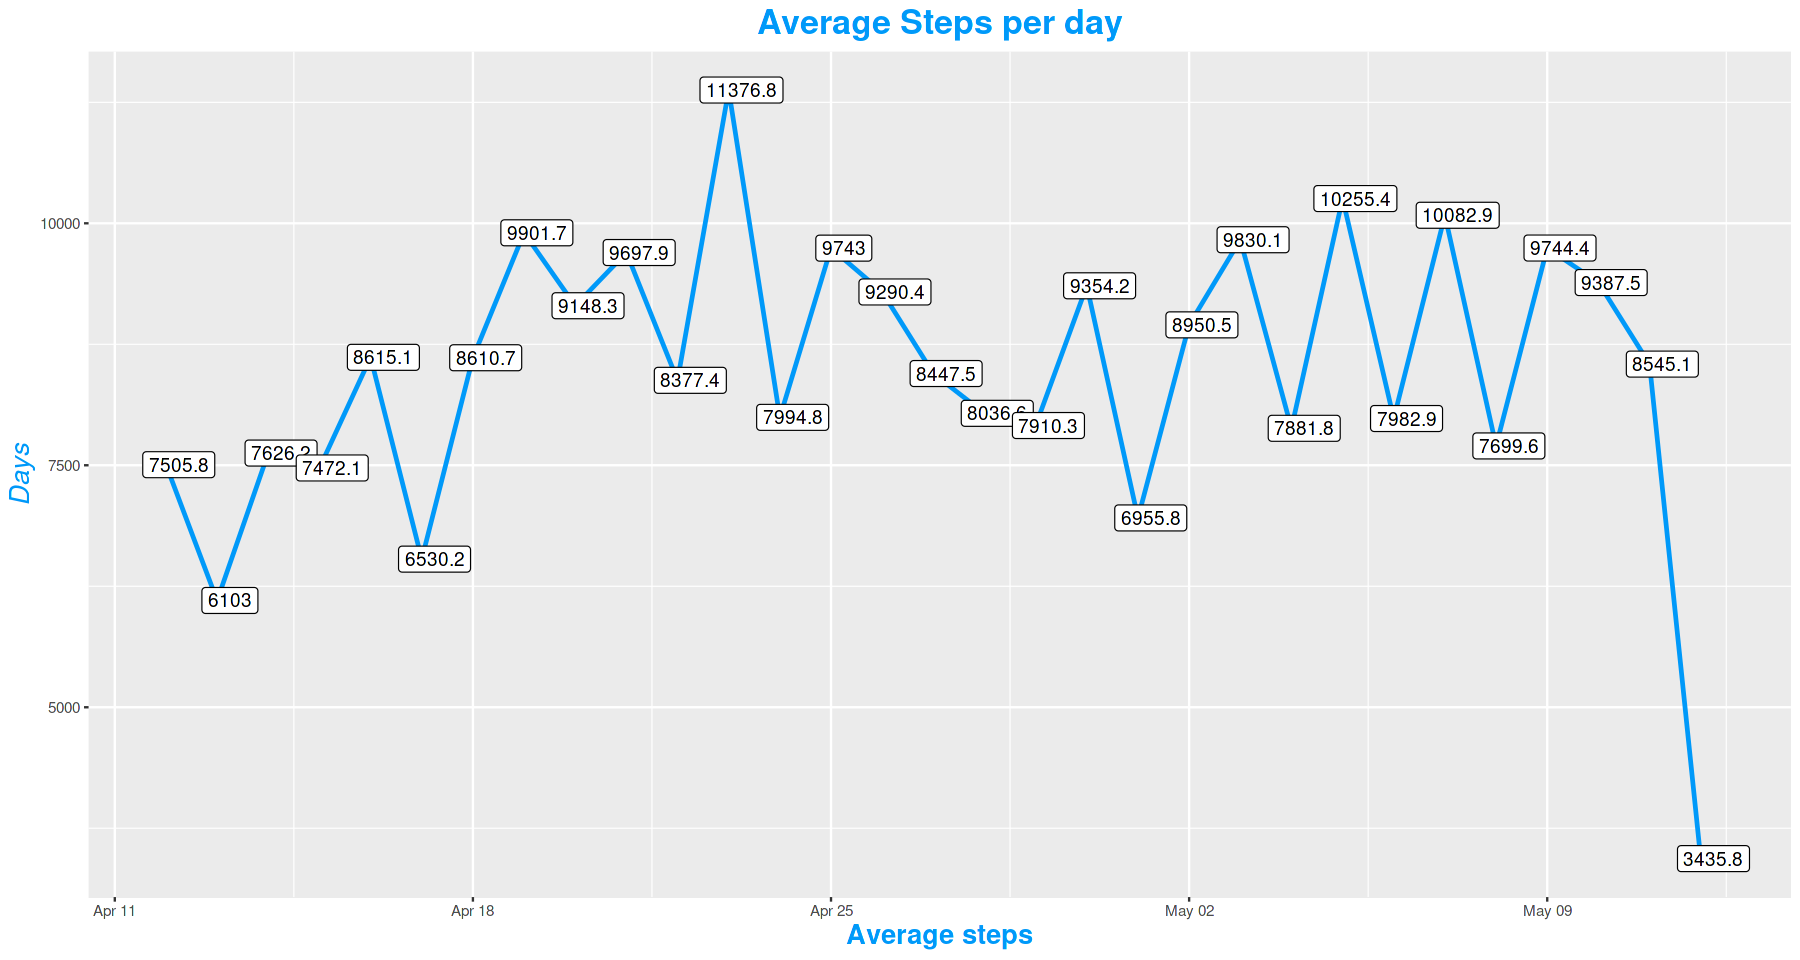

In [59]:
# Basic line plot with points
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

ggplot(data=daily_average_by_date, aes(x=date, y=mean_daily_steps)) +
    geom_line(color = "#0099f9", size = 1) +
    geom_point(color = "#0099f9", size = 2) +
    geom_label(
        aes(label = round(mean_daily_steps, digits=1)),
        nudge_x = 0.25,
        nudge_y = 0.25
    )+
    labs(title="Average Steps per day",x="Average steps", y = "Days")+
    theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


We can also see which day in a week users are most active (steps).

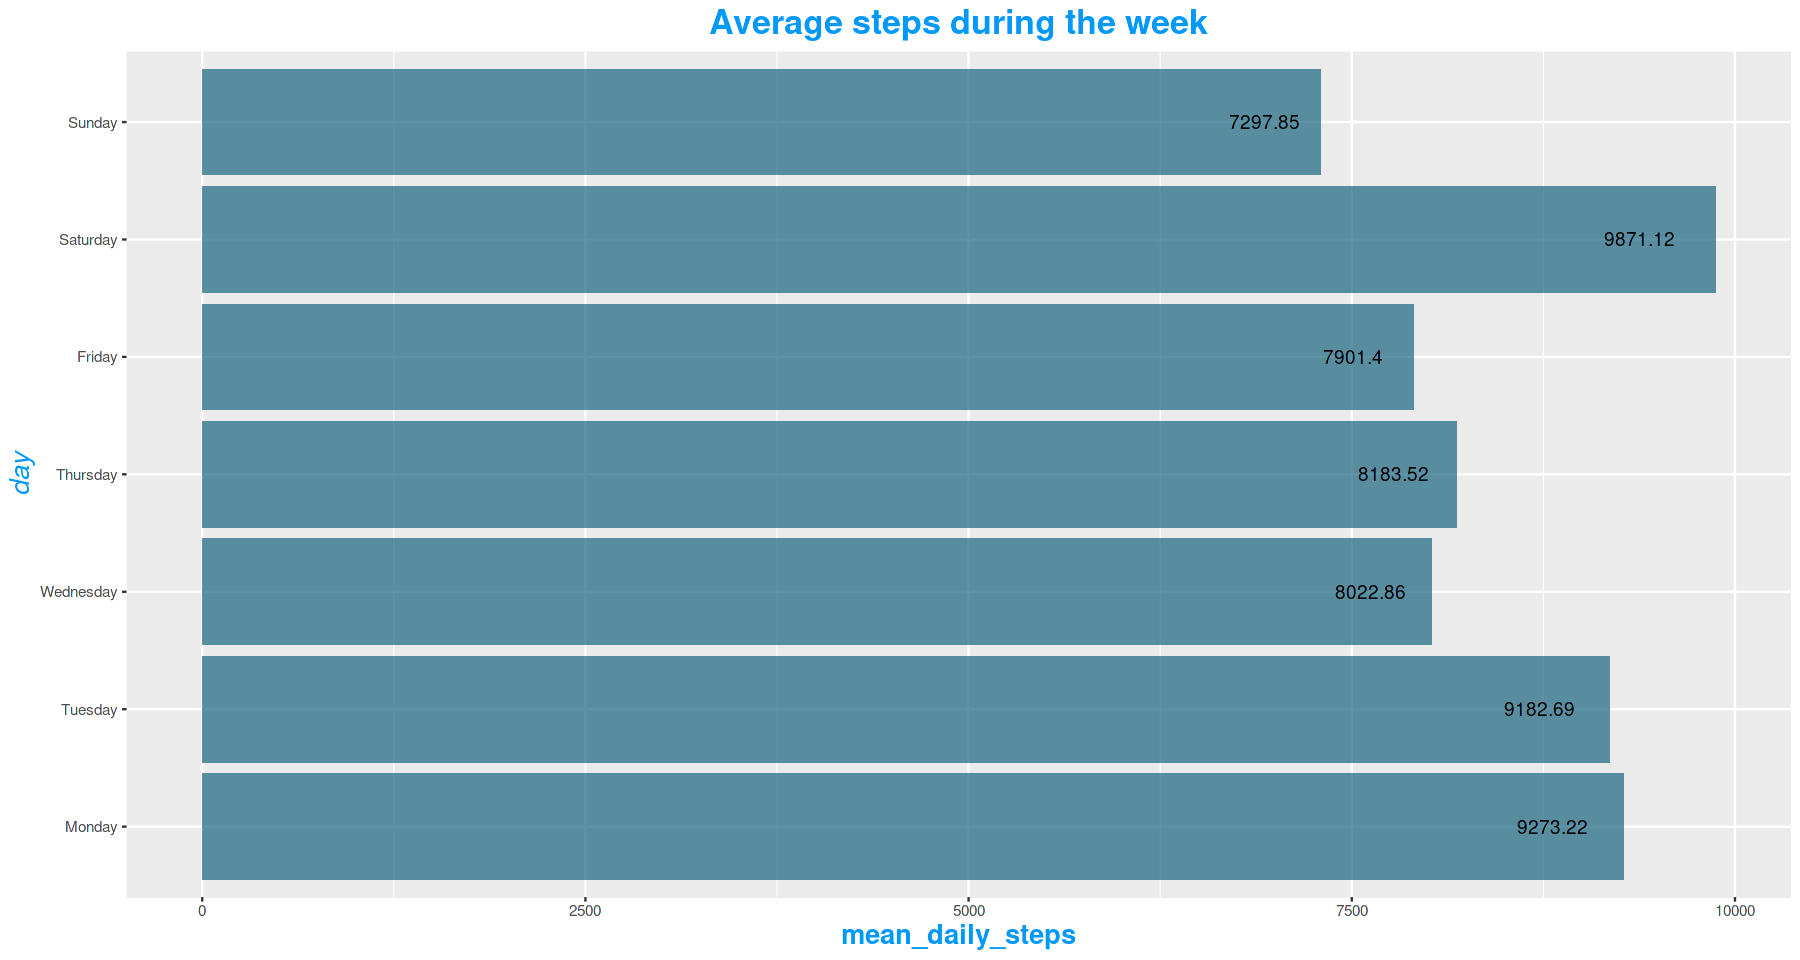

In [60]:
# 1: uniform color. Color is for the border, fill is for the inside
ggplot(daily_average_by_weekday, aes(x=day, y=mean_daily_steps)) + 
  geom_bar(stat = "identity",fill=rgb(0.1,0.4,0.5,0.7) ) +
  coord_flip()+
  geom_text(aes(label = round(mean_daily_steps,2)),position = position_stack(vjust = 0.95))+
  labs(title="Average steps during the week")+
  theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


This chart shows the average activity of all users during the week. As you can see, users were most active on Mondays, Tuesdays and Saturdays and least active on Sundays, Wednesdays and Fridays.

Next, we will see which time in a day the users are most active.

In [61]:
avg_steps_by_hours <- hourly_steps %>%
    group_by(hour) %>%
    summarize(avg_step = mean(StepTotal))

# avg_steps_by_hours$avg_step <- 
# factor(avg_steps_by_hours$avg_step, 
#        levels = c('00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'))
avg_steps_by_hours

hour,avg_step
<chr>,<dbl>
00,42.188437
01,23.102894
02,17.110397
03,6.426581
04,12.699571
05,43.869099
06,178.508056
07,306.049409
08,427.544576


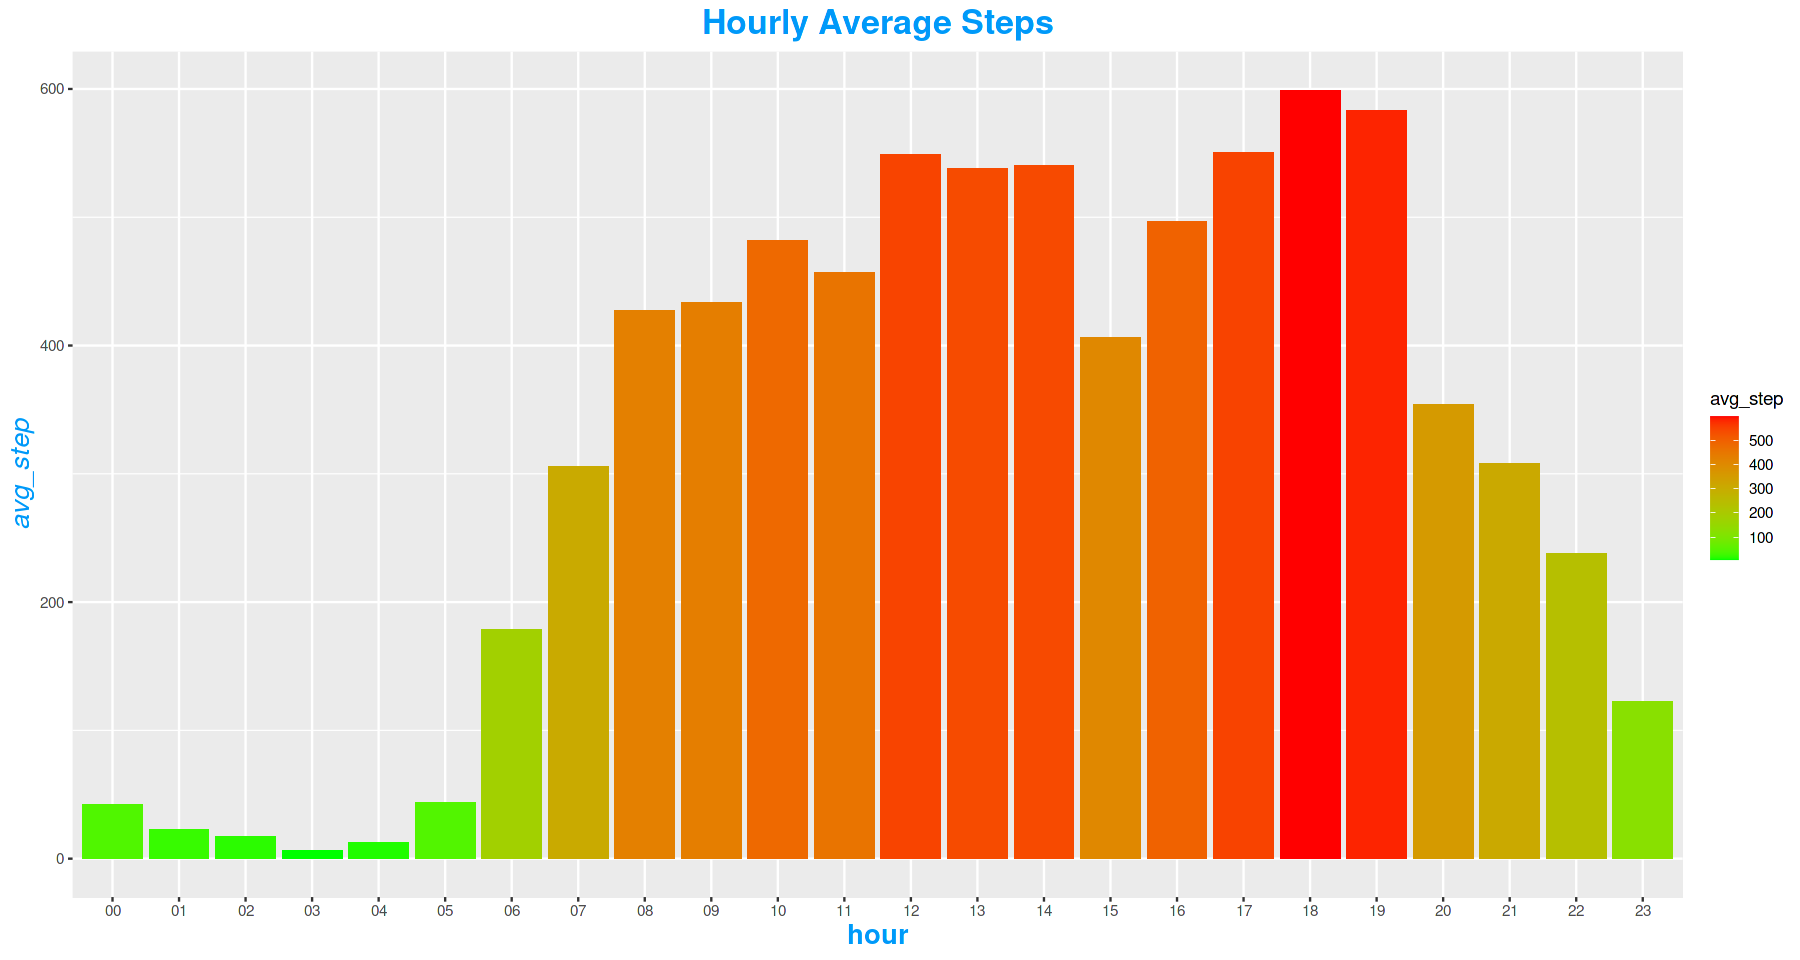

In [62]:
avg_steps_by_hours %>%
  ggplot() + 
  geom_col(mapping = aes(x=hour, y = avg_step, fill = avg_step))+
  labs(title="Hourly Average Steps")+
  scale_fill_gradient(low = "green", high = "red")+
  theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


Based on the active hours, we can see that users mostly walk during the day, from 12pm-2pm, and they are most active around 6-7pm. We might suggest that 12pm-2pm is the time when users go out for lunch and meet up with friends/colleagues, and 6-7pm is the rush hour when users commute from work to home.

To better analyze the active hours, we might break it down by days in a week.

In [63]:
avg_steps_by_hours_week <- hourly_steps %>%
    group_by(hour,day) %>%
    summarize(avg_step = mean(StepTotal))
avg_steps_by_hours_week$day <- 
factor(avg_steps_by_hours_week$day , 
       levels = c("Monday", "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'))
head(avg_steps_by_hours_week)

`summarise()` has grouped output by 'hour'. You can override using the `.groups` argument.



hour,day,avg_step
<chr>,<fct>,<dbl>
00,Friday,44.27778
00,Monday,30.00833
00,Saturday,55.20325
00,Sunday,82.59504
00,Thursday,31.28276
00,Tuesday,28.34667


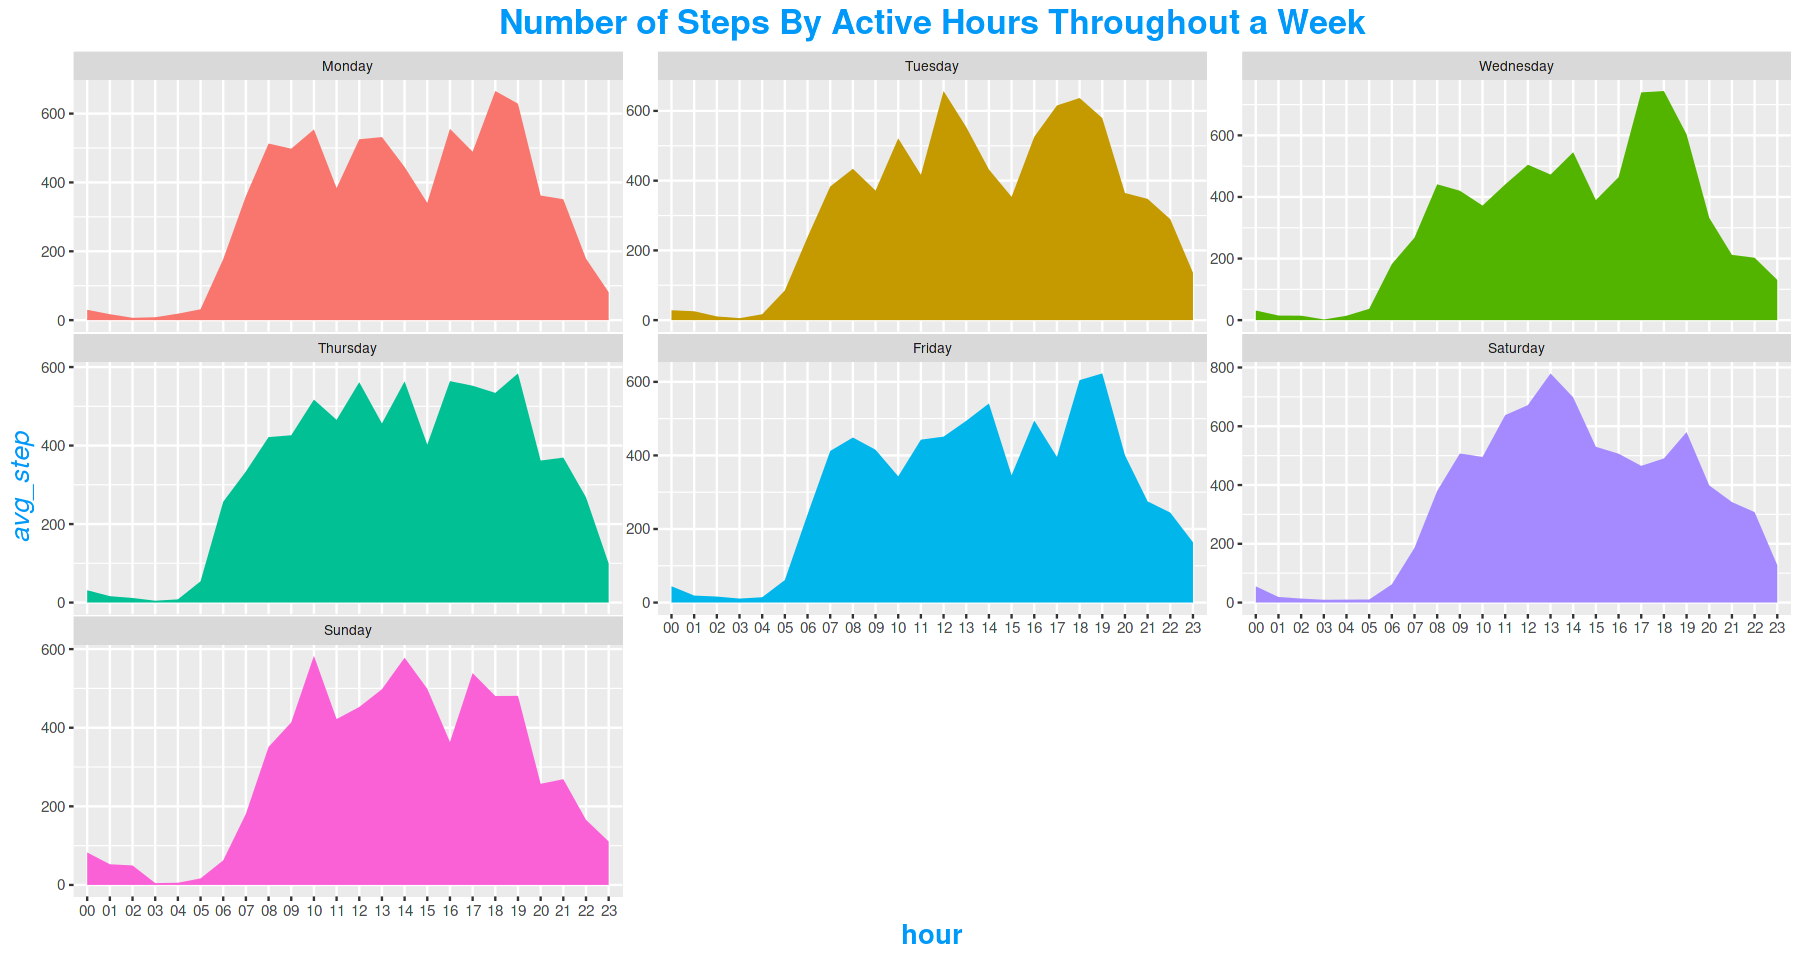

In [64]:
avg_steps_by_hours_week %>%
  ggplot( aes(x=hour, y=avg_step, group=day, fill=day)) +
    geom_area() +
    theme(legend.position="none") +
    ggtitle("Number of Steps By Active Hours Throughout a Week") +
    theme(
      legend.position="none",
      panel.spacing = unit(0.1, "lines"),
      strip.text.x = element_text(size = 8),
      plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
      axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
      axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    ) +
    facet_wrap(~day, scale="free_y")

We can clearly see that, during weekdays(Monday-Friday), user activity peaks around 7-9am, 12-2pm, and 6-7pm. This means that these users might be students or working during the day to make ends meet. Activity data during the weekend shows that users tend to wake up late and have a more intense activity/exercise (on Sat the average recorded steps go over 600 between 10am-1pm). They also tend to sleep late at the weekend, with the average steps from 9-11pm are still around 300, whereas on weekdays the average steps in this time range are around 100-200.

Now lets look at the step data and see if we can classify them.

The following pedometer indices ([link](https://www.10000steps.org.au/articles/counting-steps/)) have been developed to provide a guideline on steps and activity levels:

* Sedentary is less than 5,000 steps per day 
* Low active is 5,000 to 7,499 steps per day
* Somewhat active is 7,500 to 9,999 steps per day
* Active is more than 10,000 steps per day
* Highly active is more than 12,500

We will now classify our users by the daily average steps.




In [65]:
user_step_type <- daily_average %>%
  mutate(step_type = case_when(
    (mean_daily_steps < 5000) ~ "sedentary",
    (mean_daily_steps >= 5000) & (mean_daily_steps) < 7499 ~ "lightly active", 
    (mean_daily_steps >= 7500) & (mean_daily_steps) < 9999 ~ "fairly active", 
    (mean_daily_steps >= 10000) ~ "very active"
  ))

head(user_step_type)

Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,step_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,very active
1644430081,7967.750,2977.750,294.0000,fairly active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,sedentary
2026352035,5618.679,1540.786,506.1786,lightly active
2320127002,5079.000,1804.000,61.0000,lightly active


Now that we have a new column with the user activity type based on their average daily steps, we will calculate the percentage of each user step type and visualize them on a pie chart.

In [66]:
user_step_type_pct <- user_step_type %>%
    group_by(step_type) %>%
    summarise(total = n()) %>%
    mutate(pct = total/sum(total)) %>%
    mutate(labels = scales::percent(pct,accuracy = 0.1))
    ## Compute the position of labels
#     mutate(ypos = cumsum(pct)- 0.5*pct )

#order the level for according colors in pie chart
user_step_type_pct$step_type <- 
factor(user_step_type_pct$step_type , 
       levels = c("very active", "fairly active", "lightly active", "sedentary"))

head(user_step_type_pct)

step_type,total,pct,labels
<fct>,<int>,<dbl>,<chr>
fairly active,9,0.3750000,37.5%
lightly active,5,0.2083333,20.8%
sedentary,5,0.2083333,20.8%
very active,5,0.2083333,20.8%


Based on the percentage of the 4 types, we can see that users are quite equally distributed by their activity considering the daily average amount of steps.

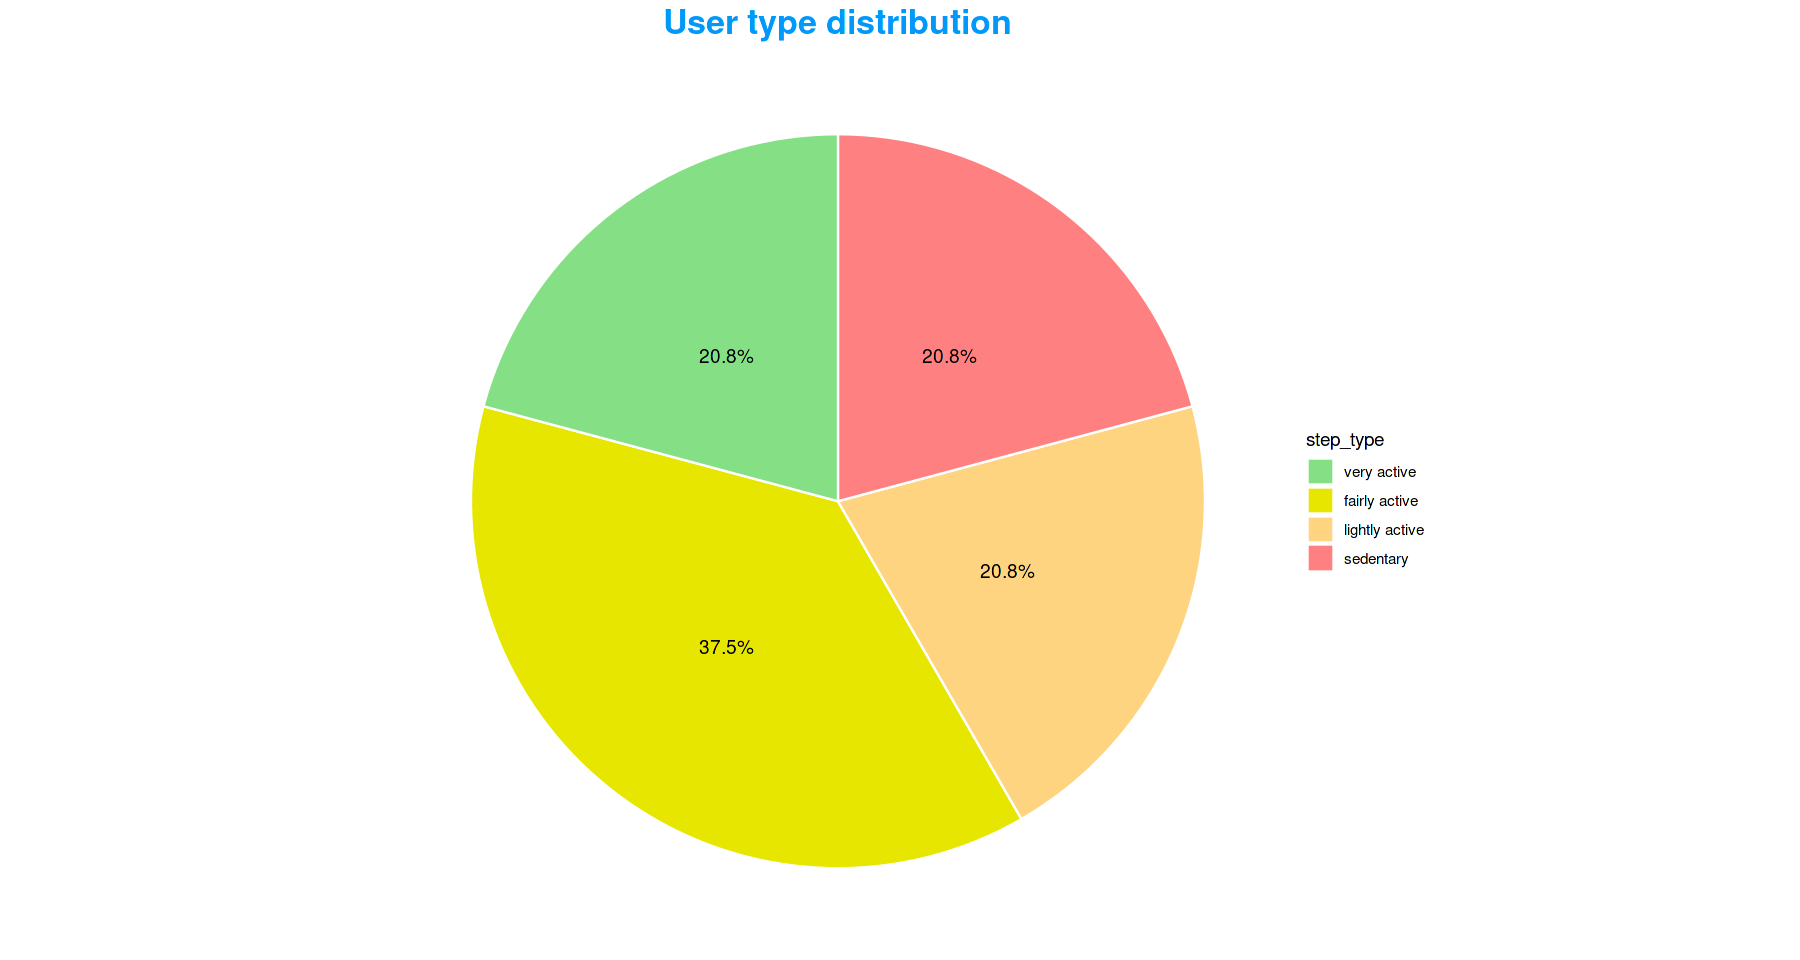

In [67]:
#ggplot2 does not offer any specific geom to build piecharts.
user_step_type_pct %>%
    ggplot(aes(x="", y=pct, fill = step_type)) +
    geom_bar(stat="identity", width=1, color="white") +
    coord_polar("y", start=0) +
  
    theme_void() + # remove background, grid, numeric labels 
    theme(plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
    
    scale_fill_manual(values = c("#85e085","#e6e600", "#ffd480", "#ff8080")) +
    geom_text(aes(label = labels),position = position_stack(vjust = 0.5))+
    labs(title="User type distribution")+
    theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5)
    )
    

Overall, Fairly Active users constitute the main type of Fitbit users. But it is safe to say that smart-devices can be suitable for different activity levels.

**Tracking steps may encourage a person to walk more, regardless of their activity level.**

## Sleep

First, we want to check the user's sleeping pattern. Is there any user that happens to sleep more or less than others based on their total time in bed? Is there a problem with the data, or is there an accuracy issue with the tracking device?

In [68]:
head(daily_average)

Id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


In [69]:
#convert numeric to character
daily_average$Id <- as.character(daily_average$Id)

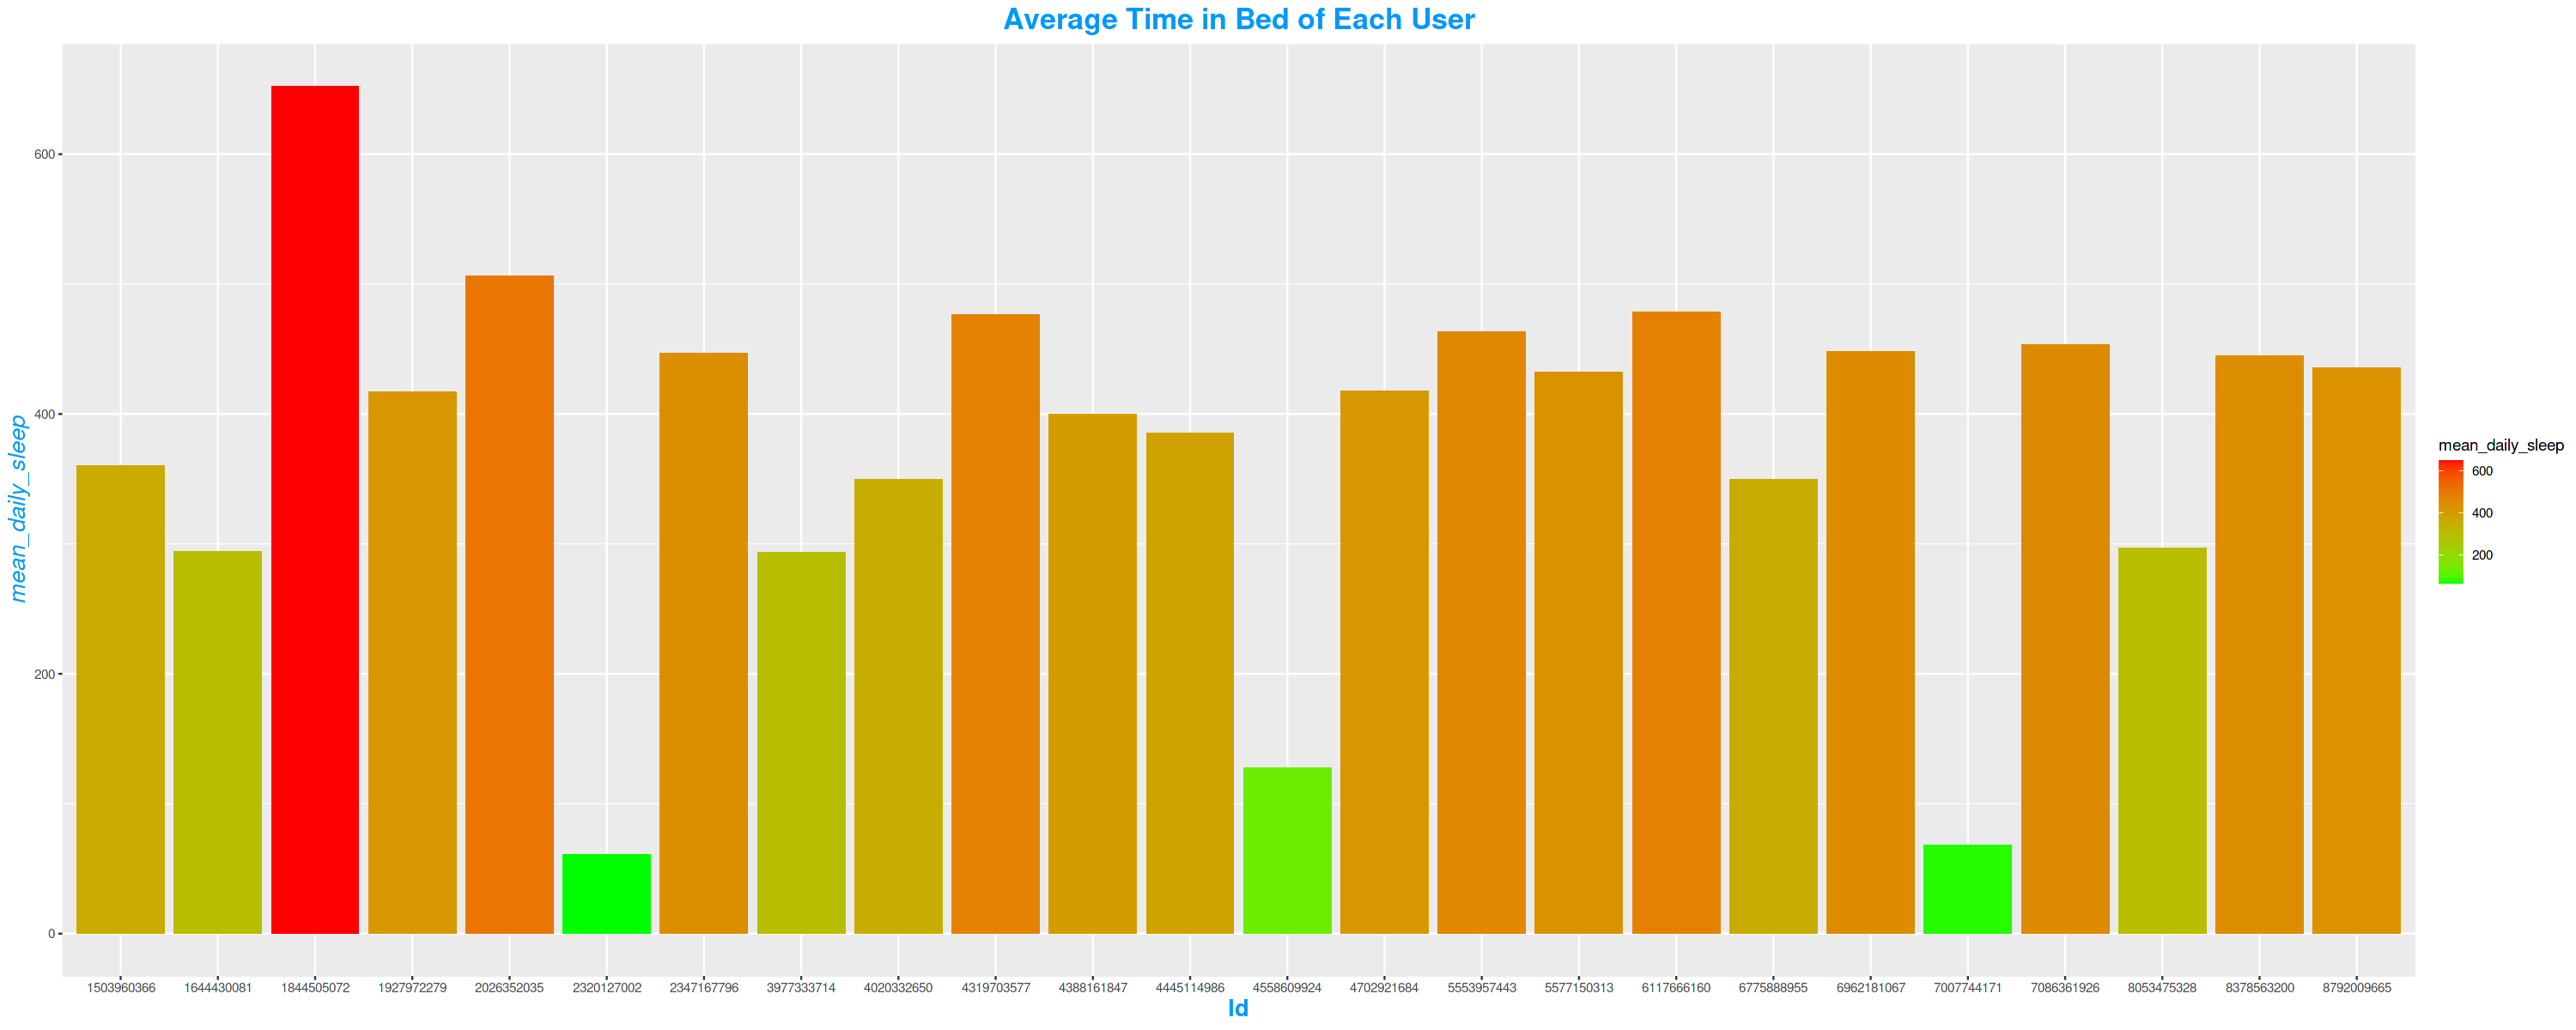

In [70]:
# Make plots wider 
options(repr.plot.width=25, repr.plot.height=10)

daily_average %>%
  ggplot() + 
  geom_col(mapping = aes(x=Id, y = mean_daily_sleep, fill = mean_daily_sleep))+
  labs(title="Average Time in Bed of Each User")+
  scale_fill_gradient(low = "green", high = "red")+
  theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


User `1844505072` has the most time in bed, while user `2320127002` and `7007744717` are the two with the least time in bed. We do not have further demographic data of these users, so it is hard to explain why they seem to be an outliers. But overall, we can see that most users have around 300-400 hours in bed.

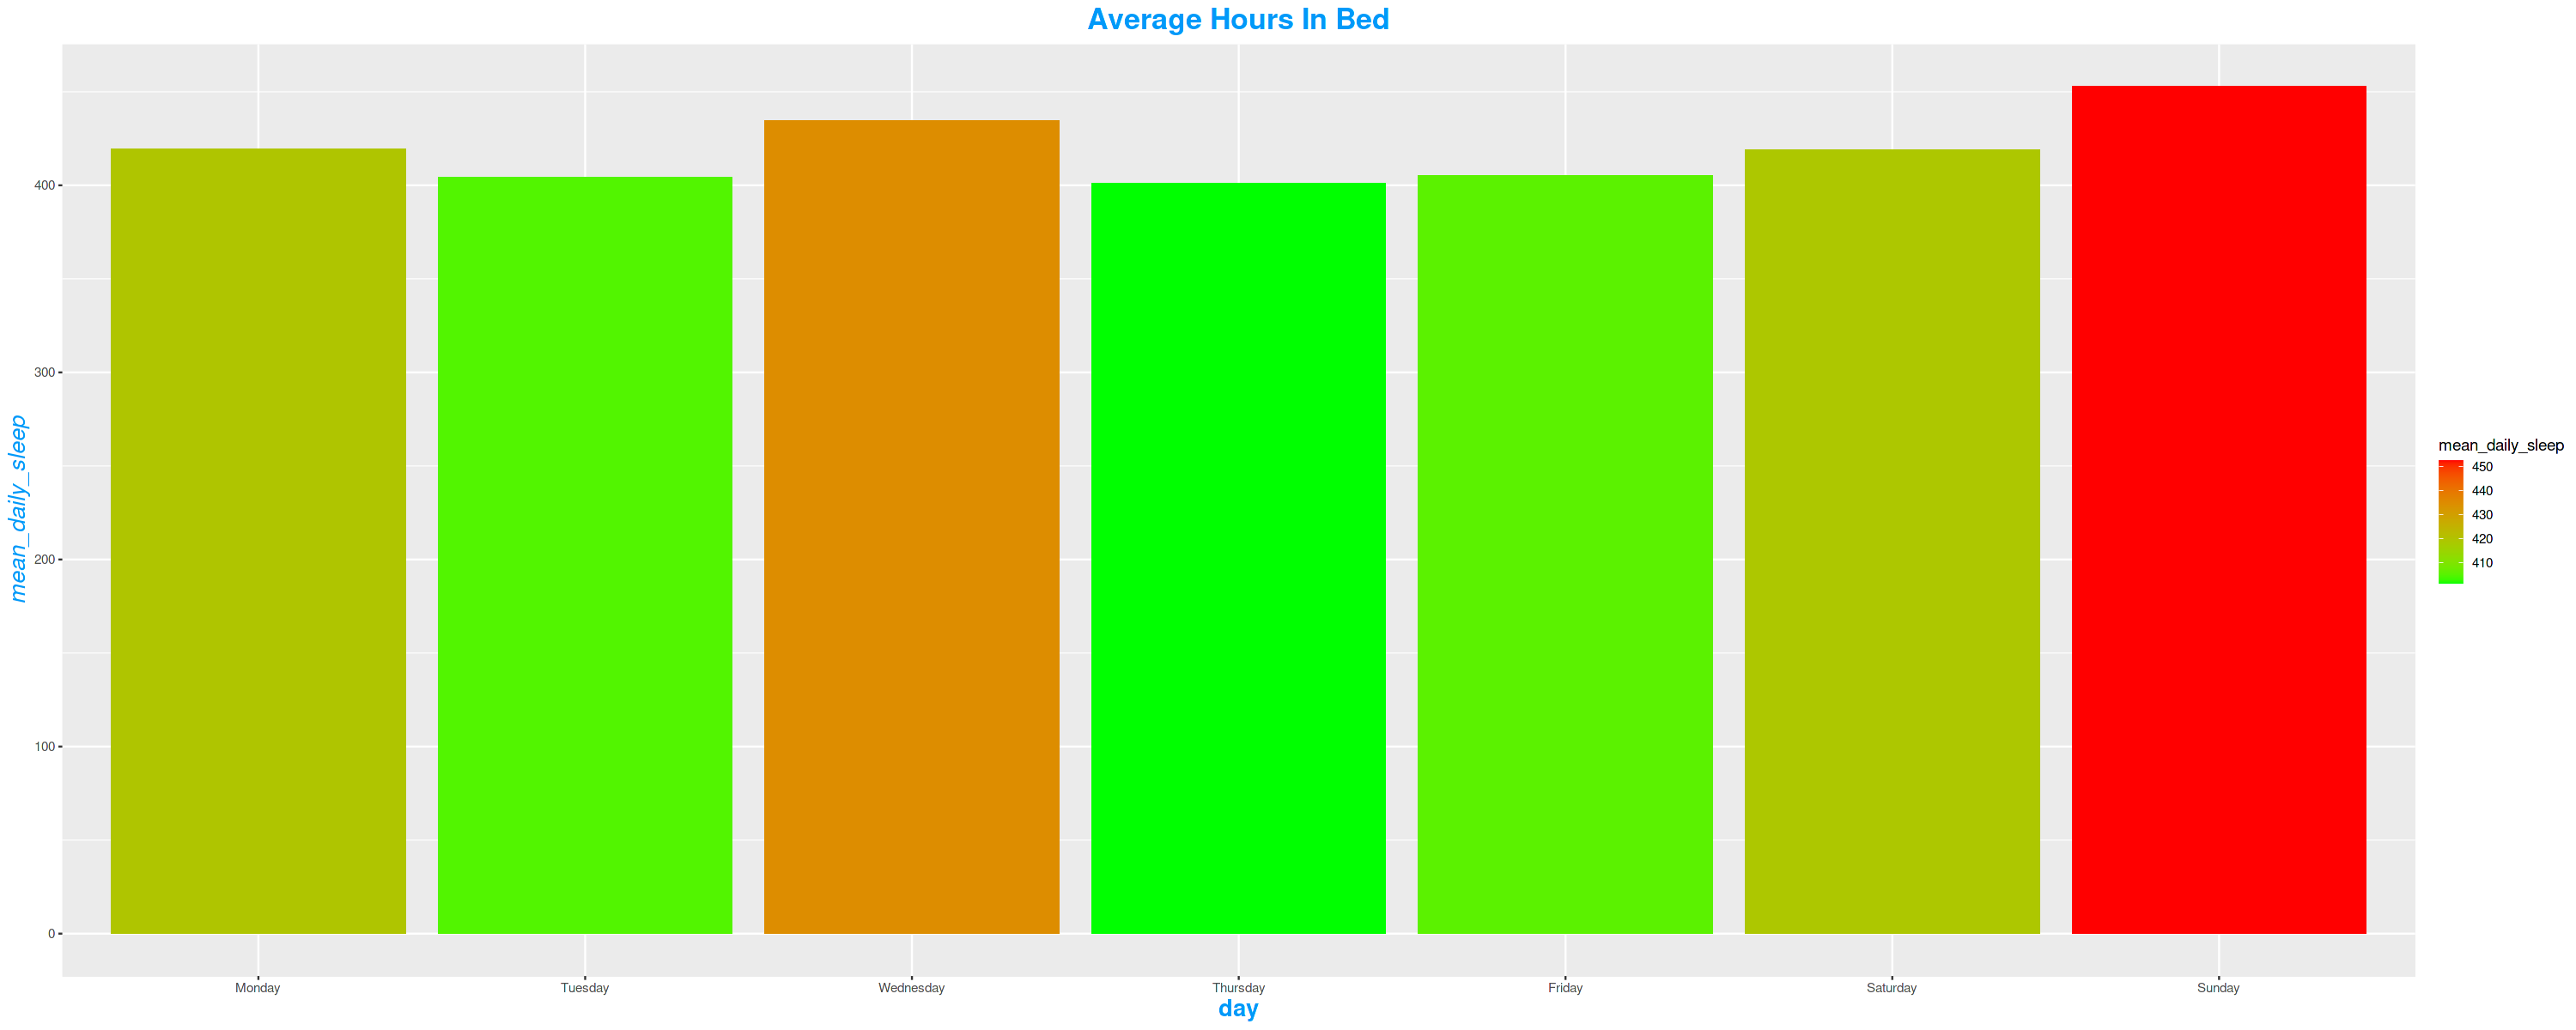

In [71]:
daily_average_by_weekday %>%
  ggplot() + 
  geom_col(mapping = aes(x=day, y = mean_daily_sleep, fill = mean_daily_sleep))+
  labs(title="Average Hours In Bed")+
  scale_fill_gradient(low = "green", high = "red")+
  theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


This chart describes the average minutes asleep for all users. Users sleep the most on Sundays and Wednesdays, which aligns to their activity levels (least active on Sundays and Wednesdays). The least minutes of sleep per day recorded were on Tuesdays and Thursday.

**By tracking sleep quality, BellaBeat may give users valuable feedback on their sleep that could help them adjust their sleep schedule to get more rest.**

## Calories

Fitbit devices combine user's basal metabolic rate (BMR)—the rate at which a user's burn calories at rest to maintain vital body functions (including breathing, blood circulation, and heartbeat)—and his/her activity data to estimate that user's calories burned. 

If their device tracks heart rate, the user's heart-rate data is also included, especially to estimate calories burned during exercise. The number seen on the Fitbit device is that user's total calories burned for the day ([link](https://help.fitbit.com/articles/en_US/Help_article/1141.htm)).

Every day, we burn calories when we move around, exercise, and go about our daily tasks.

Our body even burns calories at rest, through basic functions like:

* breathing
* circulating blood
* cell processes

The average person burns around 1800 calories a day doing absolutely nothing. The average calories burned per day by a real American woman is actually closer to 2,400, while for a man it's about 3,100.

We want to check if any user has exceptionally higher/lower calories burnt than other.

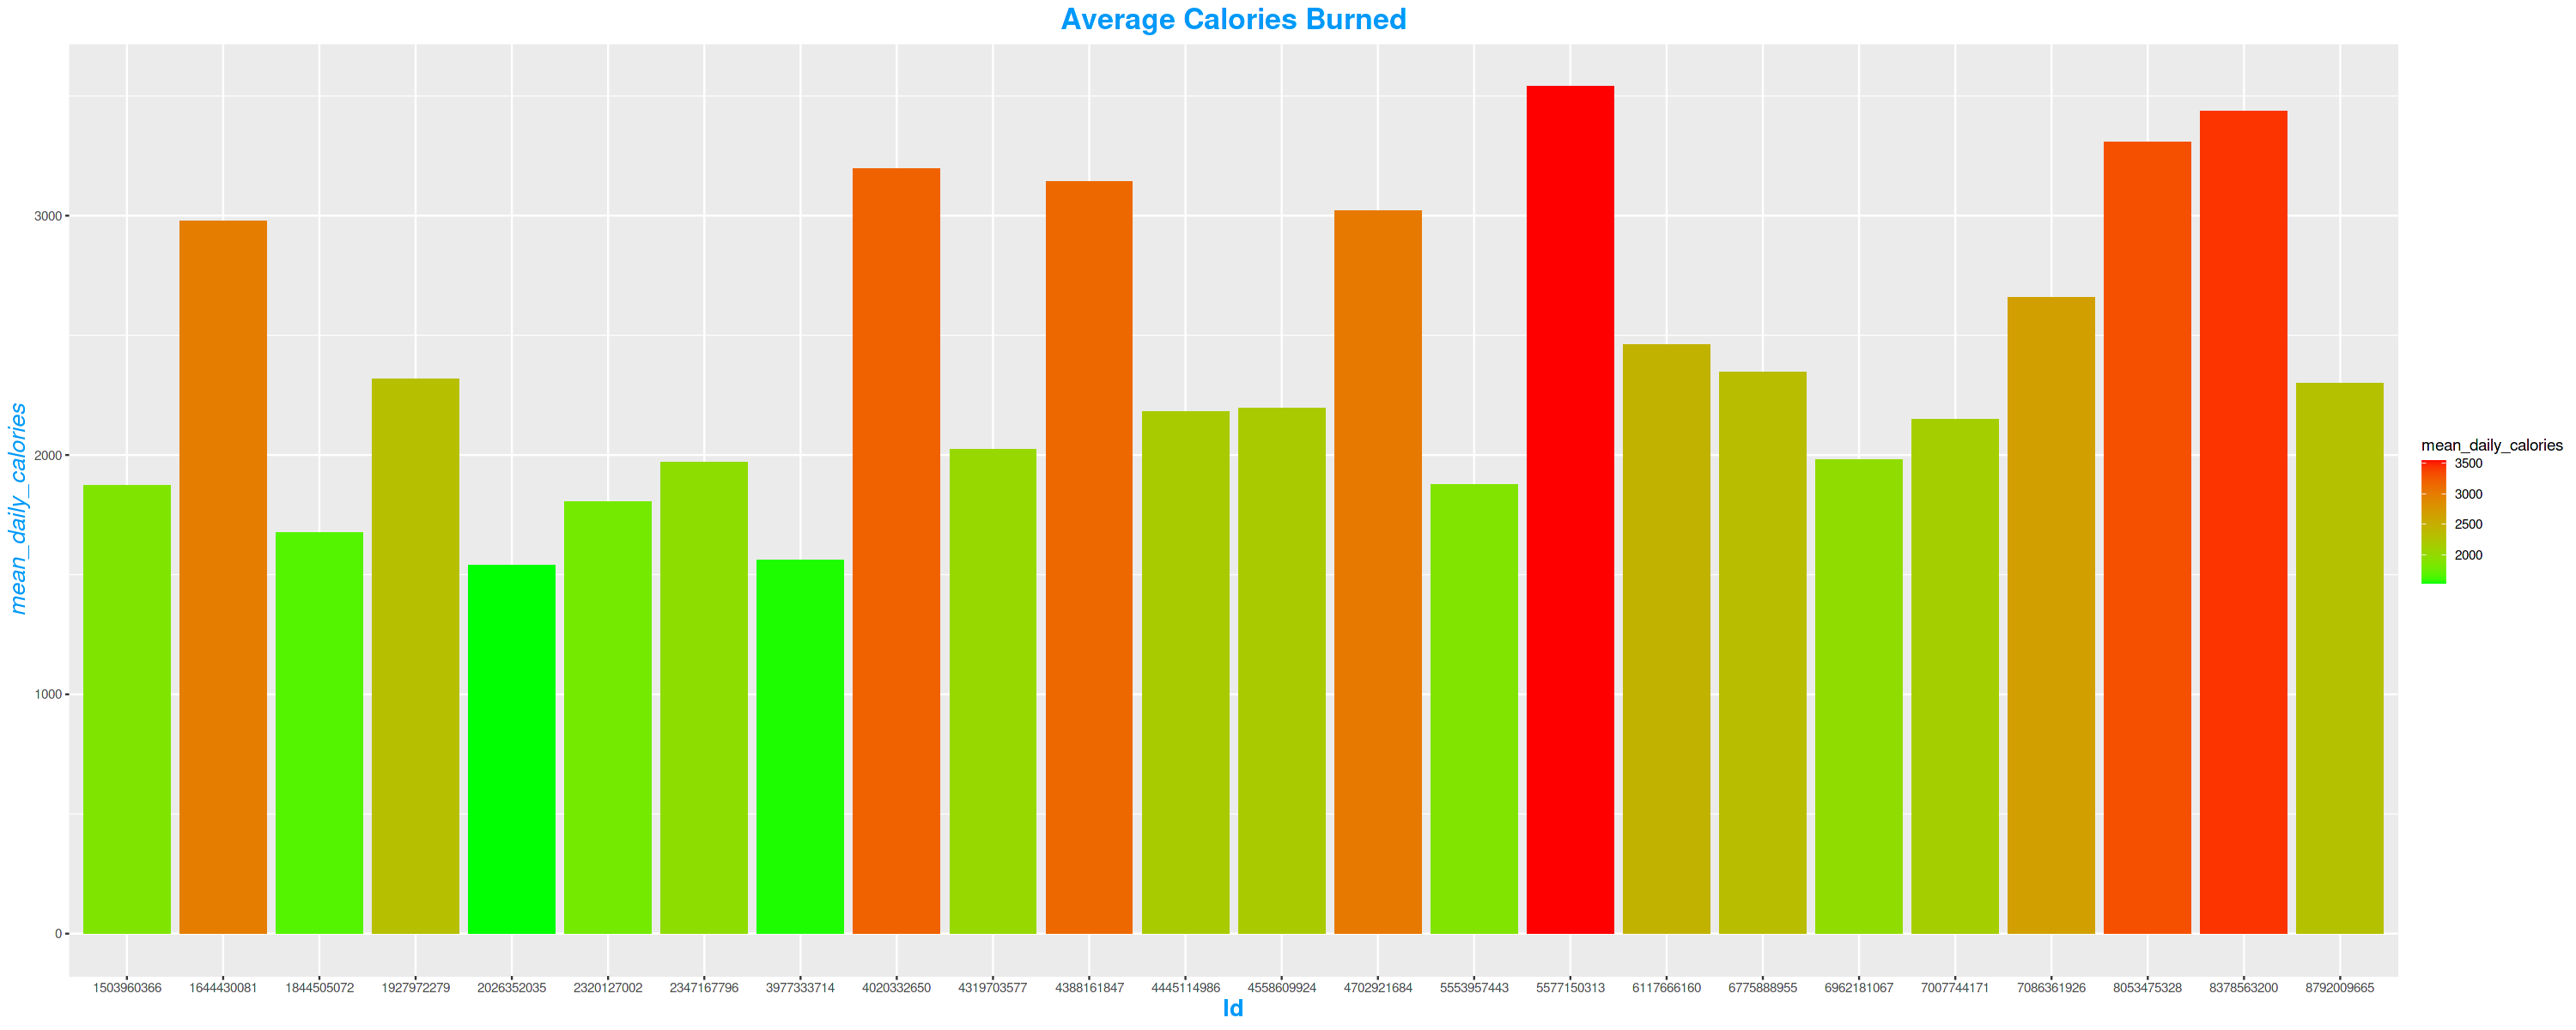

In [72]:
# Make plots wider 
options(repr.plot.width=25, repr.plot.height=10)

daily_average %>%
  ggplot() + 
  geom_col(mapping = aes(x=Id, y = mean_daily_calories, fill = mean_daily_calories))+
  labs(title="Average Calories Burned")+
  scale_fill_gradient(low = "green", high = "red")+
  theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


Overall, there seems to be no abnormal record. User `15577150313` has the most calories burnt, while user `3977333714` has the least.

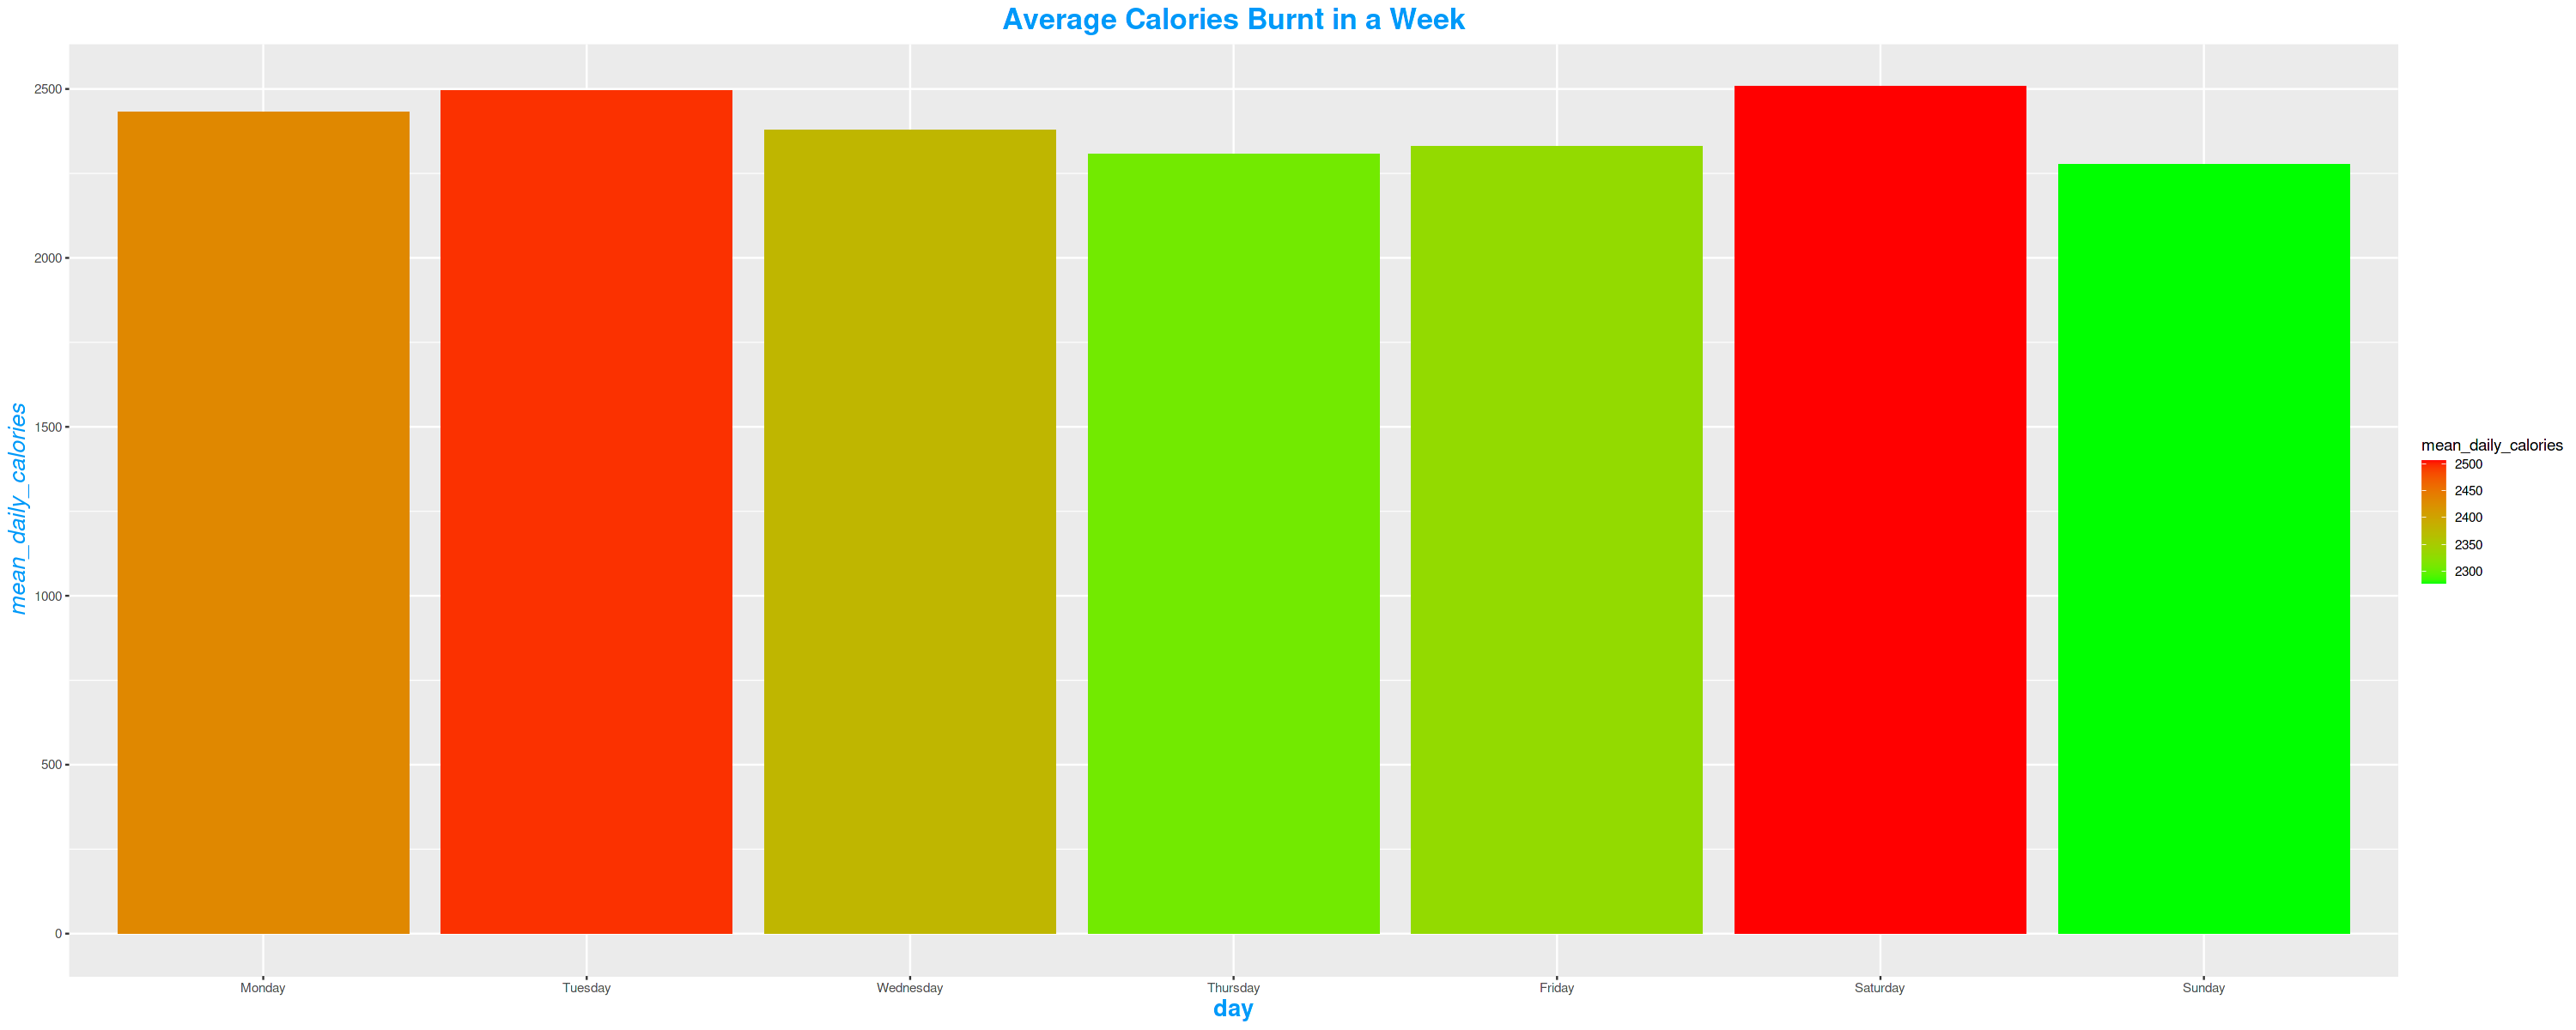

In [73]:
daily_average_by_weekday %>%
  ggplot() + 
  geom_col(mapping = aes(x=day, y = mean_daily_calories, fill = mean_daily_calories))+
  labs(title="Average Calories Burnt in a Week")+
  scale_fill_gradient(low = "green", high = "red")+
  theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


The average calories burnt data also aligns with the average step count data: Saturdays and Tuesdays have witnessed the most activity and calories burnt, while in Sundays users are less active and thus have the least calories burnt.

## Intensity

Let's look at intensities data over time (hourly).

In [74]:
avg_int_by_hours <- hourly_int %>%
    group_by(hour) %>%
    summarize(avg_int = mean(TotalIntensity))
avg_int_by_hours

hour,avg_int
<chr>,<dbl>
00,2.1295503
01,1.4190782
02,1.0439443
03,0.4437299
04,0.6330472
05,4.9506438
06,7.7712137
07,10.7336198
08,14.6680988


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


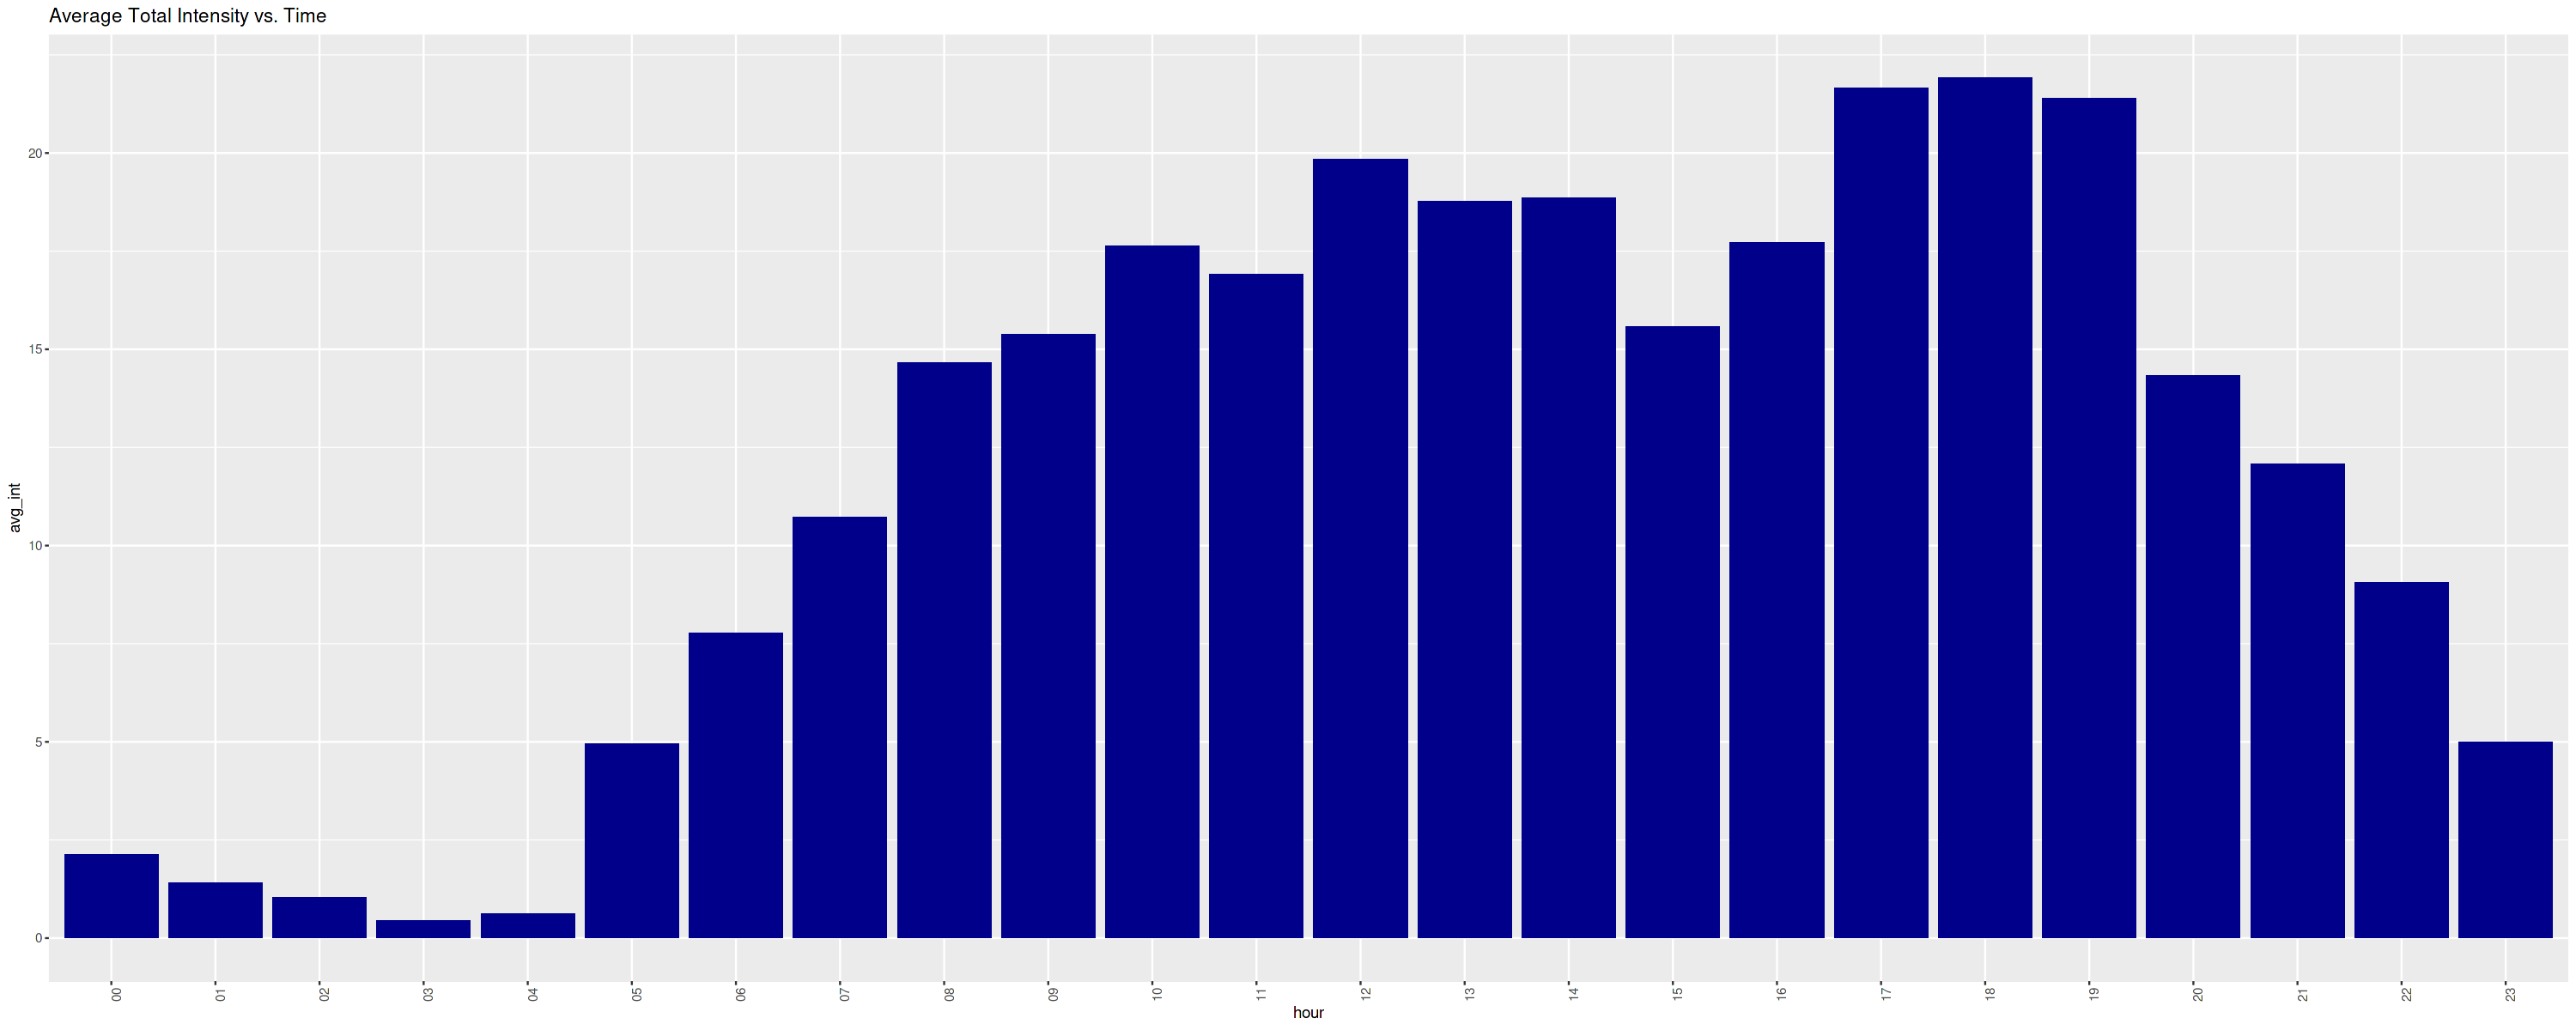

In [75]:
ggplot(data=avg_int_by_hours, aes(x=hour, y=avg_int)) +
    geom_histogram(stat = "identity", fill='darkblue') +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(title="Average Total Intensity vs. Time")

Our findings:
* People are more active between 8am and 7pm.
* Most activity happens between 5pm and 7pm, and between 12-2pm - People might go to a gym or for a walk after finishing work, and during lunch time. 

We can use this time in the Bellabeat app to remind and motivate users to go for a run or walk.

## METs

*A Note On METs*

MET stand for Metabolic Equivalent of Task. One MET equals 3.5 milliliters of oxygen per kilogram of body weight per minute. This value of MET is for the body while it is at total rest in a conscious or sleeping state.

The advantage of using MET as a measure for intensity of any exercise is that, unlike calories, the value of MET depends on oxygen consumption of person and not weight or any other factor. For example, two people walking 1 mile at the same speed will consume the same amount of oxygen and burn the same number of METs. It does not depend on both the person's weight. On the other hand, two persons with different weights will burn different amount of calories for the same activity.

METs come in handy in two instances: To track your cardio fitness progress over time, you can work toward sustaining higher MET levels for longer periods and hitting higher MET values during your intervals. Or, if you have a cardiac condition, your doctor can use a MET capacity test to prescribe a safe exercise zone. (This can be done with heart-rate values as well.)

A healthy 50-year-old man should have a capacity of at least 9.2 METs; a healthy 50-year-old woman should clock in at 8.2 METs or higher, according to a recent study on women’s fitness in the New England Journal of Medicine. For men age 20, 13.5 METs; age 30, 11.4 METs; age 40, 10.3 METs. For women age 20, 12.1 METs; age 30, 10.8 METs; age 40, 9.5 METs.

 

In [76]:
head(met)

Id,ActivityMinute,METs,date_time,hour,day,date
<dbl>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<date>
1503960366,4/12/2016 12:00:00 AM,10,2016-04-12 00:00:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:01:00 AM,10,2016-04-12 00:01:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:02:00 AM,10,2016-04-12 00:02:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:03:00 AM,10,2016-04-12 00:03:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:04:00 AM,10,2016-04-12 00:04:00,00,Tuesday,2016-04-12
1503960366,4/12/2016 12:05:00 AM,12,2016-04-12 00:05:00,00,Tuesday,2016-04-12


hour,avg_met
<chr>,<dbl>
00,10.84536
01,10.56022
02,10.40400
03,10.16942
04,10.24878
05,11.87237
06,12.94413
07,14.29216
08,15.56393


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


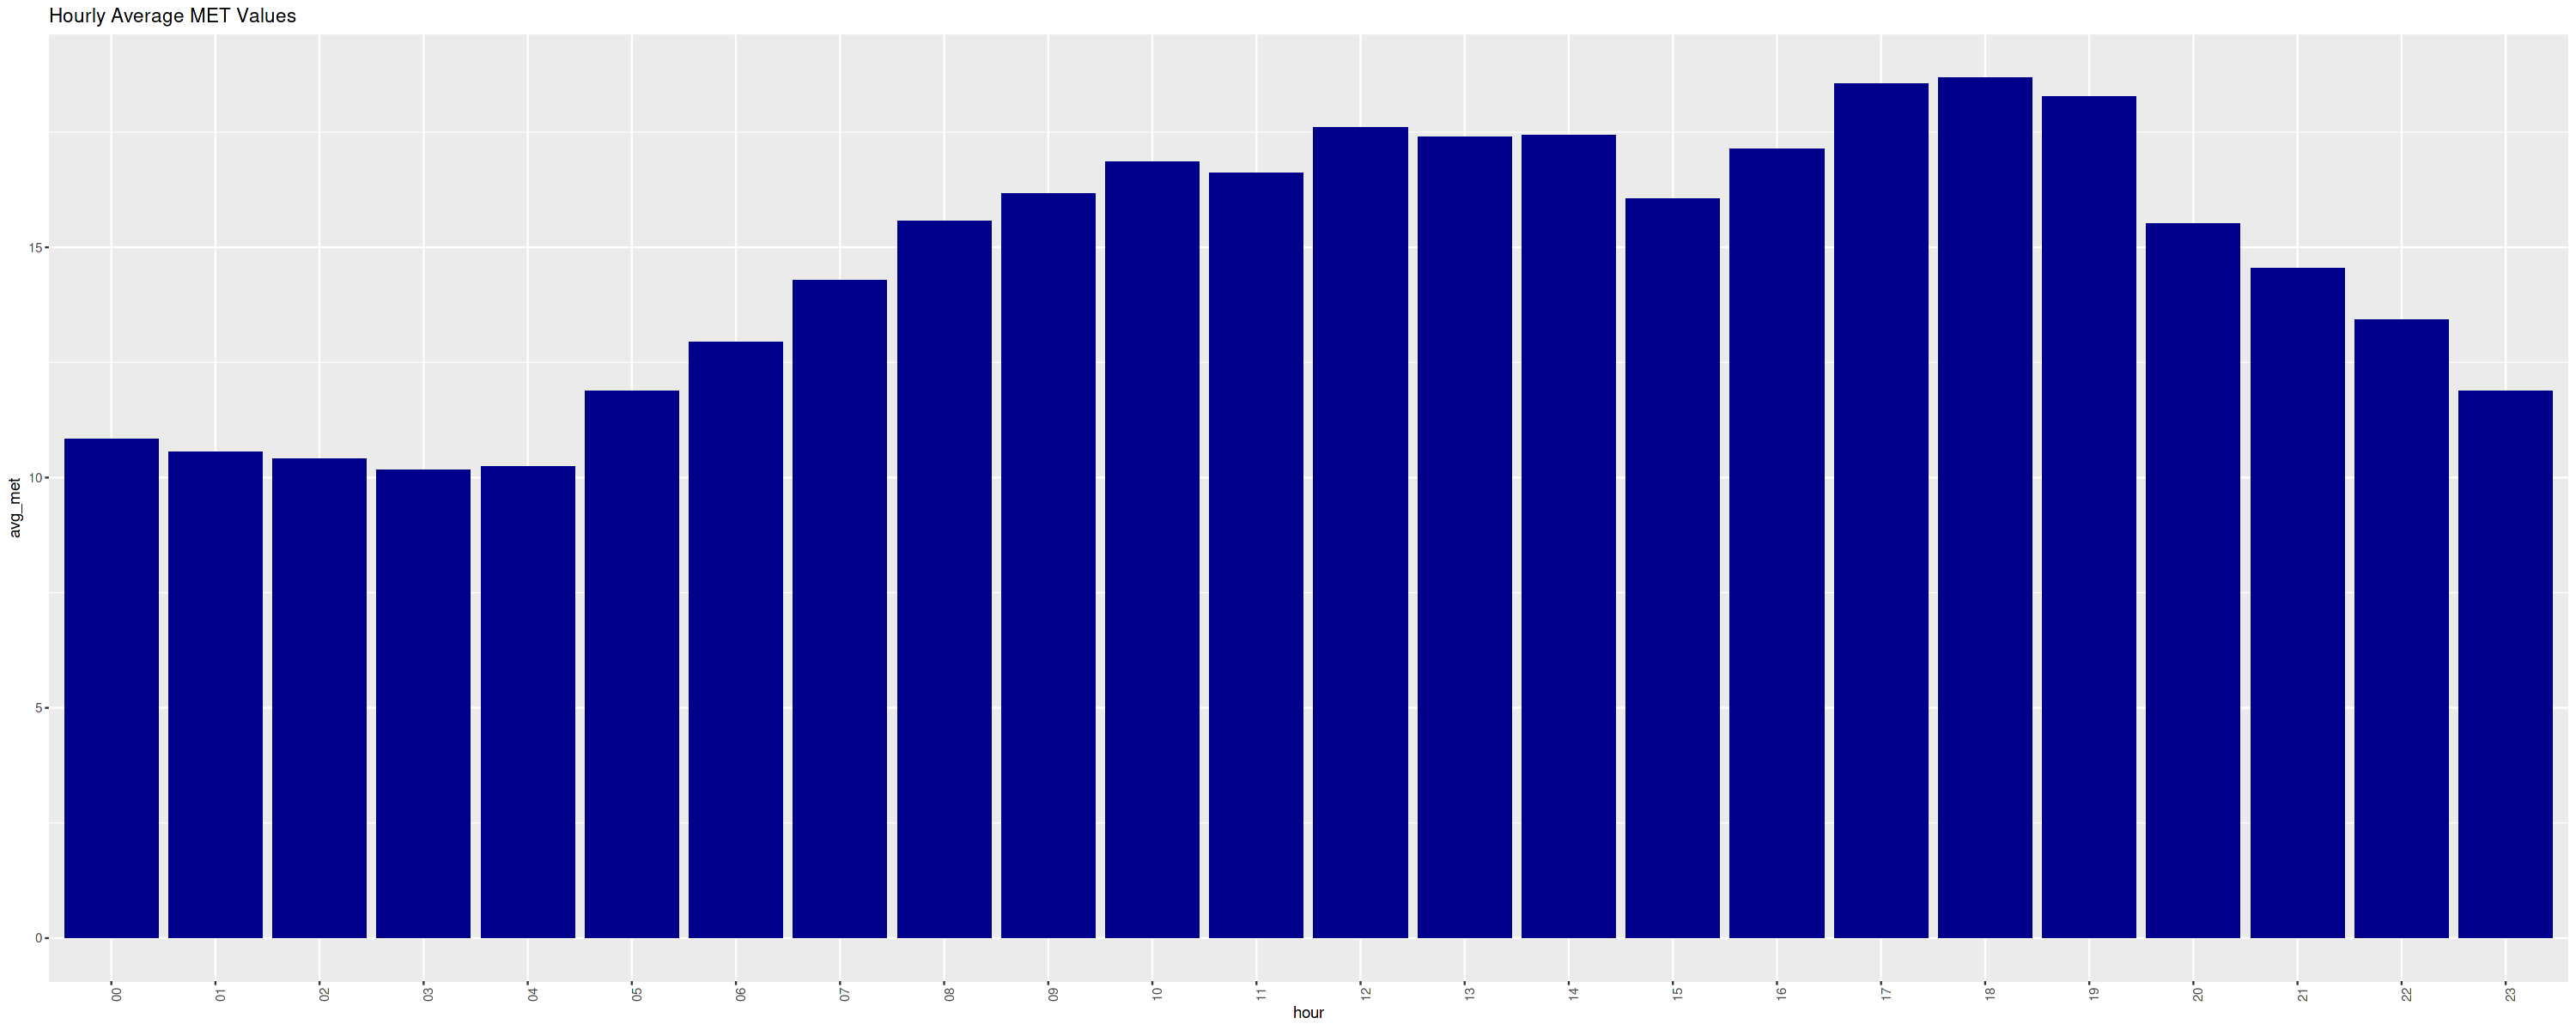

In [77]:
avg_met_by_hours <- met %>%
    group_by(hour) %>%
    summarize(avg_met = mean(METs))
avg_met_by_hours
ggplot(data=avg_met_by_hours, aes(x=hour, y=avg_met)) +
    geom_histogram(stat = "identity", fill='darkblue') +
    theme(axis.text.x = element_text(angle = 90)) +
    labs(title="Hourly Average MET Values")

Throughout a day these user tend to maintain a quite balanced MET levels, the highest MET values are recorded between 5-7pm. This aligns with the most active hours in a day.

In [78]:
# Get the daily METs for every user by summing the activity minute data.
daily_met <- aggregate(met$METs, by=list(Id = met$Id, date = met$date, day = met$day ), FUN=sum)
colnames(daily_met)[4] <- 'total_mets'
head(daily_met)

,Id,date,day,total_mets
,<dbl>,<date>,<chr>,<dbl>
1,1503960366,2016-04-15,Friday,22190
2,1624580081,2016-04-15,Friday,16174
3,1644430081,2016-04-15,Friday,19572
4,1844505072,2016-04-15,Friday,18446
5,1927972279,2016-04-15,Friday,15508
6,2022484408,2016-04-15,Friday,24342


In [79]:
weekday_met <-
    daily_met %>%
      group_by(day) %>%
      summarize(week_avg_mets = mean(total_mets))
weekday_met$day <- 
factor(weekday_met$day , 
       levels = c("Monday", "Tuesday", 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'))

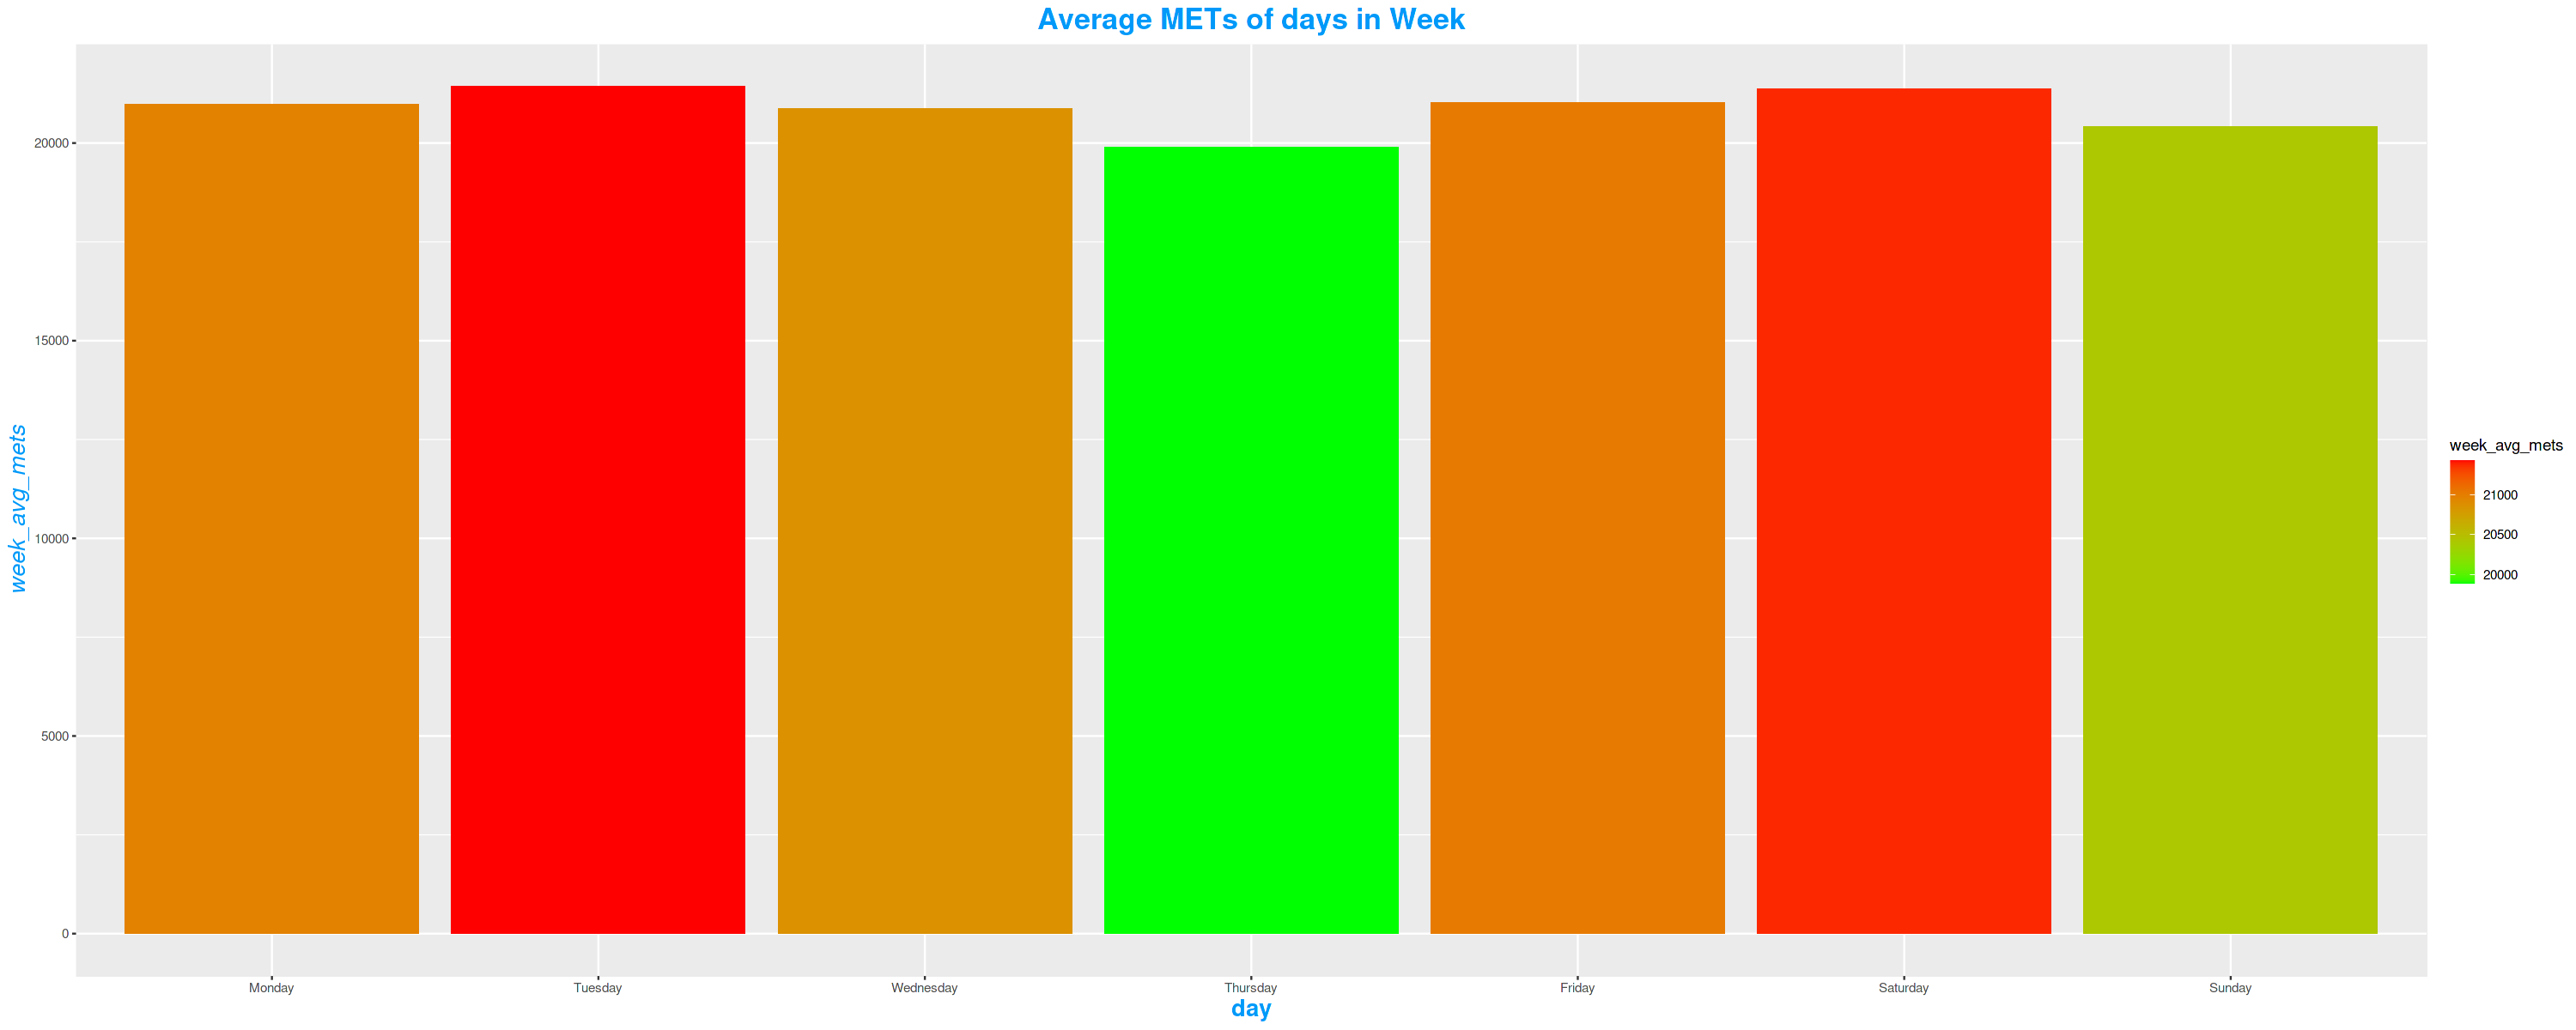

In [80]:

weekday_met %>%
  ggplot() + 
  geom_col(mapping = aes(x=day, y = week_avg_mets, fill = week_avg_mets))+
  labs(title="Average METs of days in Week")+
  scale_fill_gradient(low = "green", high = "red")+
  theme (
        plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
        axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
        axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
    )


Days with the highest METs recorded in a week are Tuesdays and Saturdays.

## Steps, Calories and Sleep

We want to know whether user who is more active also sleeps more. We will also verify if the users walk the recommended amount of steps and have the recommended amount of sleep.

First, lets check what days of the week are the users more active and also what days of the week users sleep more.

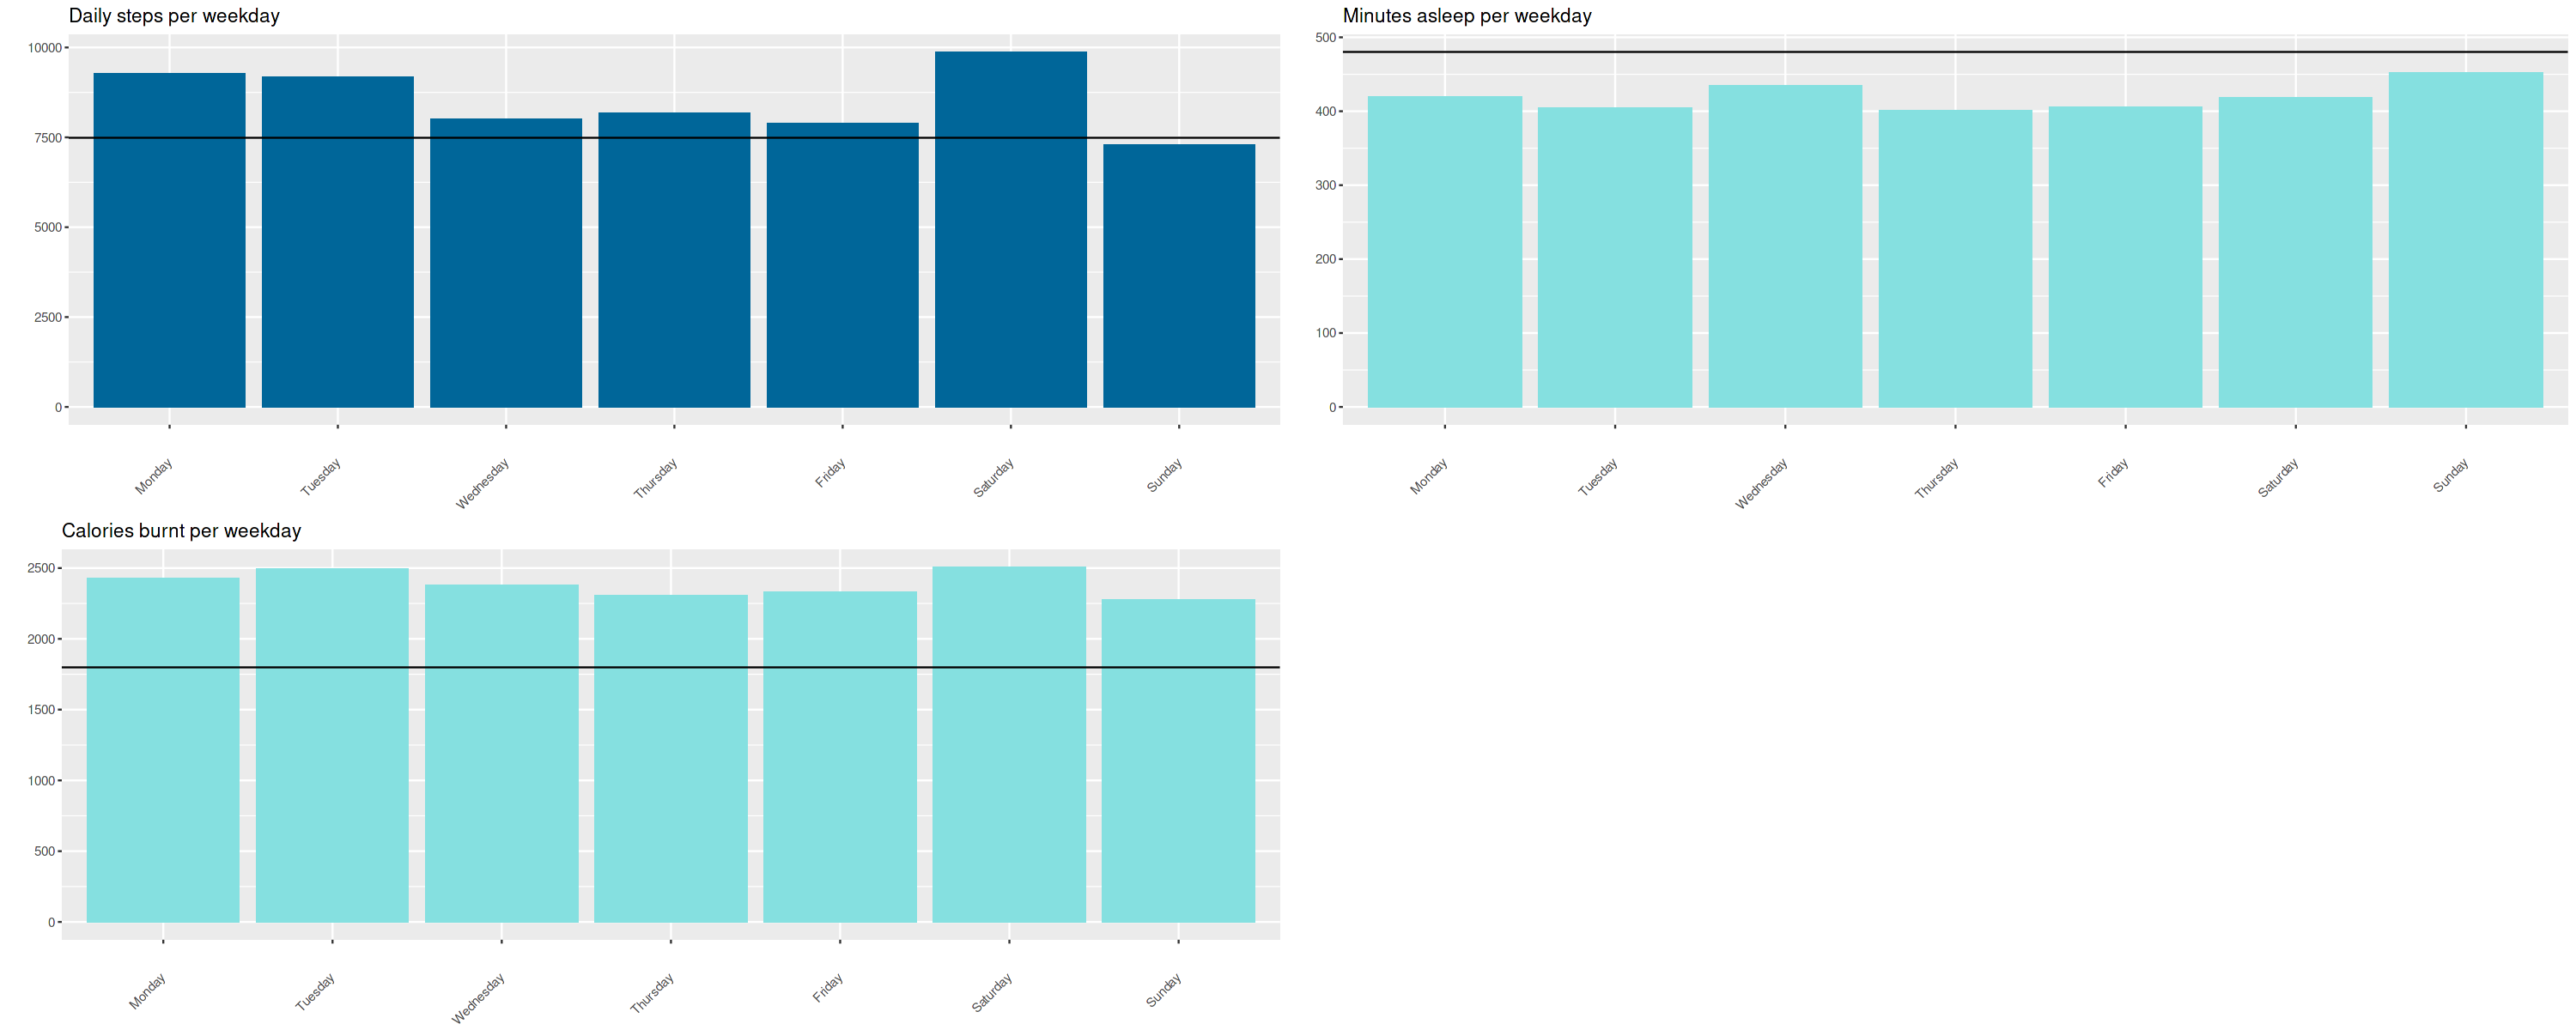

In [81]:
# library(ggpubr)

p1 <- ggplot(daily_average_by_weekday) +
      geom_col(aes(day, mean_daily_steps), fill = "#006699") +
      geom_hline(yintercept = 7500) + #recommended steps per day
      labs(title = "Daily steps per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

p2 <- ggplot(daily_average_by_weekday) +
      geom_col(aes(day, mean_daily_sleep), fill = "#85e0e0") +
      geom_hline(yintercept = 480) + # 8 hours of sleep per day
      labs(title = "Minutes asleep per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

p3 <- ggplot(daily_average_by_weekday) +
      geom_col(aes(day, mean_daily_calories), fill = "#85e0e0") +
      geom_hline(yintercept = 1800) + # min calories burnt per day
      labs(title = "Calories burnt per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

ggarrange(p1,p2,p3)

In the graphs above we can determine the following:

* Users walk daily the recommended amount of steps of 7500 besides Sunday's.

* Users don't sleep the recommended amount of minutes/ hours - 8 hours, even on Sunday which has the highest average time asleep recorded.

* Users burn more than the minimum calories (1800 calories are burnt a day doing absolutely nothing), mostly on Saturdays.

BellaBeat can use this data to provide users with appropriate health advice and tips on how to improve their sleeping time when the tracking device notices that the user is not getting enough rest they should based on their current age, gender and health condition. BellaBeat can also notify a user to go to sleep.

As you can see from the chart below:
* There is no correlation between total minutes asleep and total steps. 
* There is a positive correlation between total steps and calories burned. We can assume that the more steps walked the more calories may be burned.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



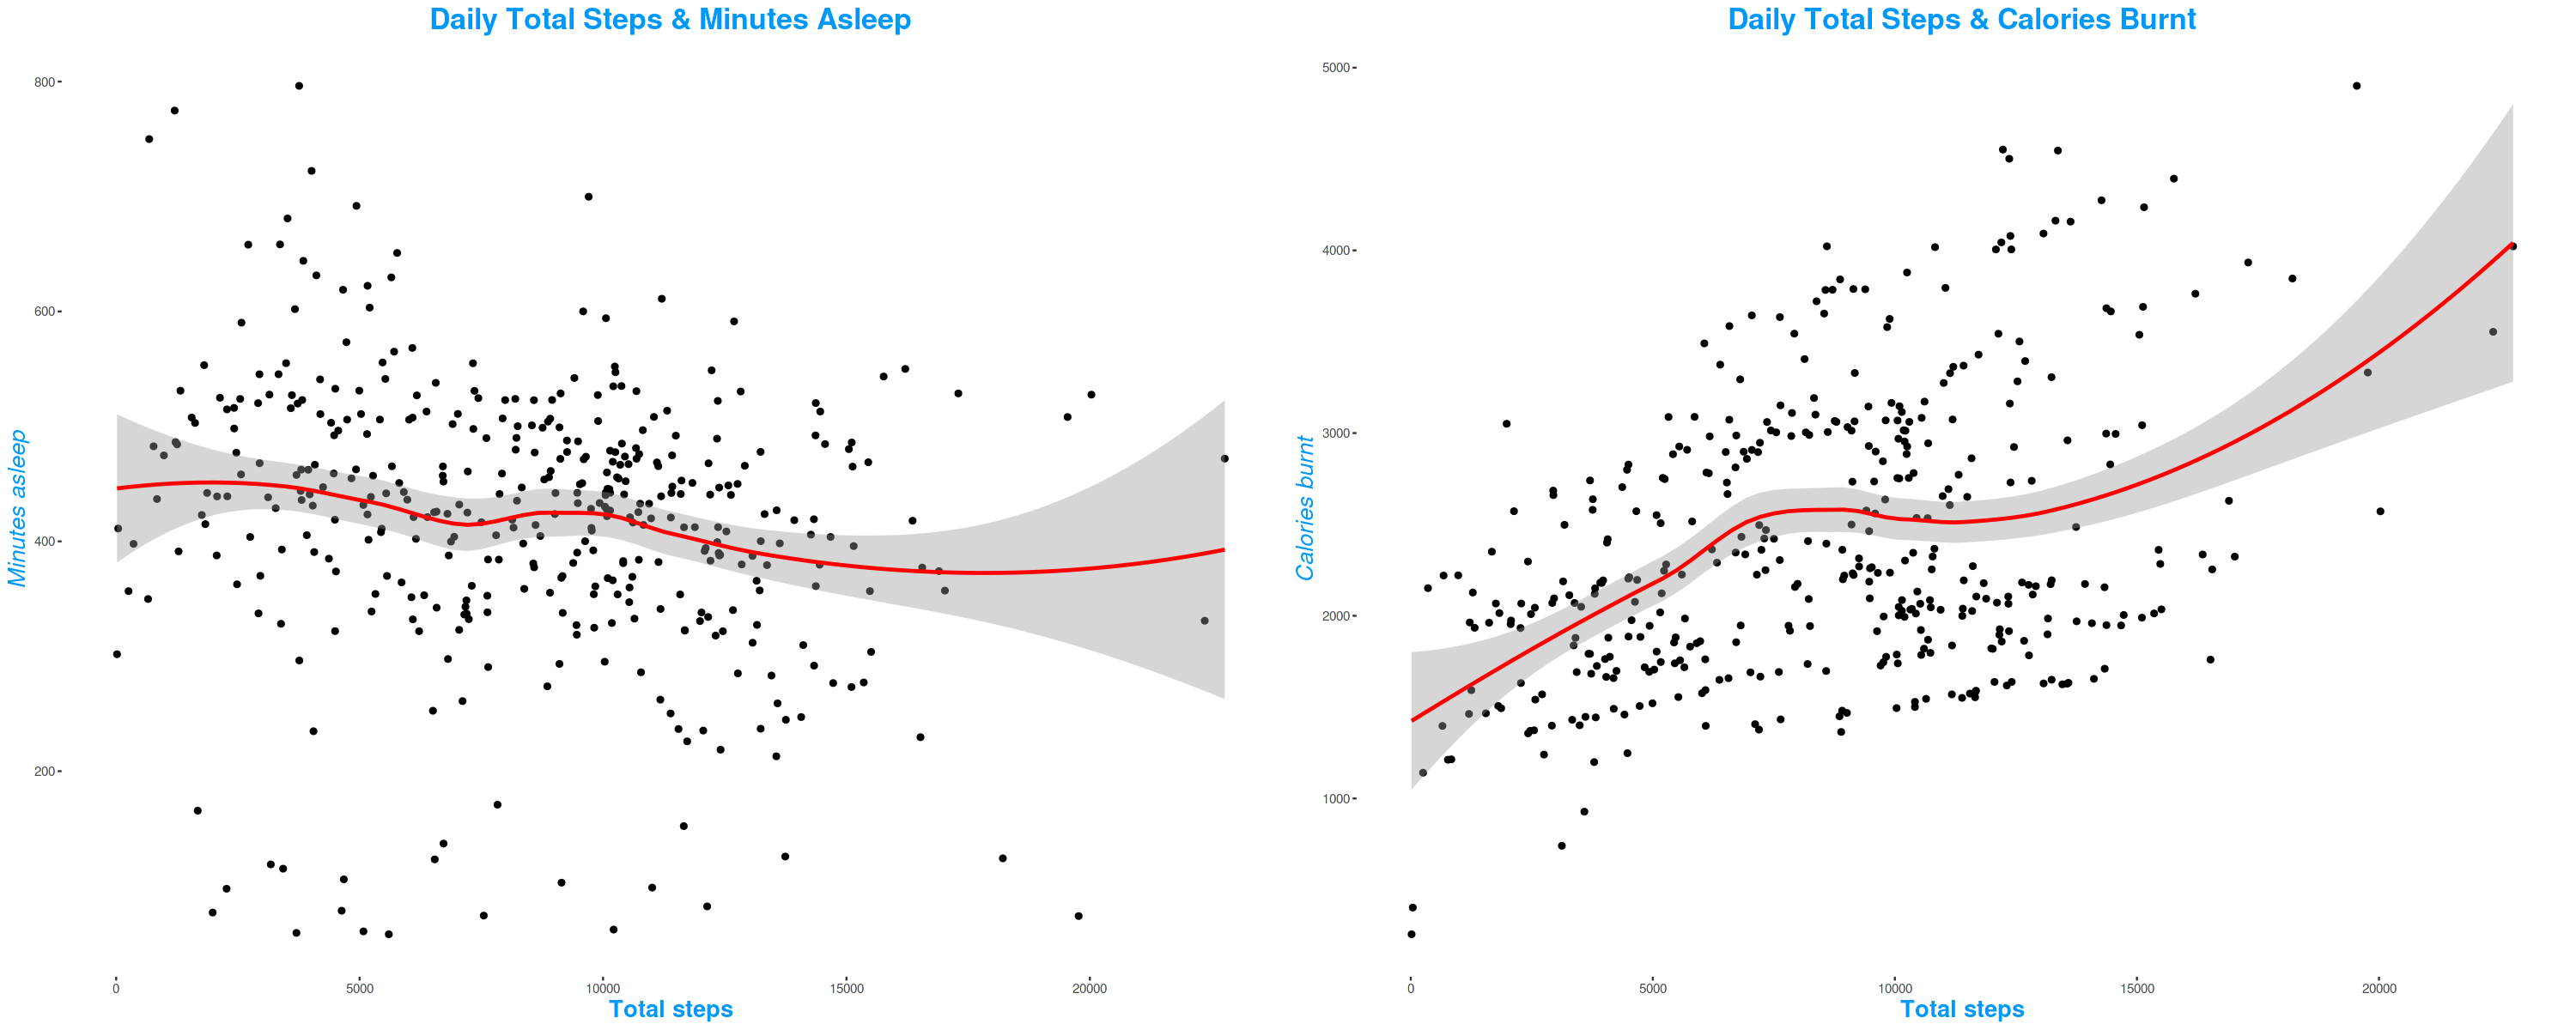

In [82]:
ggarrange(
    ggplot(all, aes(x=TotalSteps, y=TotalMinutesAsleep))+
      geom_jitter() +
      geom_smooth(color = "red") + 
      labs(title = "Daily Total Steps & Minutes Asleep", x = "Total steps", y= "Minutes asleep") +
      theme(panel.background = element_blank(),
            plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
            axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
            axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
            ),
    ggplot(all, aes(x=TotalSteps, y=Calories))+
      geom_jitter() +
      geom_smooth(color = "red") + 
      labs(title = "Daily Total Steps & Calories Burnt", x = "Total steps", y= "Calories burnt") +
      theme(panel.background = element_blank(),
            plot.title=element_text(color="#0099f9",size = 20, face = "bold", hjust = 0.5),
            axis.title.x = element_text(color = "#0099f9", size = 16, face = "bold"),
            axis.title.y = element_text(color = "#0099f9", size = 16, face = "italic")
        )
    )

## Minutes Asleep and Serentary Minutes.

*Note on Serentary Behaviour*

Sedentary behavior have also been shown to be associated with adverse health risks, even among those who reach recommended levels of physical activity.


Let's look at the relationship between Total Minutes Asleep and Serentary Minutes.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



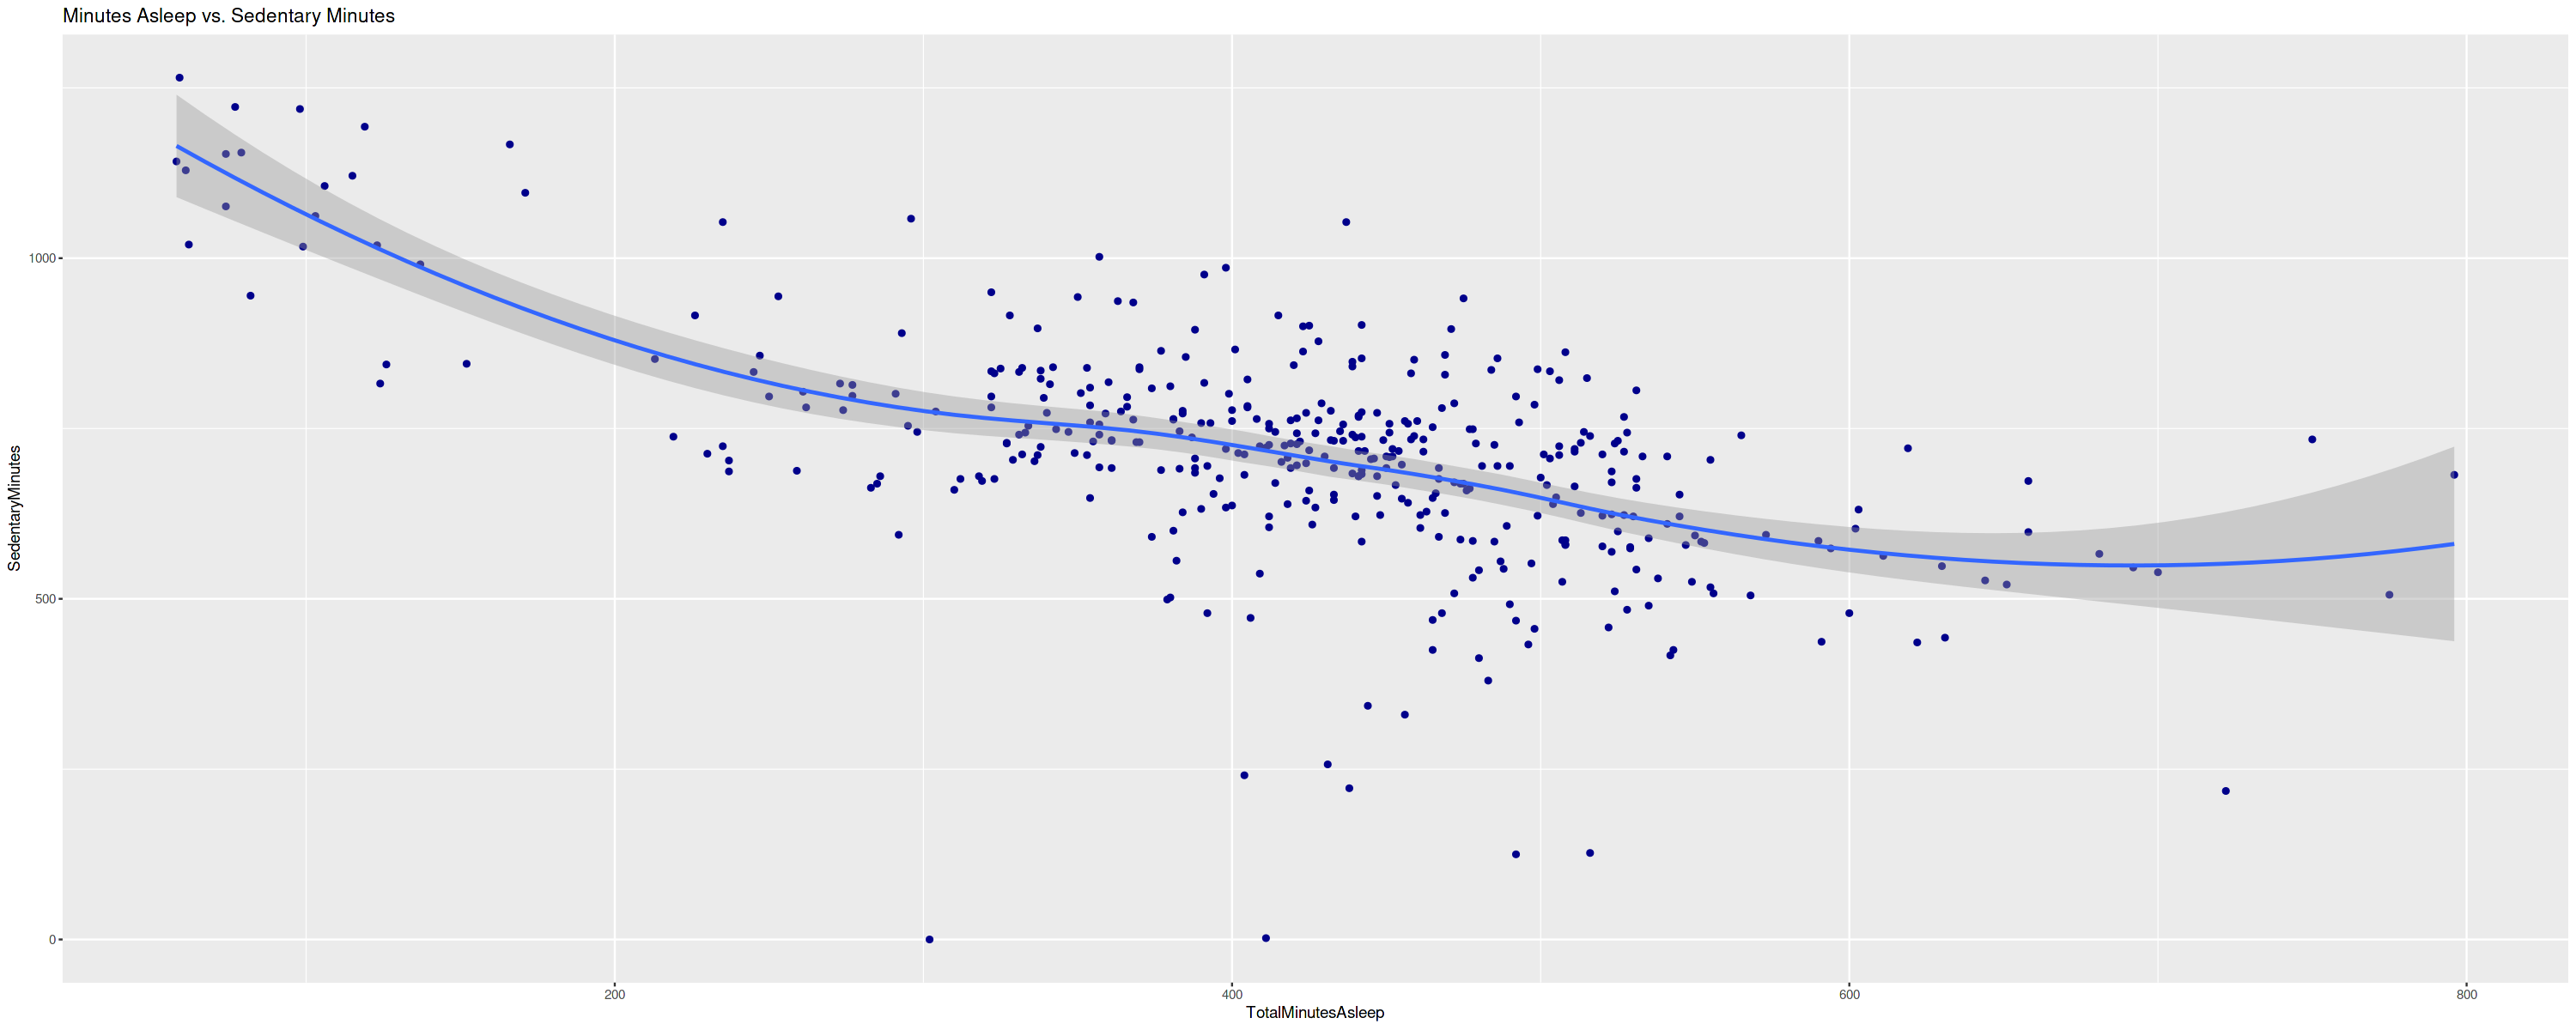

In [83]:
ggplot(data=all, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

Here we can clearly see **the negative relationship between Sedentary Minutes and Sleep time.**

As an idea: if Bellabeat users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.

*Keep in mind that we need to support this insights with more data, because correlation between some data doesn’t mean causation.*

## Active Minutes and MET

In addition to looking at the correlation between inactivtiy and sleep, identifying if a relationship between user's MET values and their acttivity can provide useful insights. 

*Note on MET*

```Activities that lead to higher muscle expenditure have a higher MET value. This metric is helpful because it provides users a way to track their workout’s intensity. This information can help people determine whether they are getting at least 150 minutes per week of moderate-intense activity, as is recommended by the American Heart Association and the UK’s National Health Service.```

In [84]:
head(daily_met)

,Id,date,day,total_mets
,<dbl>,<date>,<chr>,<dbl>
1,1503960366,2016-04-15,Friday,22190
2,1624580081,2016-04-15,Friday,16174
3,1644430081,2016-04-15,Friday,19572
4,1844505072,2016-04-15,Friday,18446
5,1927972279,2016-04-15,Friday,15508
6,2022484408,2016-04-15,Friday,24342


In [85]:
all <- merge(all, daily_met[,c('Id','date','total_mets')], by =c('Id','date'))
head(all)

,Id,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,⋯,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,total_mets
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,⋯,25,13,328,728,1985,Tuesday,1,327,346,25241
2,1503960366,2016-04-13,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,⋯,21,19,217,776,1797,Wednesday,2,384,407,22859
3,1503960366,2016-04-15,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,⋯,29,34,209,726,1745,Friday,1,412,442,22190
4,1503960366,2016-04-16,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,⋯,36,10,221,773,1863,Saturday,2,340,367,23694
5,1503960366,2016-04-17,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,⋯,38,20,164,539,1728,Sunday,1,700,712,21972
6,1503960366,2016-04-19,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,⋯,50,31,264,775,2035,Tuesday,1,304,320,25883


Is there a correlation between METs and active minutes?

Firstly lets examine the correlation between METs and Very Active Minutes.

`geom_smooth()` using formula 'y ~ x'



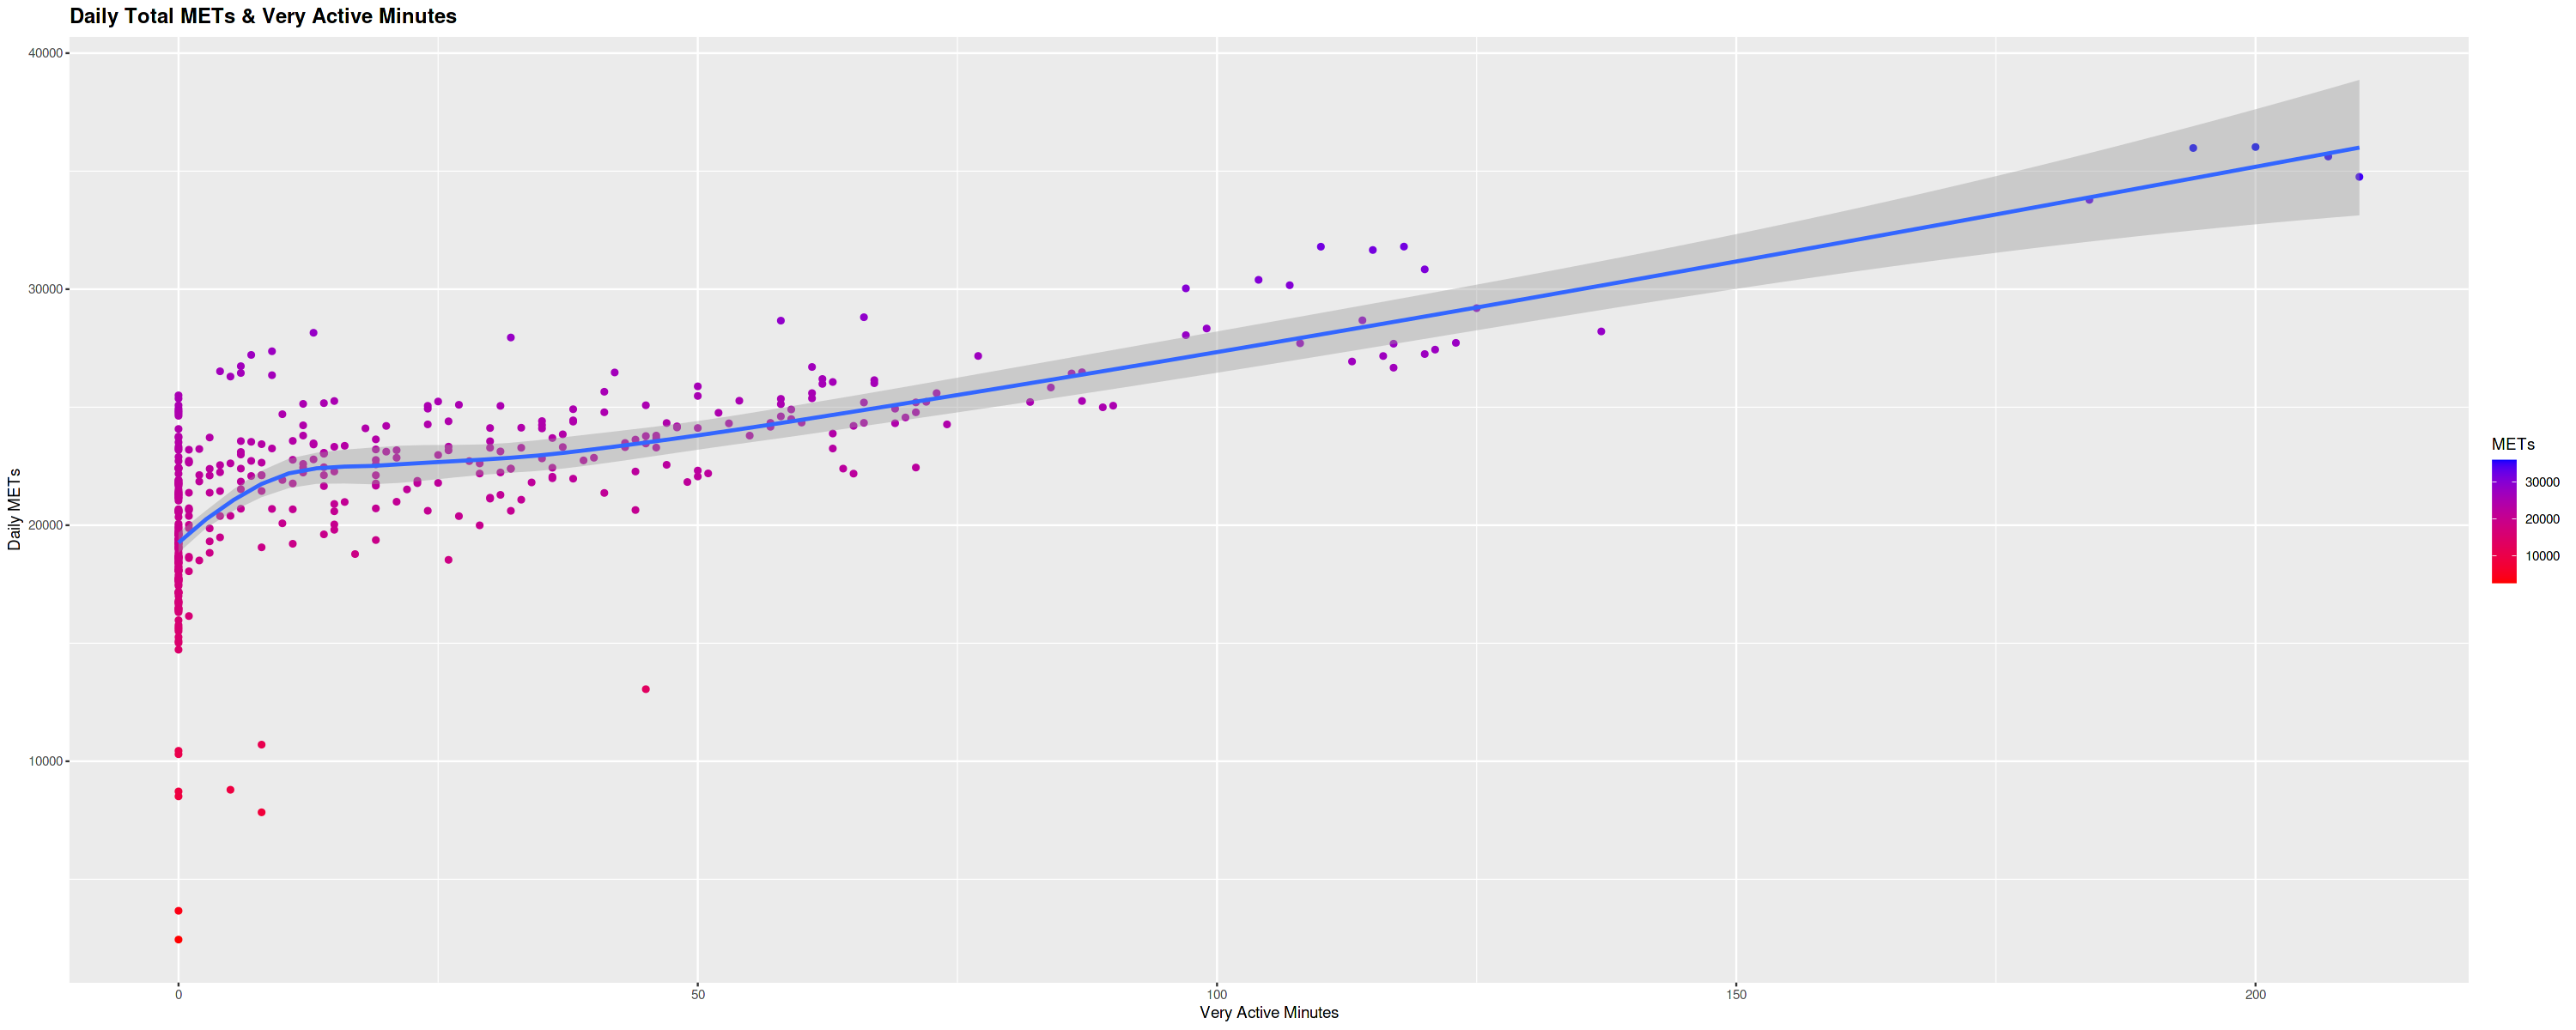

In [86]:
ggplot(data = all, aes(
    x = VeryActiveMinutes,
    y = total_mets, 
    color = total_mets)) +
  geom_point() +
  scale_color_gradient(low="red", high="blue") + 
  geom_smooth(method = 'loess') +
  labs(title= 'Daily Total METs & Very Active Minutes',
       x = 'Very Active Minutes', 
       y = 'Daily METs', 
       color = 'METs') +
  theme(plot.title = element_text(size = 14, face = "bold"))

The data indicates a **positive correlation between average ‘very active’ minutes and METs for users**. Fitbit uses active minutes, earned through 10 minutes or more of continuous moderate-to-intense activity, to track activity level. As shown on the plot above, users with more than 50 ‘very active’ minutes had the highest MET values.

Next, lets do some feature engineering by adding two columns for total time spent while being physically active and total distance traveled while being active.

In [87]:
head(daily_met)

,Id,date,day,total_mets
,<dbl>,<date>,<chr>,<dbl>
1,1503960366,2016-04-15,Friday,22190
2,1624580081,2016-04-15,Friday,16174
3,1644430081,2016-04-15,Friday,19572
4,1844505072,2016-04-15,Friday,18446
5,1927972279,2016-04-15,Friday,15508
6,2022484408,2016-04-15,Friday,24342


In [88]:
all <- all %>%
  mutate("total_active_minutes"= all$VeryActiveMinutes + all$FairlyActiveMinutes + all$LightlyActiveMinutes,
         "total_active_distance_km"= all$VeryActiveDistance + all$ModeratelyActiveDistance + all$LightActiveDistance)

Now lets check the coefficient of correlation of `total_active_minutes`, `total_active_distance_km` and `calories` burnt per day with `METs` per day.

In [89]:
# library(ggpubr)

cor(all$total_active_minutes,
    all$total_mets,
    method=c("pearson", "kendall", "spearman"))
cor(all$TotalDistance,
    all$total_mets,
    method = c("pearson", "kendall", "spearman"))
cor(all$Calories, 
    all$total_mets,
    method=c("pearson", "kendall", "spearman"))

[1] 0.7716651

[1] 0.7745273

[1] 0.6859886

There is a strong correlation(0.7-1.0) of all the three factors with 'METs_per_day'. It shows that simply **being more active will lead to a higher value of METs.**

## Calories and METs

Now, we'll categorize the users by the number of METs burnt for better visualizations.

In [90]:
all <- all %>%
  mutate("met_range" = case_when(
    total_mets > 0 & total_mets <= 5000 ~ "0 - 5k",
    total_mets > 5000 & total_mets <= 10000 ~ "5k - 10k",
    total_mets > 10000 & total_mets <= 15000 ~ "10k - 15k",
    total_mets > 15000 & total_mets <= 20000 ~ "15k - 20k",
    total_mets > 20000 & total_mets <= 25000 ~ "20k - 25k",
    total_mets > 25000 & total_mets <= 30000 ~ "25k - 30k",
    total_mets > 30000 & total_mets <= 35000 ~ "30k - 35k",
    TRUE ~ "35k - 40k"))

all$met_range <- factor(all$met_range,
                        levels = c("0 - 5k", "5k - 10k", "10k - 15k",
                                  "15k - 20k", "20k - 25k",
                                  "25k - 30k", "30k - 35k", "35k - 40k"))

Lets plot the graph of Daily `Calories` vs `Total Mets`.



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



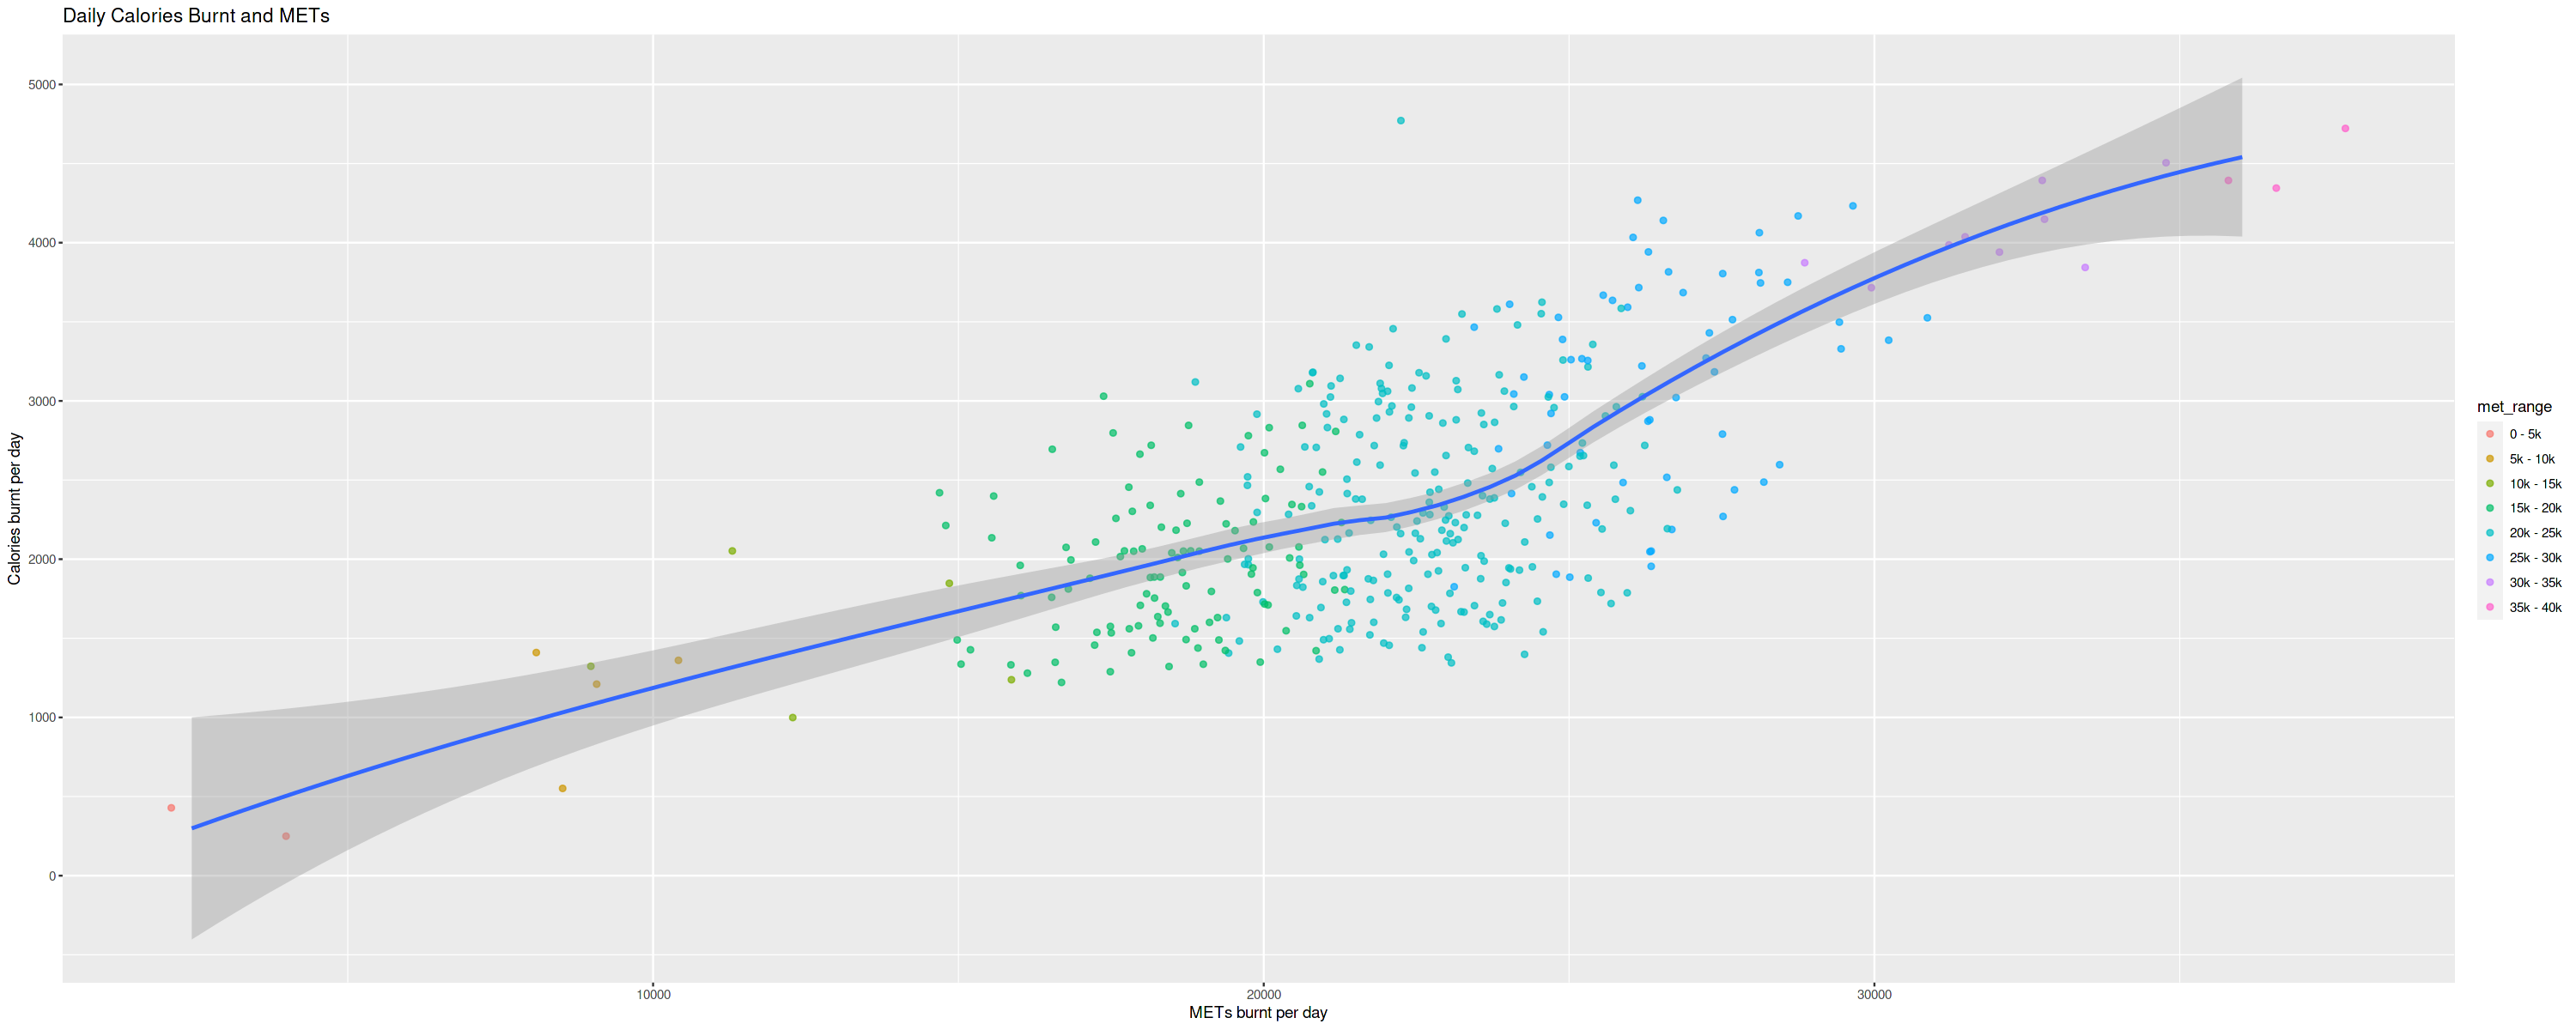

In [91]:
ggplot(all, aes(x=total_mets, y=Calories))+
  geom_point(alpha=0.7, position = position_jitter(h=200, w=2000), 
             mapping = aes(color=met_range))+
  labs(title="Daily Calories Burnt and METs",
       x="METs burnt per day", y="Calories burnt per day")+
    geom_smooth()

Now that it is confirmed that there is a strong relation between daily METs and calories burnt we can continue with other fitness attributes.

## Steps and METs

Another interesting trend was observed when evaluating the relationship between average daily steps and METs. Tracking steps can be beneficial for everyone, particularly for those who are more comfortable engaging in low to moderate physical activities like walking.

`geom_smooth()` using formula 'y ~ x'



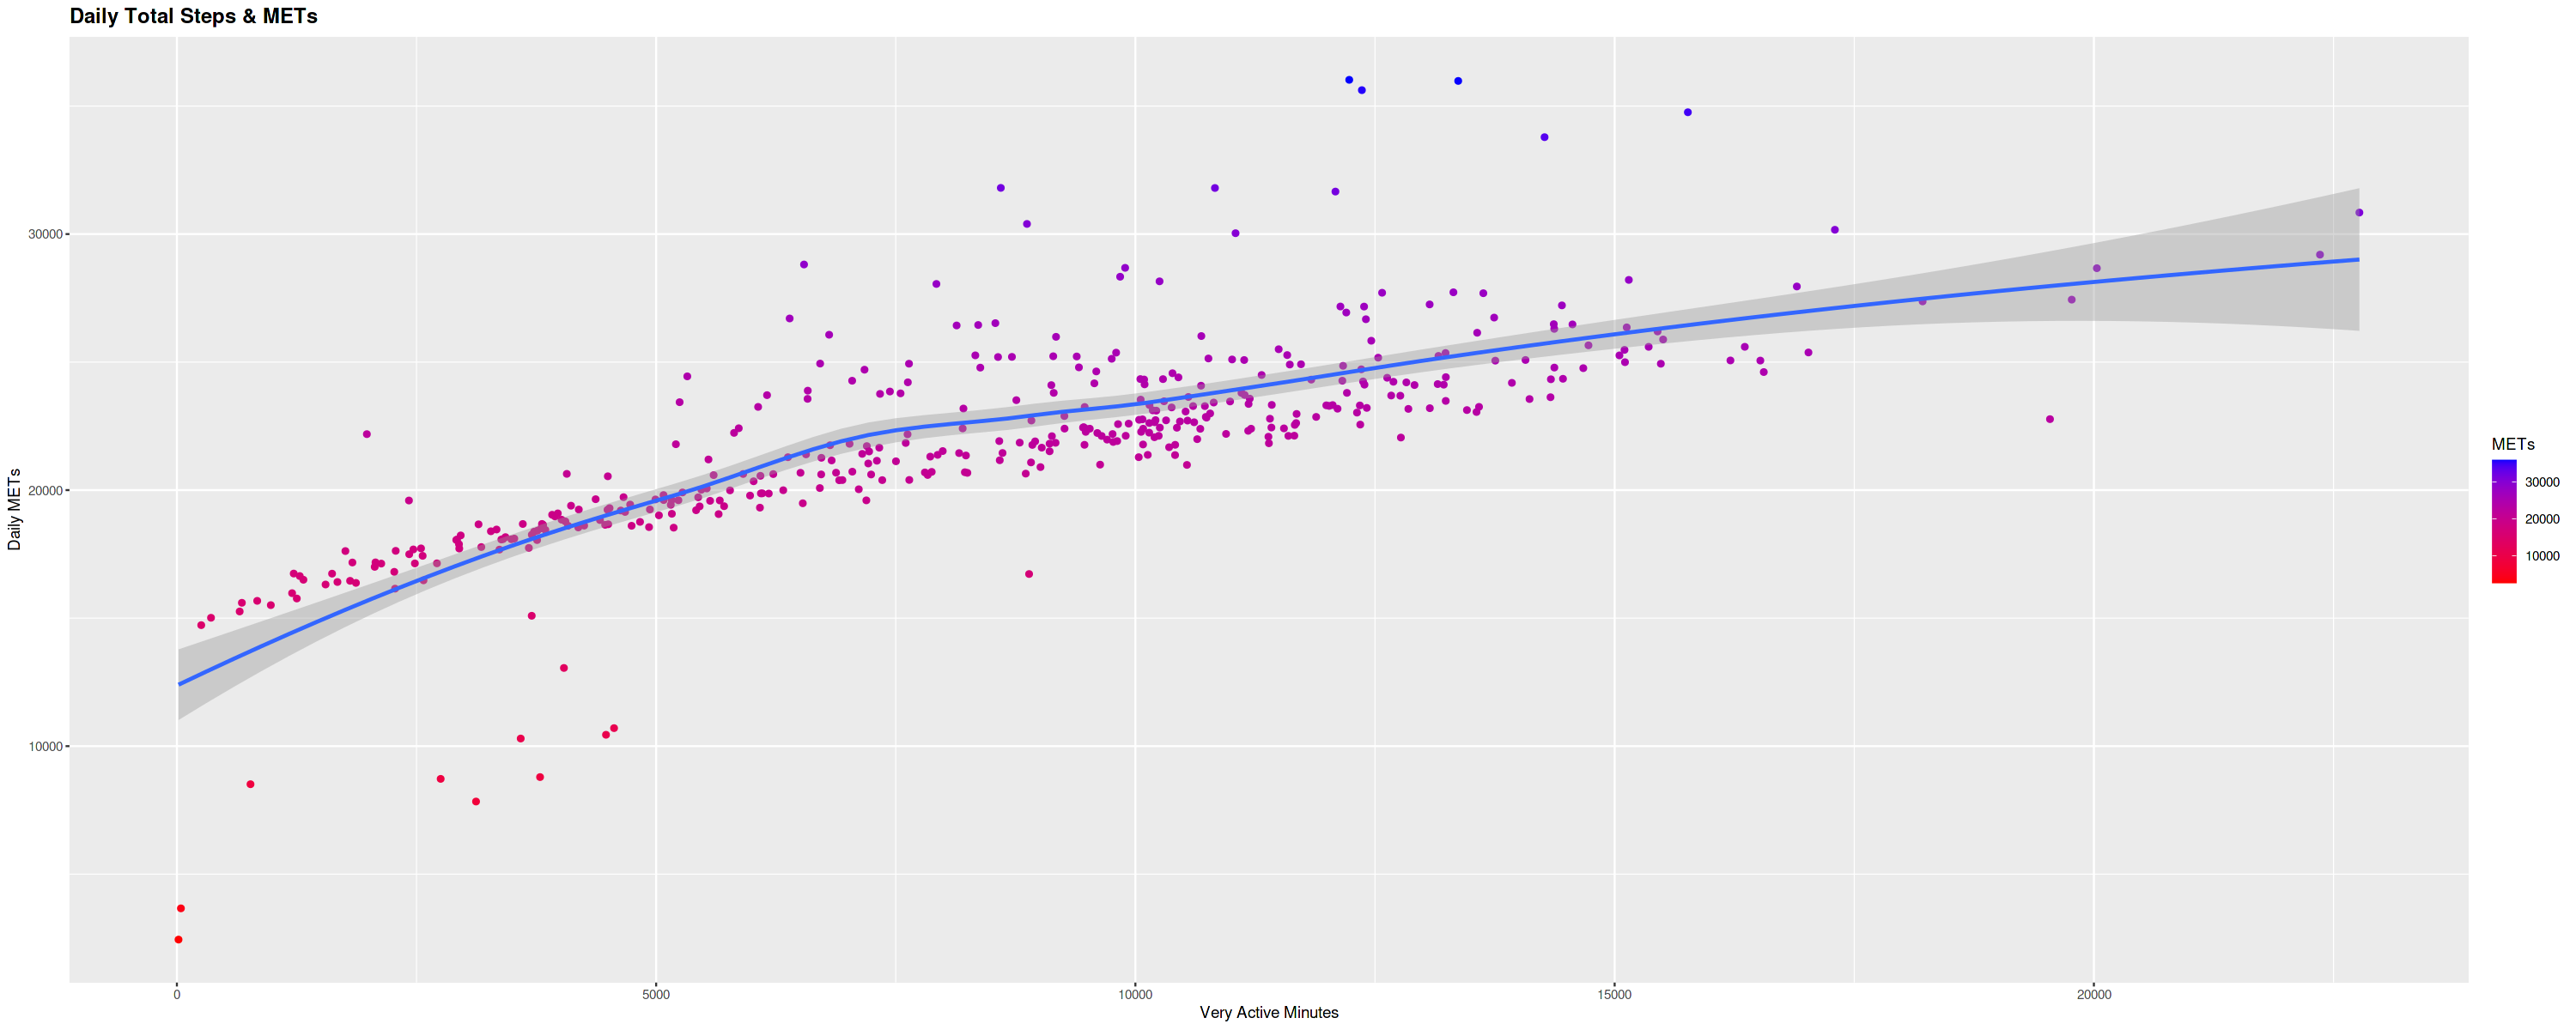

In [92]:
ggplot(data = all, aes(
    x = TotalSteps,
    y = total_mets, 
    color = total_mets)) +
  geom_point() +
  scale_color_gradient(low="red", high="blue") + 
  geom_smooth(method = 'loess') +
  labs(title= 'Daily Total Steps & METs',
       x = 'Very Active Minutes', 
       y = 'Daily METs', 
       color = 'METs') +
  theme(plot.title = element_text(size = 14, face = "bold"))

**A positive correlation exists between users’ average daily steps and their MET values.**

Fitness enthusiasts can focus on tracking their METs and choose to engage in more intense workouts. As well as those who want to simplify their fitness routine; they can review metrics like daily steps.

Now that it is confirmed that there is a strong relation between daily METs and calories burnt we can continue with other fitness attributes.

Lets now check whether the users who had comparatively longer intense sessions burnt more calories than others.

## Intensity and Calories

First, lets create a new feature which is the sum of `very active minutes` and `fairly active minutes`. This is an indicator of how long a user has intense workout or an intense activity session.

In [93]:
all <- all %>% mutate("highly_intense_minutes"=(VeryActiveMinutes+FairlyActiveMinutes))
all$highly_intense_minutes[is.na(all$highly_intense_minutes)]<-0

Now, let's categorize the time of highly intense workout in hours.



In [94]:
all <- all %>%
  mutate("highly_intense_hours_grouped" = case_when(
    highly_intense_minutes >= 0 & highly_intense_minutes < 60 ~ "0-1",
    highly_intense_minutes >= 60 & highly_intense_minutes < 120 ~ "1-2",
    highly_intense_minutes >= 120 & highly_intense_minutes < 180 ~ "2-3",
    highly_intense_minutes >= 180 & highly_intense_minutes < 240 ~ "3-4",
    highly_intense_minutes >= 240 ~ "4 or above"))

Now, lets categorize the total amount of time spent in any activity (from light to very high) in hours.

In [95]:
all <- all %>%
  mutate("total_active_hours" = case_when(
    total_active_minutes > 0 & total_active_minutes <= 180 ~ "0-3",
    total_active_minutes > 180 & total_active_minutes <= 360 ~ "3-6",
    total_active_minutes > 360 & total_active_minutes <= 540 ~ "6-9",
    total_active_minutes > 540 ~ "more than 9"))

all$total_active_hours[is.na(all$total_active_hours)]<-0

Lets check how the correlation of total active minutes and highly intense minutes with Calories.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



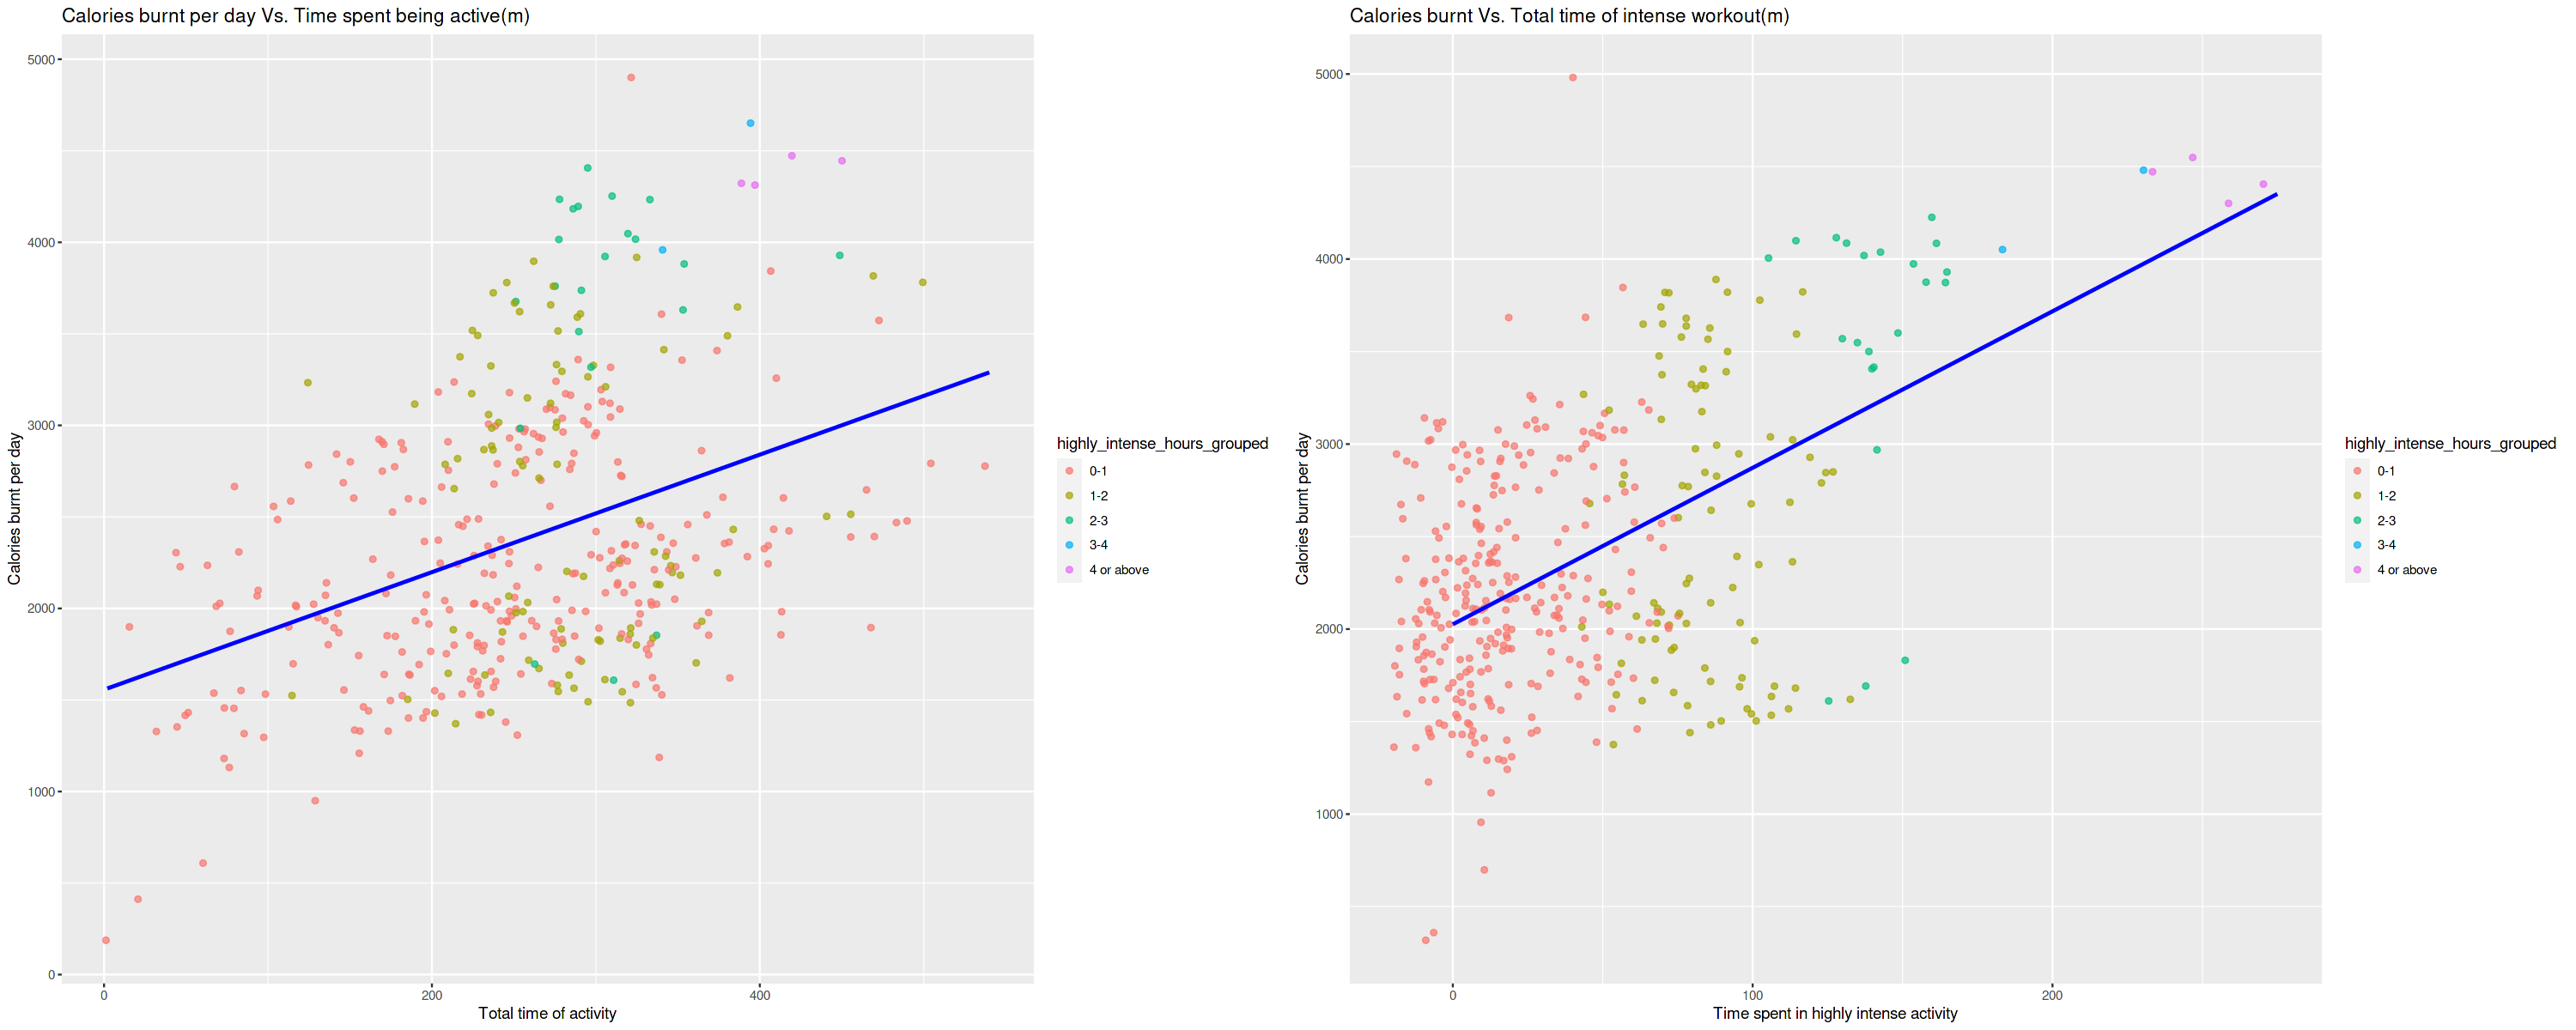

In [96]:
ggarrange(
    ggplot(all, aes(x=total_active_minutes, y=Calories))+
      geom_point(alpha=0.7, position = position_jitter(h=200, w=20), 
                 mapping = aes(color=highly_intense_hours_grouped))+
      labs(title="Calories burnt per day Vs. Time spent being active(m)",
           x="Total time of activity", y="Calories burnt per day")+
      geom_smooth(method = "lm", colour = "blue", se = FALSE),

    ggplot(all, aes(x=highly_intense_minutes, y=Calories))+
      geom_point(alpha=0.7, position = position_jitter(h=100, w=20), 
                 mapping = aes(color=highly_intense_hours_grouped))+
        labs(title="Calories burnt Vs. Total time of intense workout(m)",
           x="Time spent in highly intense activity", y="Calories burnt per day")+
      geom_smooth(method = "lm", colour = "blue", se = FALSE)
)

In [97]:
lm(Calories ~ highly_intense_minutes, data = all)

lm(Calories ~ total_active_minutes, data = all)

print("Corr of Highly intense minutes & Calories burnt:")
cor(all$highly_intense_minutes,
    all$Calories,
    method=c("pearson", "kendall", "spearman"))

print("Corr of Active Minutes & Calories burnt:")
cor(all$total_active_minutes,
    all$Calories,
    method=c("pearson", "kendall", "spearman"))

print("Corr of Highly Intense Minutes & METs burnt:")
cor(all$highly_intense_minutes,
    all$total_mets,
    method=c("pearson", "kendall", "spearman"))

print("Corr of Active Minutes minutes & METs burnt:")
cor(all$total_active_minutes,
    all$total_mets,
    method=c("pearson", "kendall", "spearman"))


Call:
lm(formula = Calories ~ highly_intense_minutes, data = all)

Coefficients:
           (Intercept)  highly_intense_minutes  
              2025.837                   8.458  



Call:
lm(formula = Calories ~ total_active_minutes, data = all)

Coefficients:
         (Intercept)  total_active_minutes  
            1556.541                 3.209  


[1] "Corr of Highly intense minutes & Calories burnt:"


[1] 0.5393257

[1] "Corr of Active Minutes & Calories burnt:"


[1] 0.3899832

[1] "Corr of Highly Intense Minutes & METs burnt:"


[1] 0.7361663

[1] "Corr of Active Minutes minutes & METs burnt:"


[1] 0.7716651

**There is a greater correlation between number of minutes spent doing a higher intense workout and calories burnt** compared to number of total time spent in any activity and calories burnt (0.53 vs 0.38), even though the correlation is not very significant.

Also, the slope of the regression line is significantly steeper(8.458 compared to 3.209) in the graph between highly intense minutes and calories. This proves that **the total time spent doing a physical activity does not greatly impact the number of calories burnt as much as the amount of time consists of higher intensity exercises during such activity**.

Also, the opposite is true with respect to METs as METs only depend on the type of activity and not on any other factor.

Now, that we have our insights, lets join this data with the sleep data and analyze.
The next question we want to answer is: Do users who have comparatively longer sleeping time burn more calories than others?

## Sleep and Calories

Firstly lets categorize the amount of sleep as sleep type. 6-8 hours of sleep is considered medically normal as far as the quantity aspect of sleep is concerned.

In [98]:
all <- all %>%
  mutate("sleep_type" = case_when(
    TotalMinutesAsleep >= 0 & TotalMinutesAsleep < 360 ~ "Insufficient",
    TotalMinutesAsleep >= 360 & TotalMinutesAsleep < 480 ~ "Sufficient",
    TotalMinutesAsleep >= 480 ~ "Oversleep"))

As a very approximate number, we burn around 50 calories an hour while we sleep. However, every person burns a different amount of calories during sleep, depending on their personal basal metabolic rate (BMR).

Lets check if the amount of sleep is correlated with calories burnt.

[1] -0.03169899

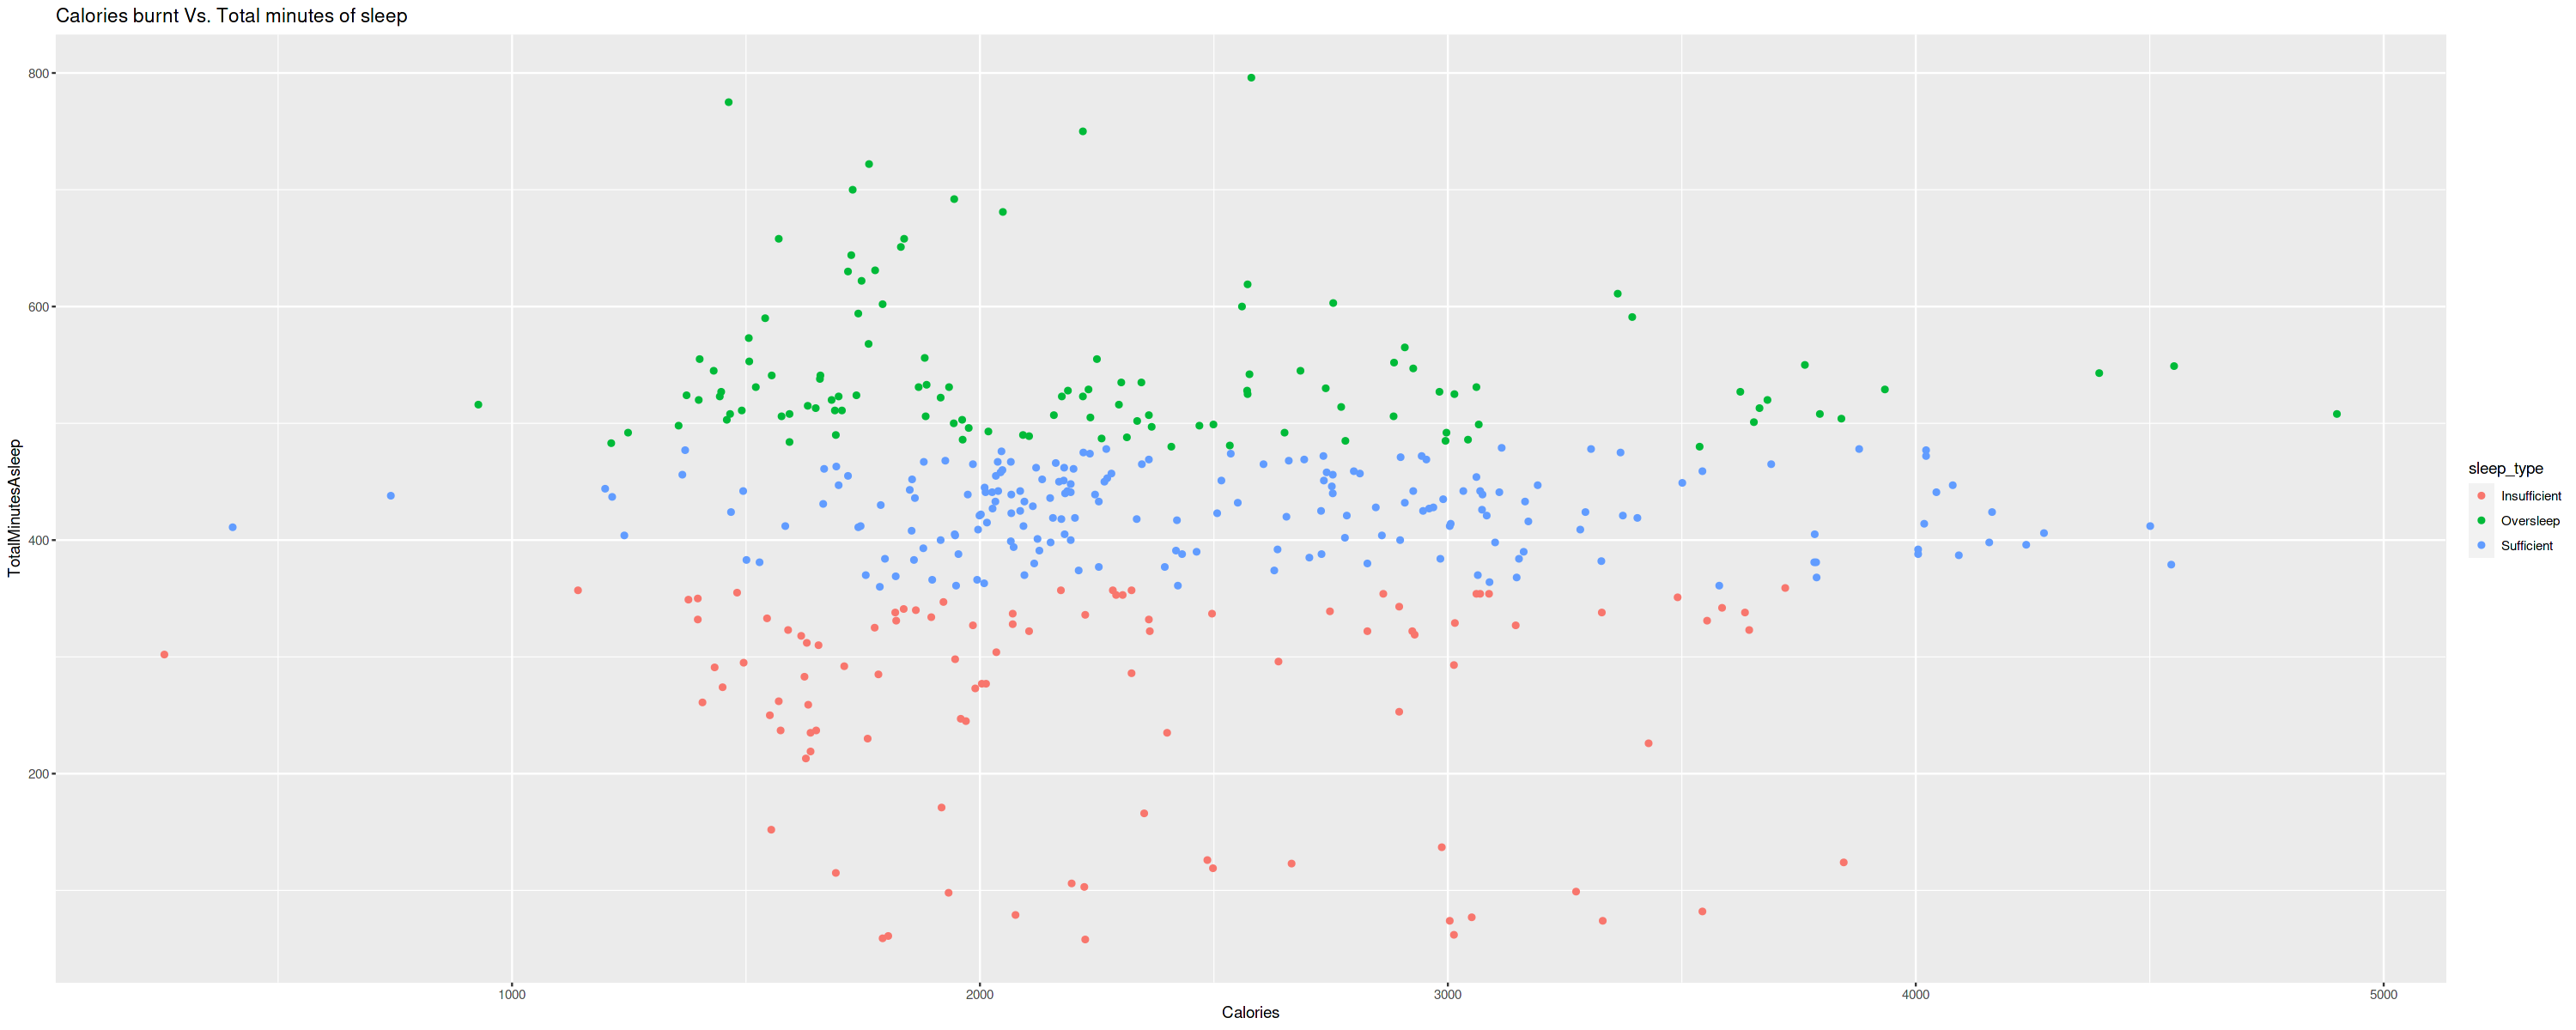

In [99]:
cor(all$TotalMinutesAsleep, all$Calories)

ggplot(all, aes(x=Calories, y=TotalMinutesAsleep))+
  geom_point(aes(color=sleep_type))+
  labs(title="Calories burnt Vs. Total minutes of sleep")

**There is no clear relationship with amount of sleep and calories burnt.**

## All Correlations

Now, for the final analysis on the topic of correlation, lets check correlation of all the significant data fields in our data sets.

In [100]:
correlation <- all%>%
  select(TotalMinutesAsleep, TotalTimeInBed, TotalSteps, TotalDistance, total_mets, SedentaryMinutes,
         Calories, total_active_minutes, total_active_distance_km, highly_intense_minutes)

In [101]:
c <- cor(correlation)
c

,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,total_mets,SedentaryMinutes,Calories,total_active_minutes,total_active_distance_km,highly_intense_minutes
TotalMinutesAsleep,1.00000000,0.9304224,-0.1903439,-0.1769363,-0.12710918,-0.60107314,-0.03169899,-0.06929398,-0.1774400,-0.1815268
TotalTimeInBed,0.93042239,1.0000000,-0.1662319,-0.1611772,-0.14916376,-0.62028044,-0.13480458,-0.09794100,-0.1613608,-0.1351131
TotalSteps,-0.19034392,-0.1662319,1.0000000,0.9817539,0.76593225,-0.13003596,0.40630068,0.74464847,0.9744984,0.6708196
TotalDistance,-0.17693625,-0.1611772,0.9817539,1.0000000,0.77452733,-0.12666671,0.52121615,0.72238390,0.9909117,0.6870815
total_mets,-0.12710918,-0.1491638,0.7659322,0.7745273,1.00000000,0.05281719,0.68598864,0.77166506,0.7821487,0.7361663
SedentaryMinutes,-0.60107314,-0.6202804,-0.1300360,-0.1266667,0.05281719,1.00000000,0.09865571,-0.26268923,-0.1286818,-0.0313305
Calories,-0.03169899,-0.1348046,0.4063007,0.5212162,0.68598864,0.09865571,1.00000000,0.38998319,0.5050403,0.5393257
total_active_minutes,-0.06929398,-0.0979410,0.7446485,0.7223839,0.77166506,-0.26268923,0.38998319,1.00000000,0.7279605,0.3720481
total_active_distance_km,-0.17743996,-0.1613608,0.9744984,0.9909117,0.78214873,-0.12868175,0.50504034,0.72796054,1.0000000,0.6956212
highly_intense_minutes,-0.18152681,-0.1351131,0.6708196,0.6870815,0.73616629,-0.03133050,0.53932571,0.37204810,0.6956212,1.0000000


We can run a significance test which produces p-values and confidence intervals for each pair of input features.

In [102]:
# library(corrplot)

cor.mtest(correlation)

0.000000e+00,5.812502e-180,1.053558e-04,3.179815e-04,9.984521e-03,1.252194e-41,5.221356e-01,1.613647e-01,3.054809e-04,2.197479e-04
5.812502e-180,0.000000e+00,7.269599e-04,1.056379e-03,2.461192e-03,5.873845e-45,6.261953e-03,4.749420e-02,1.042332e-03,6.142907e-03
1.053558e-04,7.269599e-04,0.000000e+00,3.028215e-296,2.752946e-80,8.384263e-03,9.949954e-18,1.225212e-73,6.611831e-267,6.347580e-55
3.179815e-04,1.056379e-03,3.028215e-296,0.000000e+00,3.553276e-83,1.024870e-02,6.193502e-30,2.343306e-67,0.000000e+00,1.451738e-58
9.984521e-03,2.461192e-03,2.752946e-80,3.553276e-83,0.000000e+00,2.859961e-01,2.594437e-58,3.363667e-82,7.578959e-86,3.601518e-71
1.252194e-41,5.873845e-45,8.384263e-03,1.024870e-02,2.859961e-01,0.000000e+00,4.589046e-02,6.742556e-08,9.093863e-03,5.269866e-01
5.221356e-01,6.261953e-03,9.949954e-18,6.193502e-30,2.594437e-58,4.589046e-02,0.000000e+00,2.416883e-16,6.339249e-28,2.568885e-32
1.613647e-01,4.749420e-02,1.225212e-73,2.343306e-67,3.363667e-82,6.742556e-08,2.416883e-16,0.000000e+00,7.163236e-69,6.602521e-15
3.054809e-04,1.042332e-03,6.611831e-267,0.000000e+00,7.578959e-86,9.093863e-03,6.339249e-28,7.163236e-69,0.000000e+00,1.420587e-60
2.197479e-04,6.142907e-03,6.347580e-55,1.451738e-58,3.601518e-71,5.269866e-01,2.568885e-32,6.602521e-15,1.420587e-60,0.000000e+00
1.0000000,0.9161262,-0.2819929,-0.2691711,-0.22123306,-0.659527804,-0.128152870,-0.1650338,-0.2696534,-0.2735647


Matrix of the p-value of the correlation:


In [103]:
#source code: https://www.kaggle.com/bhattsiddharth/google-capstone-2
cor.mtest <- function(mat,...) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
p.mat <- cor.mtest(correlation)
head(p.mat)


,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,total_mets,SedentaryMinutes,Calories,total_active_minutes,total_active_distance_km,highly_intense_minutes
TotalMinutesAsleep,0.000000e+00,5.812502e-180,1.053558e-04,3.179815e-04,9.984521e-03,1.252194e-41,5.221356e-01,1.613647e-01,3.054809e-04,2.197479e-04
TotalTimeInBed,5.812502e-180,0.000000e+00,7.269599e-04,1.056379e-03,2.461192e-03,5.873845e-45,6.261953e-03,4.749420e-02,1.042332e-03,6.142907e-03
TotalSteps,1.053558e-04,7.269599e-04,0.000000e+00,3.028215e-296,2.752946e-80,8.384263e-03,9.949954e-18,1.225212e-73,6.611831e-267,6.347580e-55
TotalDistance,3.179815e-04,1.056379e-03,3.028215e-296,0.000000e+00,3.553276e-83,1.024870e-02,6.193502e-30,2.343306e-67,0.000000e+00,1.451738e-58
total_mets,9.984521e-03,2.461192e-03,2.752946e-80,3.553276e-83,0.000000e+00,2.859961e-01,2.594437e-58,3.363667e-82,7.578959e-86,3.601518e-71
SedentaryMinutes,1.252194e-41,5.873845e-45,8.384263e-03,1.024870e-02,2.859961e-01,0.000000e+00,4.589046e-02,6.742556e-08,9.093863e-03,5.269866e-01


Lets try to visualize this table to make it easier to read.

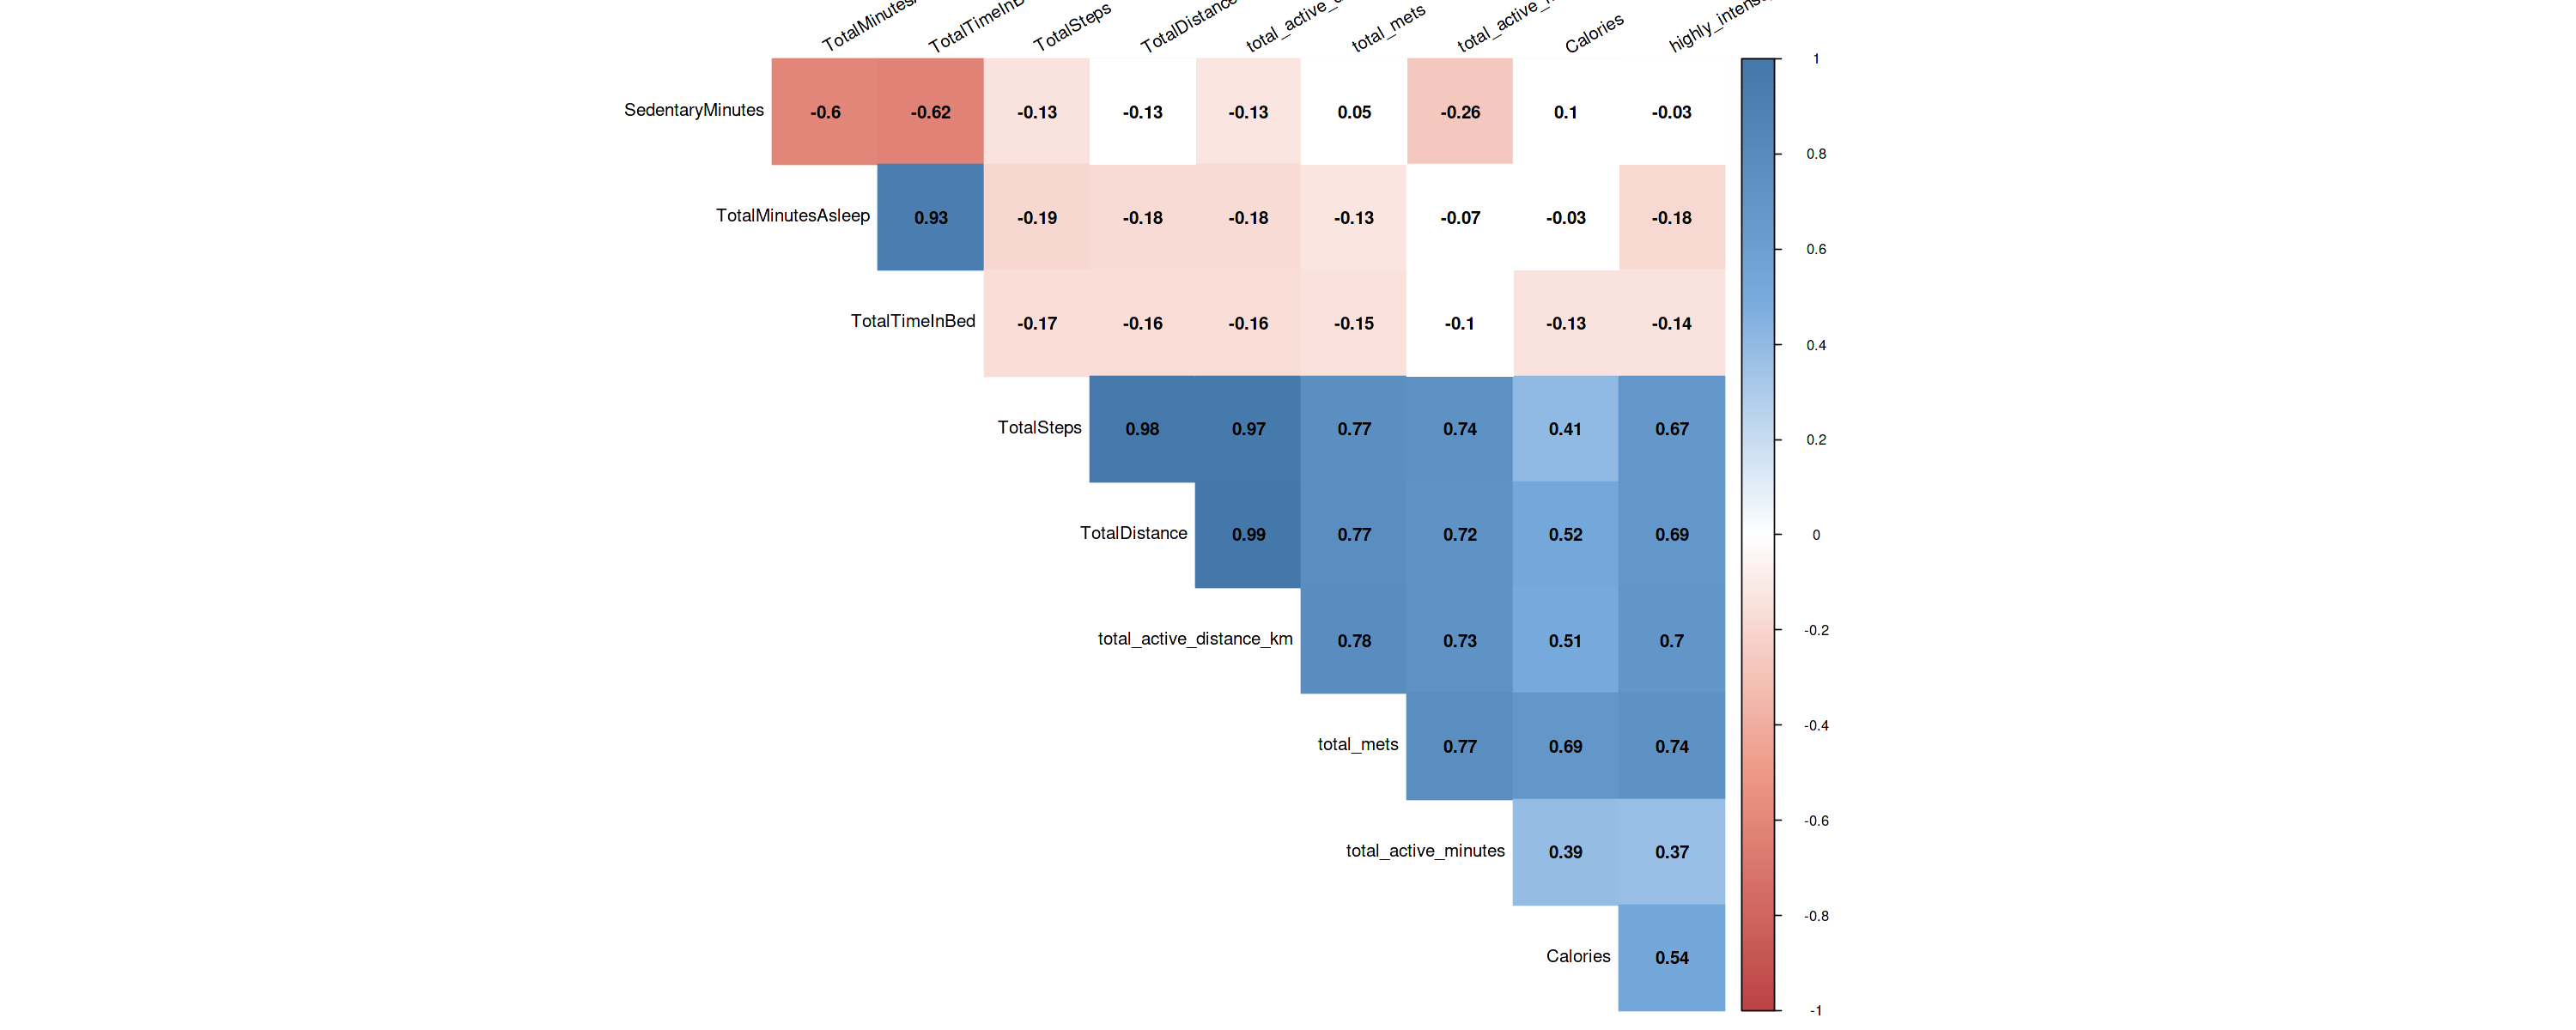

In [104]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(c, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=30, #Text label color and rotation
         # Combine with significance
         p.mat = p.mat, sig.level = 0.01, insig = "blank", 
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )


Here, the key findings can be observed from the above correlation plot:

* The number of METs burnt per day by the users has strong correlation with total amount of active time (from lightly intense to heavily intense), calories burnt and total amount of time spent in only highly intense activities(light intense to very intense).

* When it comes to highly intense activity, number of METs burnt show a stronger correlation than number of Calories burnt, the same is also true for the overall active time.

* The difference between METs burnt while being at rest and vigorously active is comparatively less to that of calories as calories take account of other factors such as weight.

## Trend in Daily Usage

Is there any trend in daily usage?

We can answer this by examining how users spent their steps at a day level. 

This calendar-based map illustrates the average steps taken per user by each day in the given period. Through the heatmap, we can easily look over the frequency of steps by each day and users' daily rhythms may reveal.

In [105]:
# source code : https://www.kaggle.com/mimosabella/fitness-tracker-a-usage-trends-analysis-with-r
# Get number of users used their devices each day:
obs_users <- all %>% group_by(date) %>% 
  summarise(user_perday = sum(n()), .groups = "drop")
obs_users

date,user_perday
<date>,<int>
2016-04-12,13
2016-04-13,14
2016-04-14,13
2016-04-15,17
2016-04-16,14
2016-04-17,12
2016-04-18,10
2016-04-19,14
2016-04-20,15


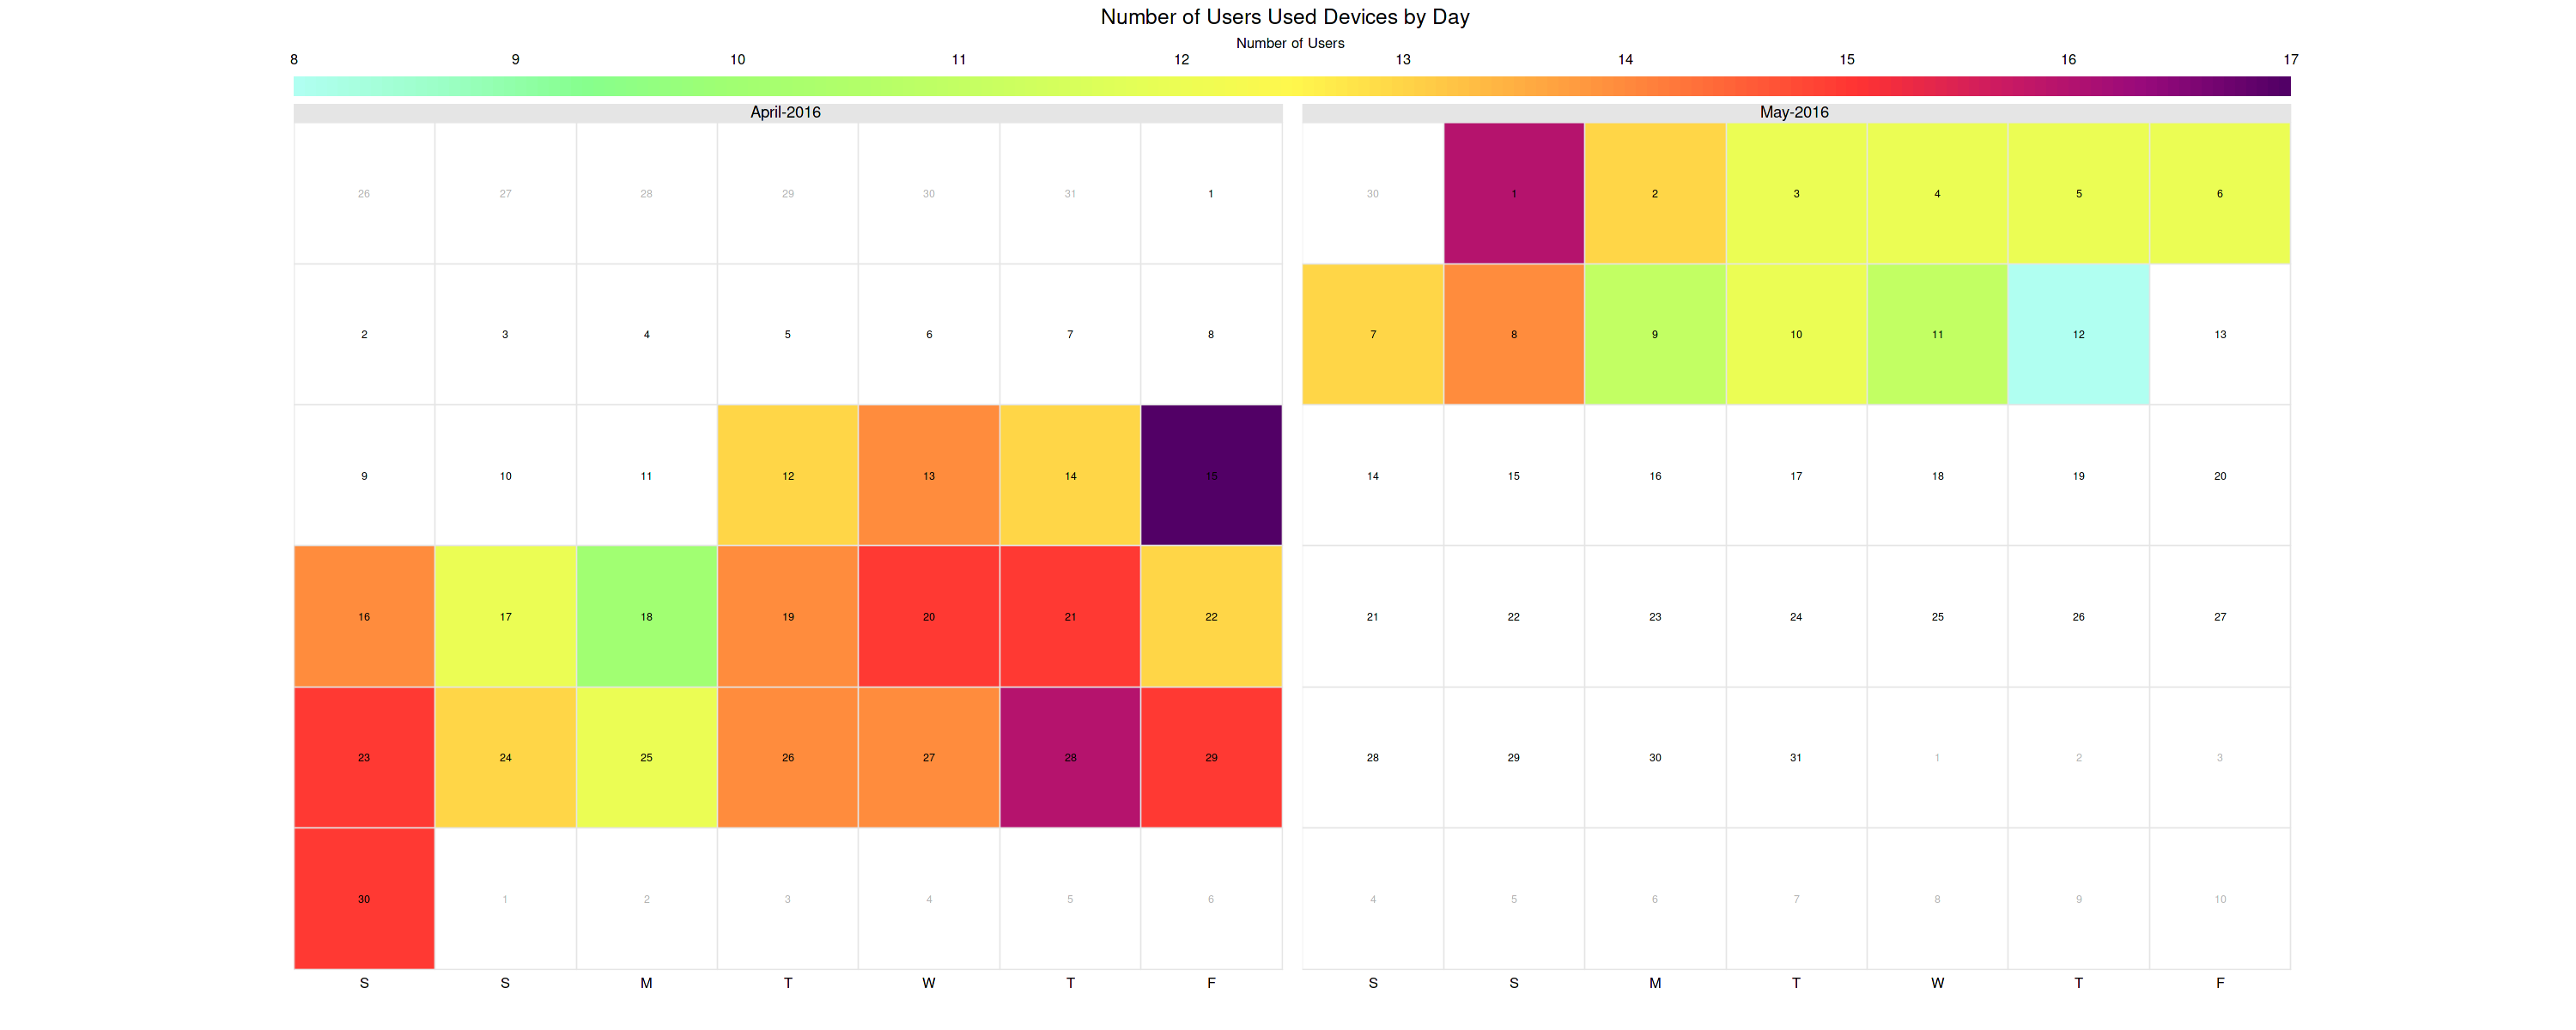

In [106]:
# openair: https://bookdown.org/david_carslaw/openair/sec-calendarPlot.html
#Plot a calendar heat map on total steps by day
calendarPlot(obs_users, pollutant = "user_perday", 
             year = 2016, month = 4:5,  cex.lim = c(0.6, 1), 
             main = "Number of Users Used Devices by Day", 
             cols="increment", 
             key.header = "Number of Users", key.position = "top")
options(repr.plot.width = 14, repr.plot.height = 10)

In [107]:
# Summary of users per day
summary(obs_users$user_perday)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00   12.00   13.00   13.23   14.50   17.00 